# Microsoft Malware detection

<img src="images/malware.jpg">

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
#from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
import dask.dataframe as dd
import pandas as pd
import scipy.sparse as sp
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import scipy.sparse as sp
import scipy.sparse
import gc
import pickle as pkl
from datetime import datetime as dt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
source = 'train'
destination = 'byteFiles'

#We will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination):
    os.makedirs(destination)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    os.rename(source,'asmFiles')
    source='asmFiles'
    asm_files = os.listdir(source)
    for file in asm_files:
        if (file.endswith("bytes")):
            shutil.move(source+"/"+file,destination)
            
print("All byte files moved to 'byteFiles' folder and all asm files moved to 'asmFiles' folder..")

All byte files moved to 'byteFiles' folder and all asm files moved to 'asmFiles' folder..


<h2>3.1. Distribution of malware classes in whole data set </h2>

<IPython.core.display.Javascript object>


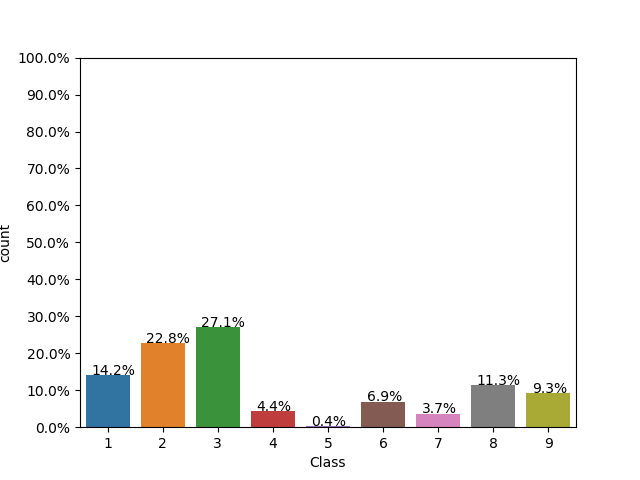

In [43]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

Here we should keep in mind that the dataset is highly imbalanced. We can see that class 1,2,3 are the ones which has maximum number of datapoints. These 3 classes are closely followed by classes 6,8,9. Class 5 has the lowest number of files. Class 4,6 and 7 also has considerably less number of data points. So this is basically a multi-class problem with an imbalanced dataset.

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [23]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
data_size_byte.head()

ID      size  Class
0  01azqd4InC7m9JpocGv5  4.148438      9
1  01IsoiSMh5gxyDYTl4CB  5.425781      2
2  01jsnpXSAlgw6aPeDxrU  3.808594      9
3  01kcPWA9K2BOxQeS5Rju  0.562500      1
4  01SuzwMJEIXsK7A8dQbl  0.363281      8

In [24]:
#Save byte file size dataframe
if not os.path.isdir("features"):
    os.makedirs("features")
    
data_size_byte.to_csv("features/data_size_byte.csv")

<h3> 3.2.2 Box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


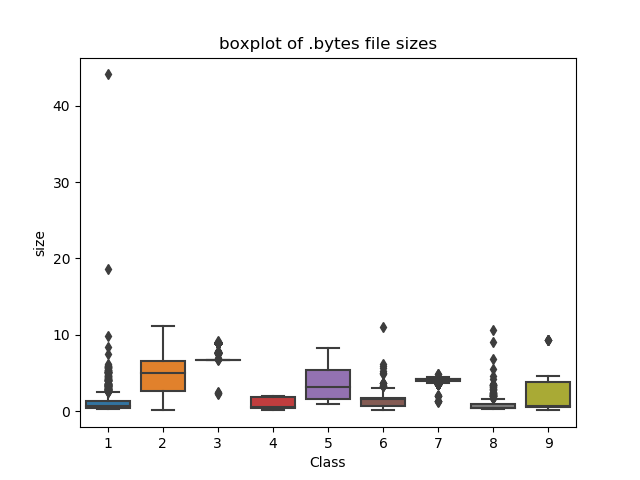

In [25]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

Looking at the box plot carefully, we can see that the size feature is somewhat useful in determining some of the class labels if not all. In the above box plot, class 2 can be clearly separated from other classes (1,3,4,6,7,8) by just using the size feature. Class 3 has one of the lowest file sizes and they can be easily separated by classes. IF not fully, file sizes partially helps us to differentiate between few classes. So file sizes are indeed useful features. We will keep them and make use of them while doing our analysis and also while building our models.

<h3>3.2.3 Feature extraction from byte files </h3>

In [0]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file+".bytes","r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file+".bytes")
        text_file.close()

files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)
k=0


#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
byte_feature_file=open('result.csv','w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
byte_feature_file.write("\n")
for file in files:
    filenames2.append(file)
    byte_feature_file.write(file+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='??':
                        feature_matrix[k][256]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
        byte_flie.close()
    for i, row in enumerate(feature_matrix[k]):
        if i!=len(feature_matrix[k])-1:
            byte_feature_file.write(str(row)+",")
        else:
            byte_feature_file.write(str(row))
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()

In [26]:
byte_features=pd.read_csv("result.csv").drop(columns=["Unnamed: 0"])
byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features["size"]=data_size_byte["size"]
byte_features.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...      f9    fa    fb    fc    fd     fe     ff     ??      size  \
0  2965  ...    3101  3211  3097  2758  3099   2759   5753   1824  4.148438   
1  9291  ...     439   281   302  7639   518  17001  54902   8588  5.425781   
2  9107  ...    2242  2885  2863  2471  2786   2680  49144    468  3.808594   
3  1078  ...     485   462   516  1133   471    761   7998  13940  0.562500   
4   422  ...     350   209   239   653   221    242   2199   9008  0.363281   

   Class  
0      9  
1      2  
2      9  
3      1  
4      8  

[5 rows x 260 columns]

In [27]:
byte_features_with_size = byte_features
byte_features_with_size.to_csv("features/byte_features_with_size.csv",index=None)

In [71]:
byte_features_with_size=pd.read_csv("features/byte_features_with_size.csv")
byte_features_with_size.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...      f9    fa    fb    fc    fd     fe     ff     ??      size  \
0  2965  ...    3101  3211  3097  2758  3099   2759   5753   1824  4.148438   
1  9291  ...     439   281   302  7639   518  17001  54902   8588  5.425781   
2  9107  ...    2242  2885  2863  2471  2786   2680  49144    468  3.808594   
3  1078  ...     485   462   516  1133   471    761   7998  13940  0.562500   
4   422  ...     350   209   239   653   221    242   2199   9008  0.363281   

   Class  
0      9  
1      2  
2      9  
3      1  
4      8  

[5 rows x 260 columns]

In [2]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1

In [59]:
result = normalize(byte_features_with_size)
result.head(5)

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...          f9        fa  \
0  0.001835  0.002058  0.002946  0.002638  ...    0.013560  0.013107   
1  0.003873  0.004747  0.006984  0.008267  ...    0.001920  0.001147   
2  0.005280  0.005078  0.002155  0.008104  ...    0.009804  0.011777   
3  0.000354  0.000310  0.000481  0.000959  ...    0.002121  0.001886   
4  0.000232  0.000148  0.000229  0.000376  ...    0.001530  0.000853   

         fb        fc        fd        fe        ff        ??      size  Class  
0  0.013634  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.001329  0.087867  0.002432  0.088411  0.074851  0.000606  0.121236      2  
2  0.012604  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.002272  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.001052  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

In [101]:
data_y = result['Class']
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...          f9        fa  \
0  0.001835  0.002058  0.002946  0.002638  ...    0.013560  0.013107   
1  0.003873  0.004747  0.006984  0.008267  ...    0.001920  0.001147   
2  0.005280  0.005078  0.002155  0.008104  ...    0.009804  0.011777   
3  0.000354  0.000310  0.000481  0.000959  ...    0.002121  0.001886   
4  0.000232  0.000148  0.000229  0.000376  ...    0.001530  0.000853   

         fb        fc        fd        fe        ff        ??      size  Class  
0  0.013634  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.001329  0.087867  0.002432  0.088411  0.074851  0.000606  0.121236      2  
2  0.012604  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.002272  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.001052  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

<h3>3.2.4 Multivariate Analysis Plot TSNE</h3>

<IPython.core.display.Javascript object>


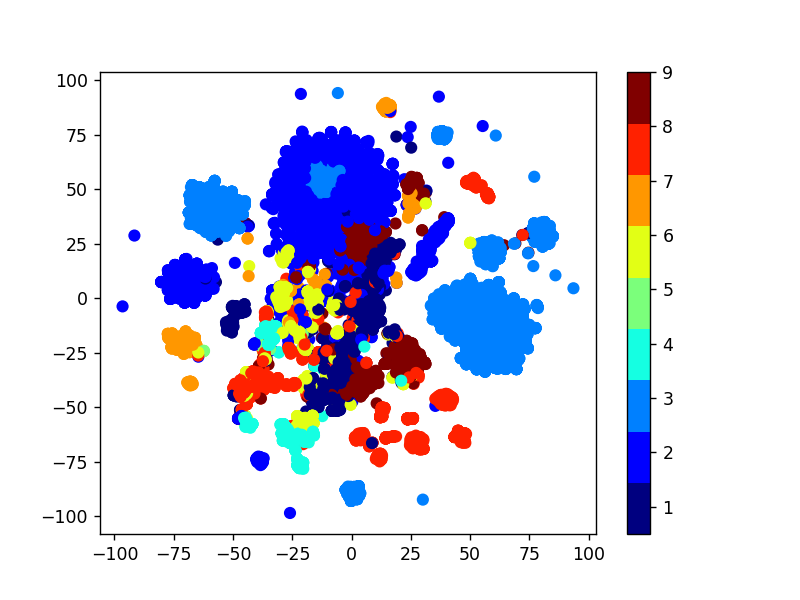

In [0]:
#Multivariate analysis on byte files features extracted using unigrams.
def draw_tsne_byte(p):
    xtsne=TSNE(perplexity=p)
    results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
    vis_x = results[:, 0]
    vis_y = results[:, 1]
    plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
    plt.colorbar(ticks=range(10))
    plt.clim(0.5, 9)
    plt.show()
    
draw_tsne_byte(30)

At various values of perplexity we can see that the clusters are partially separable. There is some overlapping but in general classes 1,2,3 are well separated from the rest.  The red points belonging to cluster 8 are scattered over a larger area, but inspite of this, there is no significant overlapping of class 8 with other clusters. This tells us that the unigrams features extracted from using a custom bag of words approach is pretty useful in separating the data. 

# Train Test split

In [102]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [103]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


<IPython.core.display.Javascript object>


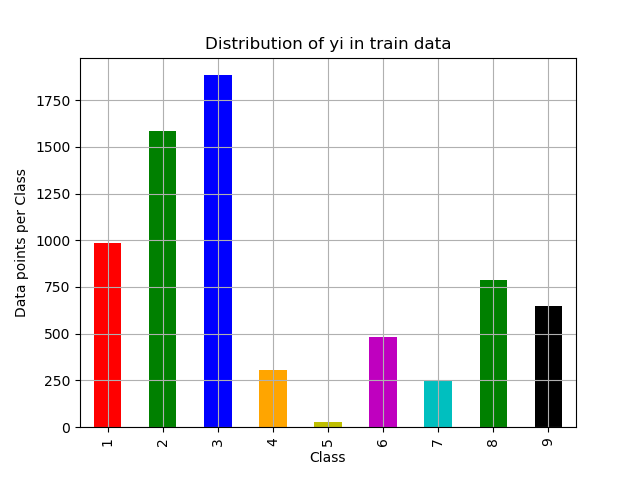

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


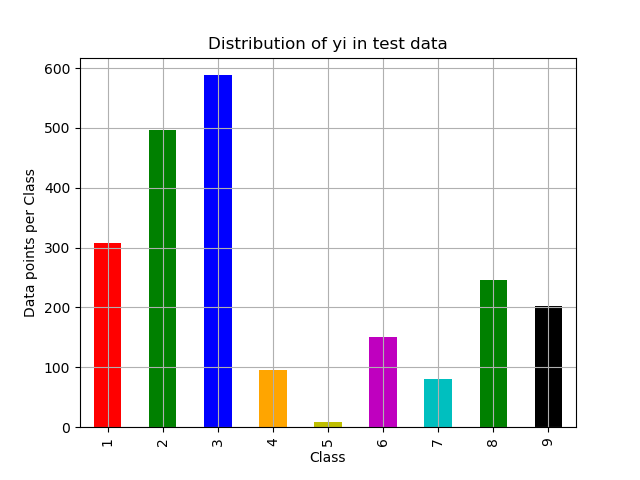

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)


<IPython.core.display.Javascript object>


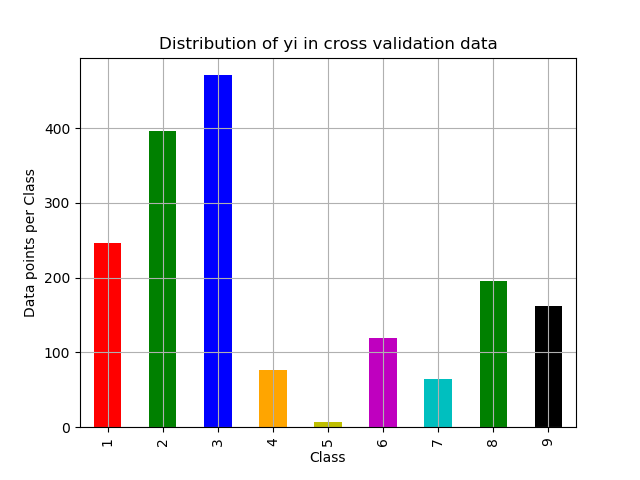

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [107]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sortlevel()
test_class_distribution = y_test.value_counts().sortlevel()
cv_class_distribution = y_cv.value_counts().sortlevel()

my_colors = ["r","g","b","orange","y","m","c","g","black"]
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')
    
print('-'*80)
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [108]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Percentage of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1>4. Machine Learning Models</h1>

<h2>4.1. Machine Leaning Models on bytes files</h2>

<h3>4.1.1. Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.45615644965
Log loss on Test Data using Random Model 2.48503905509
Number of misclassified points  88.5004599816
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


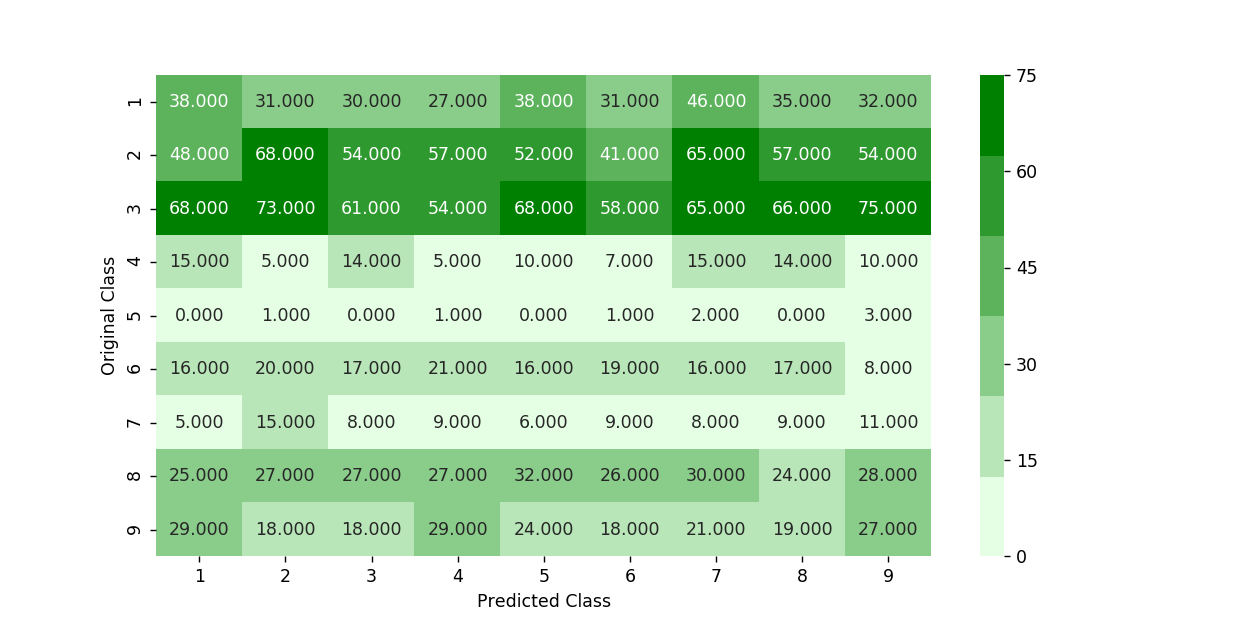

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


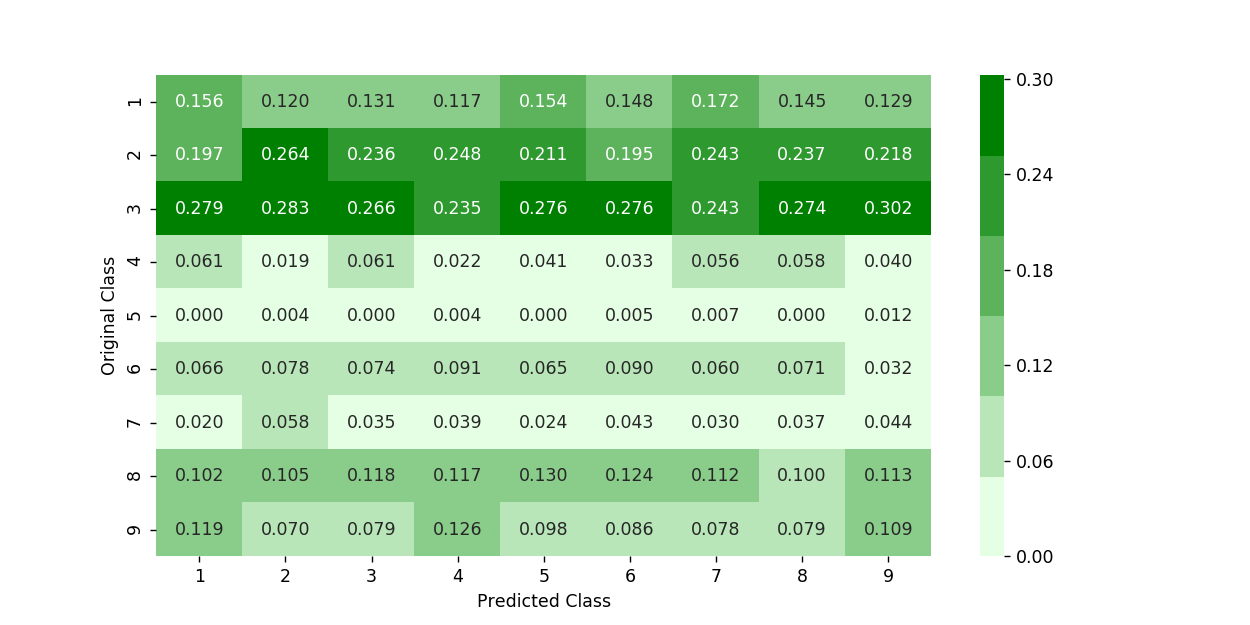

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


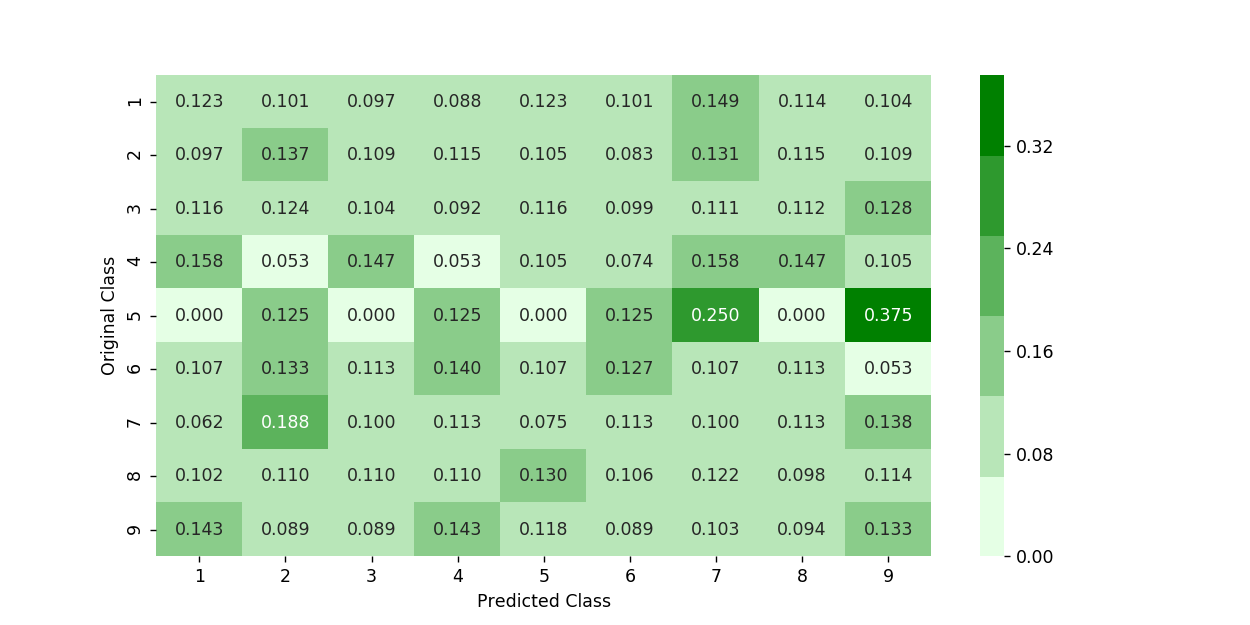

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3>4.1.2. K Nearest Neighbour Classification</h3>

log_loss for k =  1 is 0.225386237304
log_loss for k =  3 is 0.230795229168
log_loss for k =  5 is 0.252421408646
log_loss for k =  7 is 0.273827486888
log_loss for k =  9 is 0.286469181555
log_loss for k =  11 is 0.29623391147
log_loss for k =  13 is 0.307551203154


<IPython.core.display.Javascript object>


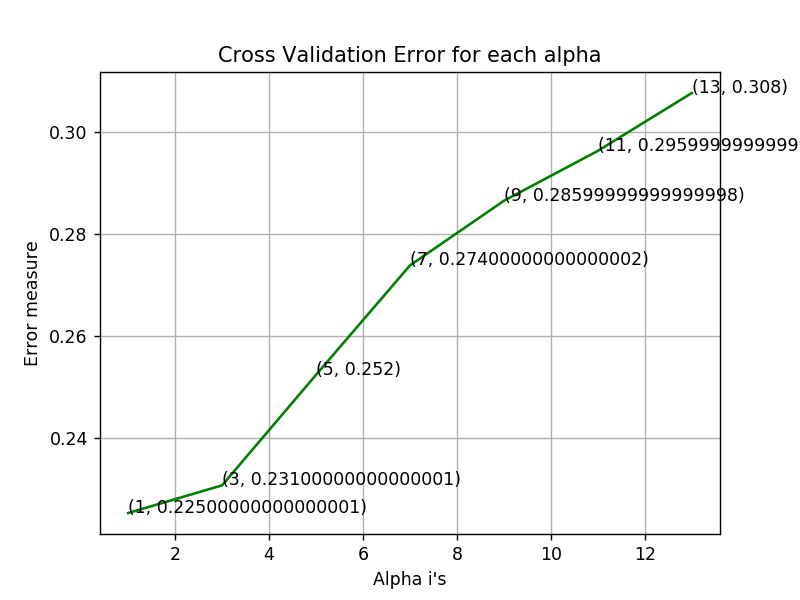

For values of best alpha =  1 The train log loss is: 0.0782947669247
For values of best alpha =  1 The cross validation log loss is: 0.225386237304
For values of best alpha =  1 The test log loss is: 0.241508604195
Number of misclassified points  4.50781968721
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


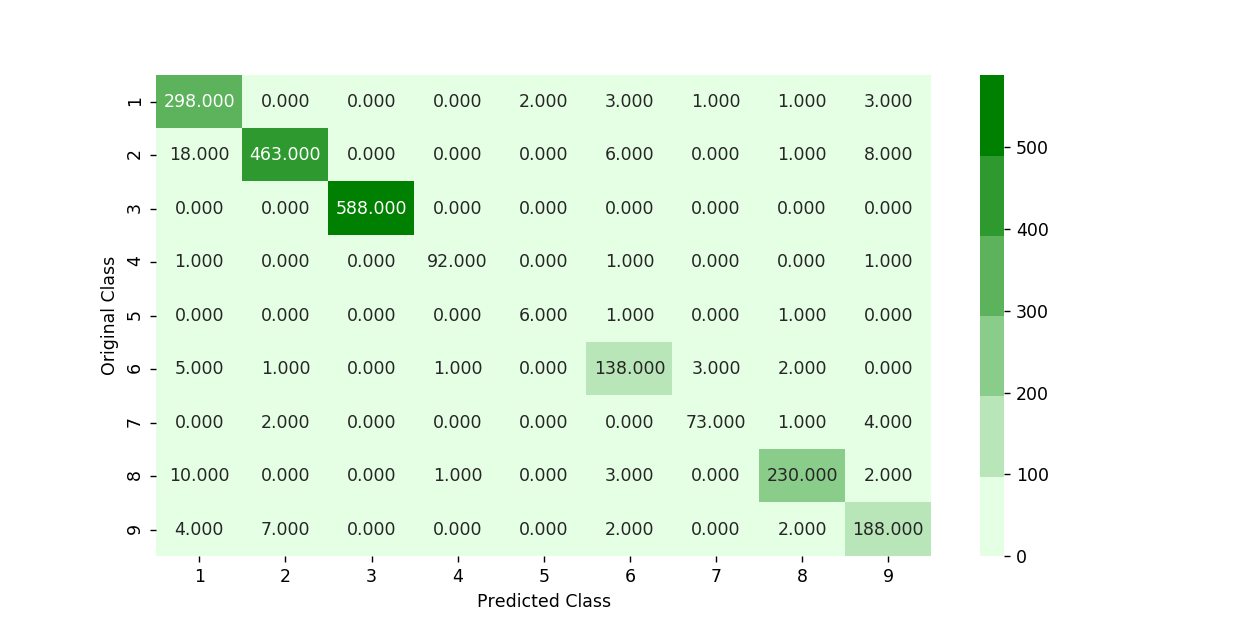

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


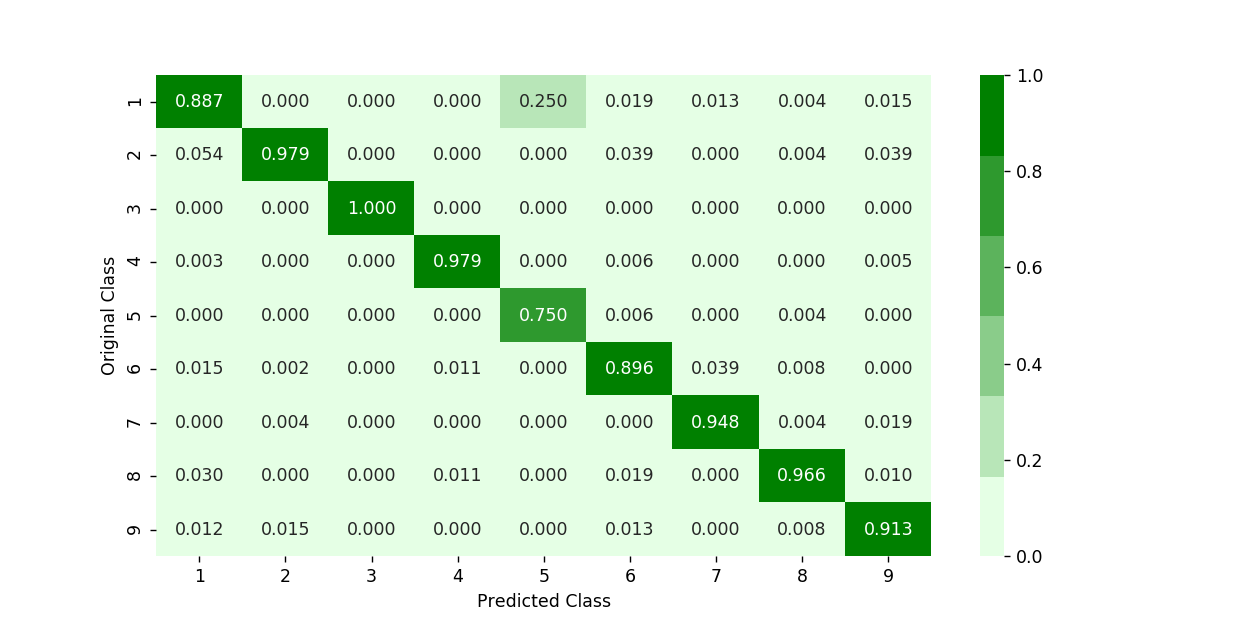

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


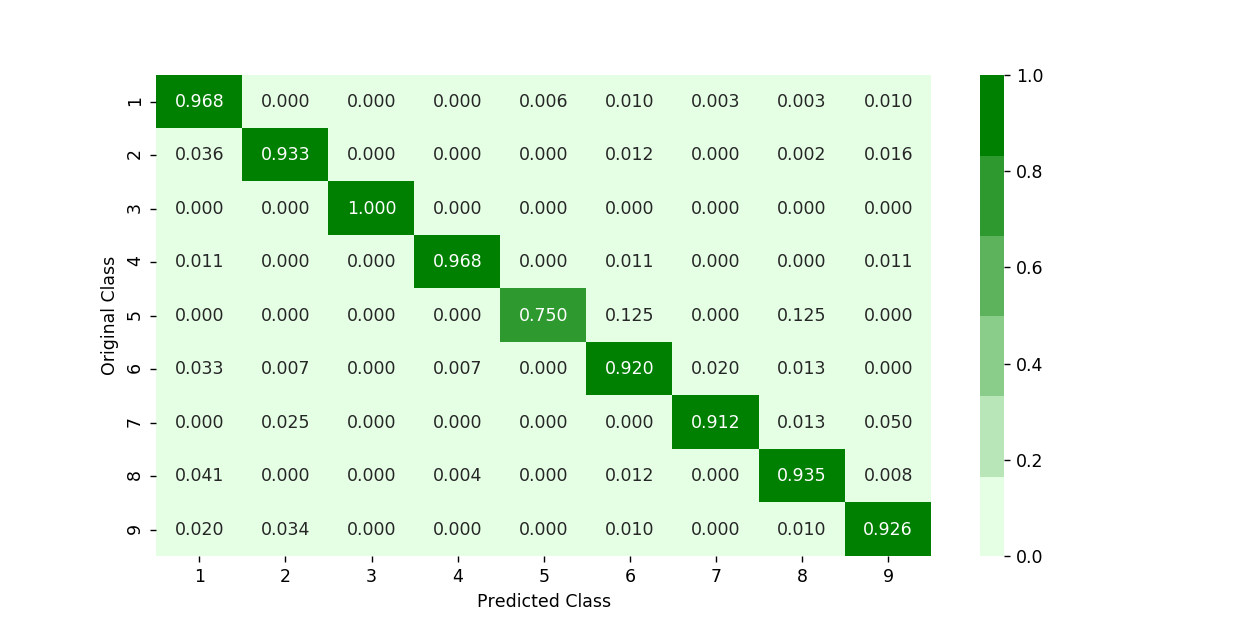

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.3. Logistic Regression</h3>

log_loss for c =  1e-05 is 1.56916911178
log_loss for c =  0.0001 is 1.57336384417
log_loss for c =  0.001 is 1.53598598273
log_loss for c =  0.01 is 1.01720972418
log_loss for c =  0.1 is 0.857766083873
log_loss for c =  1 is 0.711154393309
log_loss for c =  10 is 0.583929522635
log_loss for c =  100 is 0.549929846589
log_loss for c =  1000 is 0.624746769121


<IPython.core.display.Javascript object>


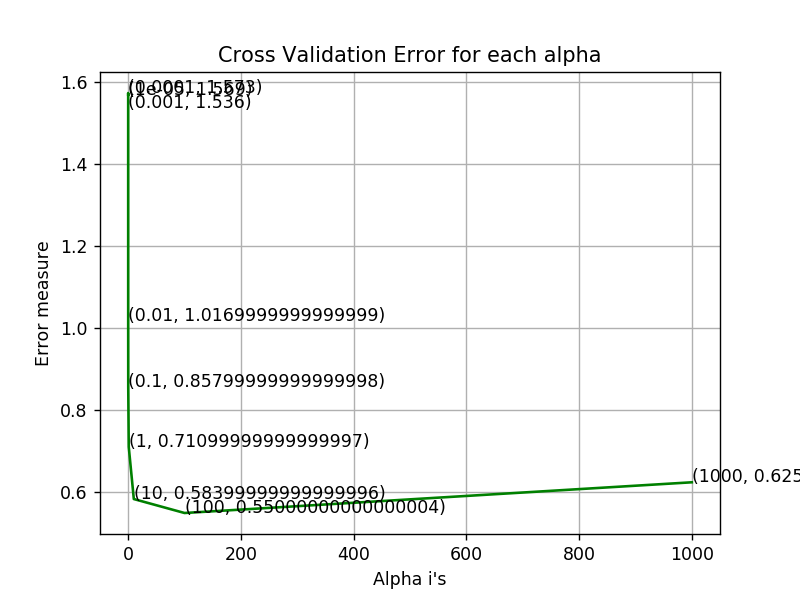

log loss for train data 0.498923428696
log loss for cv data 0.549929846589
log loss for test data 0.528347316704
Number of misclassified points  12.3275068997
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


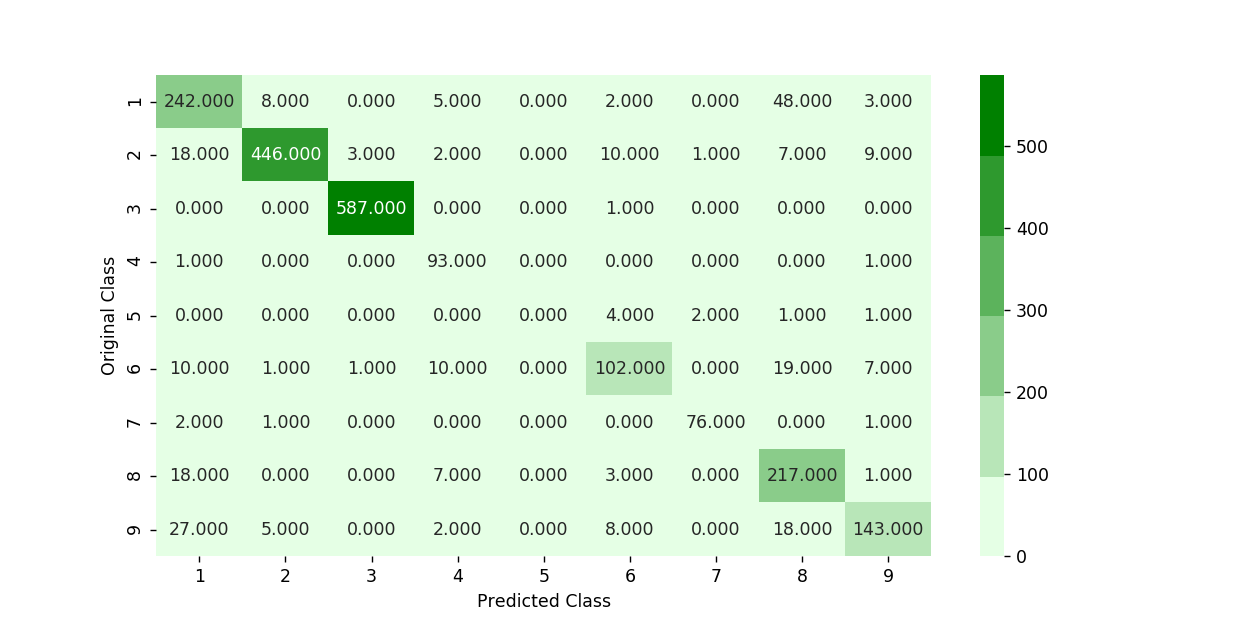

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


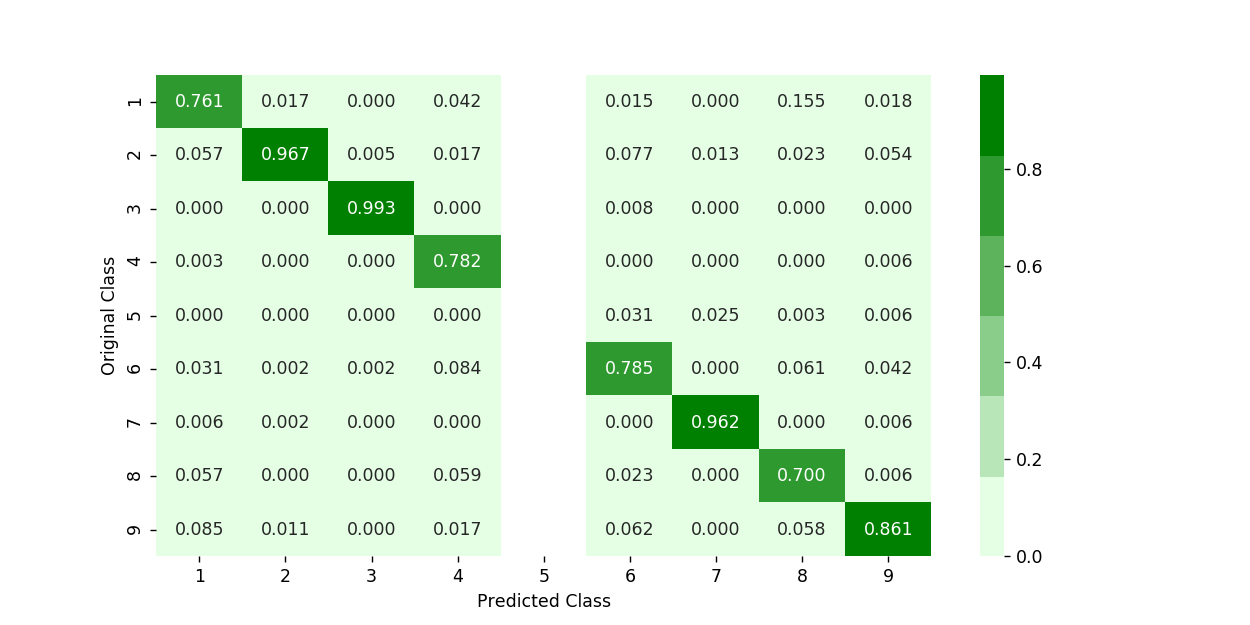

Sum of columns in precision matrix [  1.   1.   1.   1.  nan   1.   1.   1.   1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


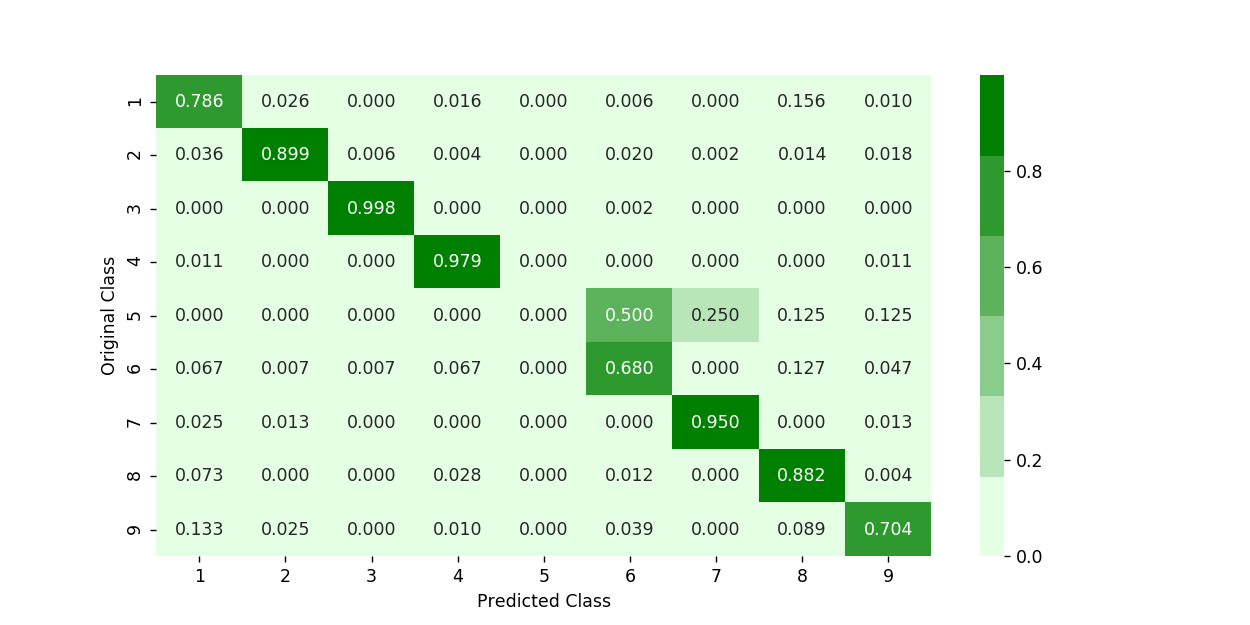

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 4.1.4. Random Forest Classifier </h3>

log_loss for c =  10 is 0.106357709164
log_loss for c =  50 is 0.0902124124145
log_loss for c =  100 is 0.0895043339776
log_loss for c =  500 is 0.0881420869288
log_loss for c =  1000 is 0.0879849524621
log_loss for c =  2000 is 0.0881566647295
log_loss for c =  3000 is 0.0881318948443


<IPython.core.display.Javascript object>


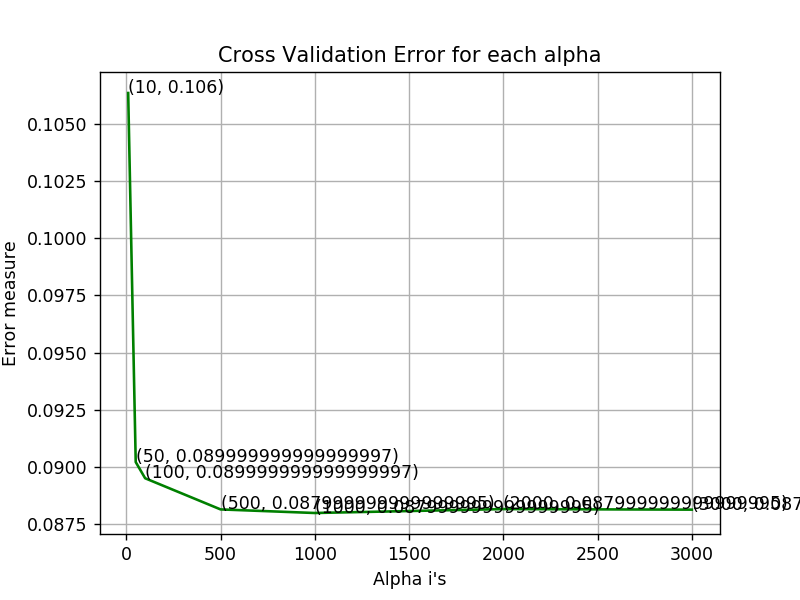

For values of best alpha =  1000 The train log loss is: 0.0266476291801
For values of best alpha =  1000 The cross validation log loss is: 0.0879849524621
For values of best alpha =  1000 The test log loss is: 0.0858346961407
Number of misclassified points  2.02391904324
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


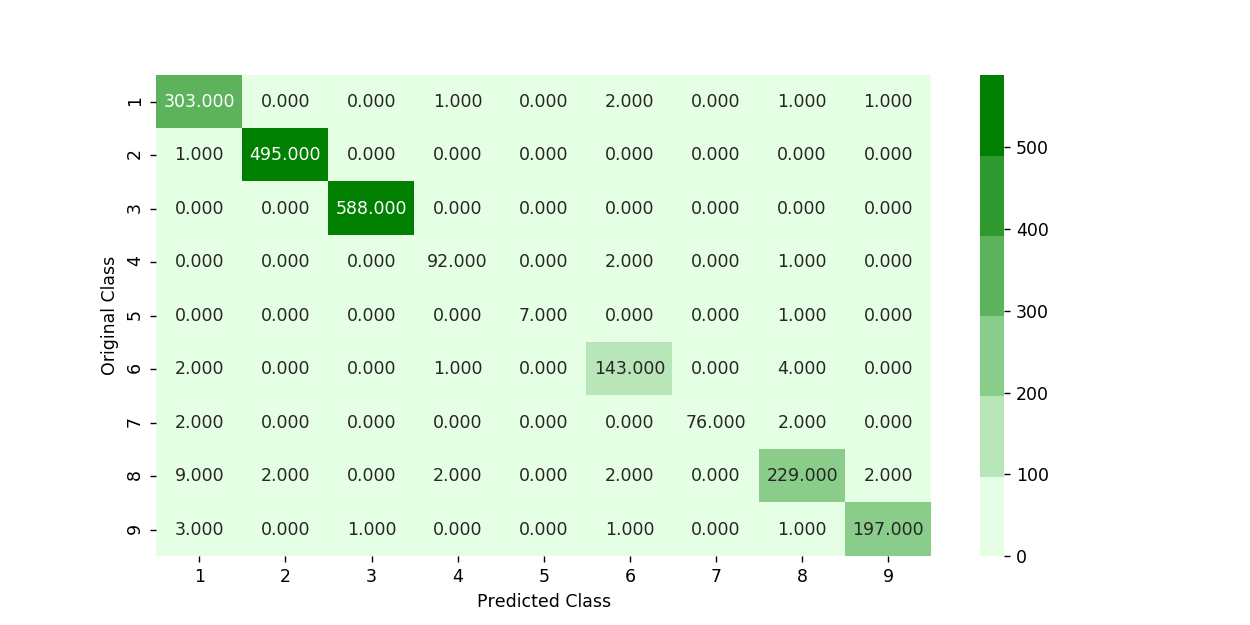

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


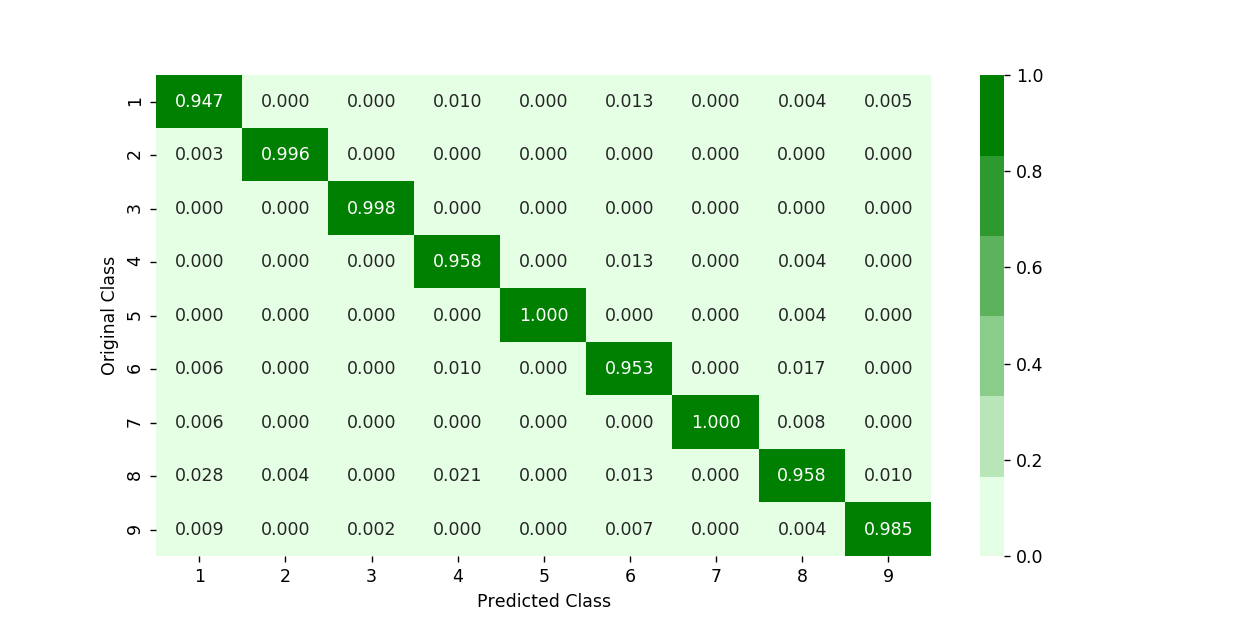

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


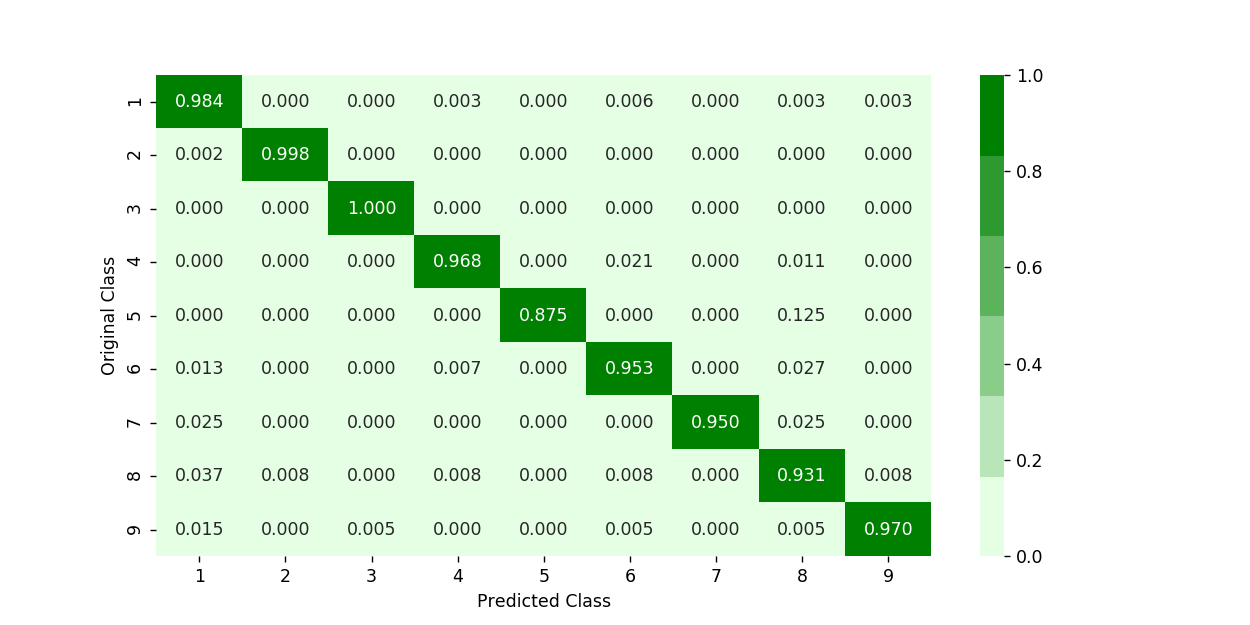

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification</h3>

log_loss for c =  10 is 0.20615980494
log_loss for c =  50 is 0.123888382365
log_loss for c =  100 is 0.099919437112
log_loss for c =  500 is 0.0931035681289
log_loss for c =  1000 is 0.0933084876012
log_loss for c =  2000 is 0.0938395690309


<IPython.core.display.Javascript object>


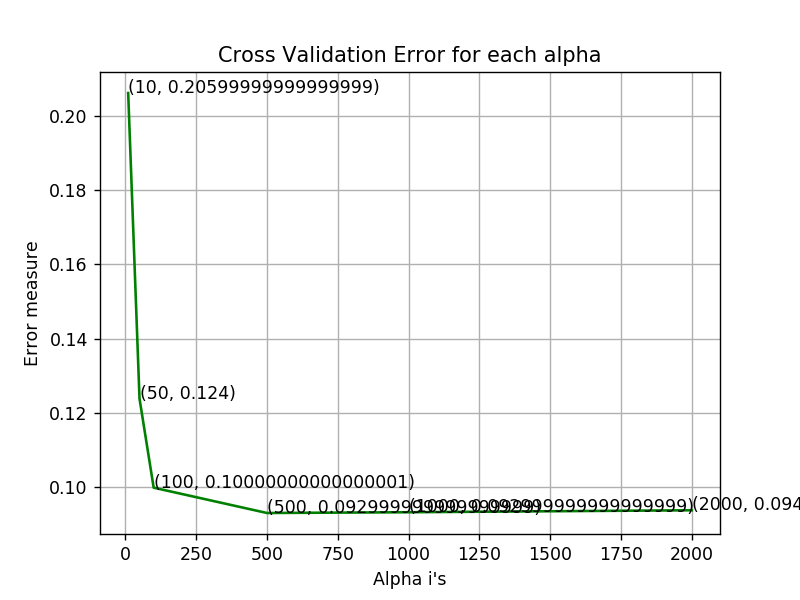

For values of best alpha =  500 The train log loss is: 0.0225231805824
For values of best alpha =  500 The cross validation log loss is: 0.0931035681289
For values of best alpha =  500 The test log loss is: 0.0792067651731
Number of misclassified points  1.24195032199
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


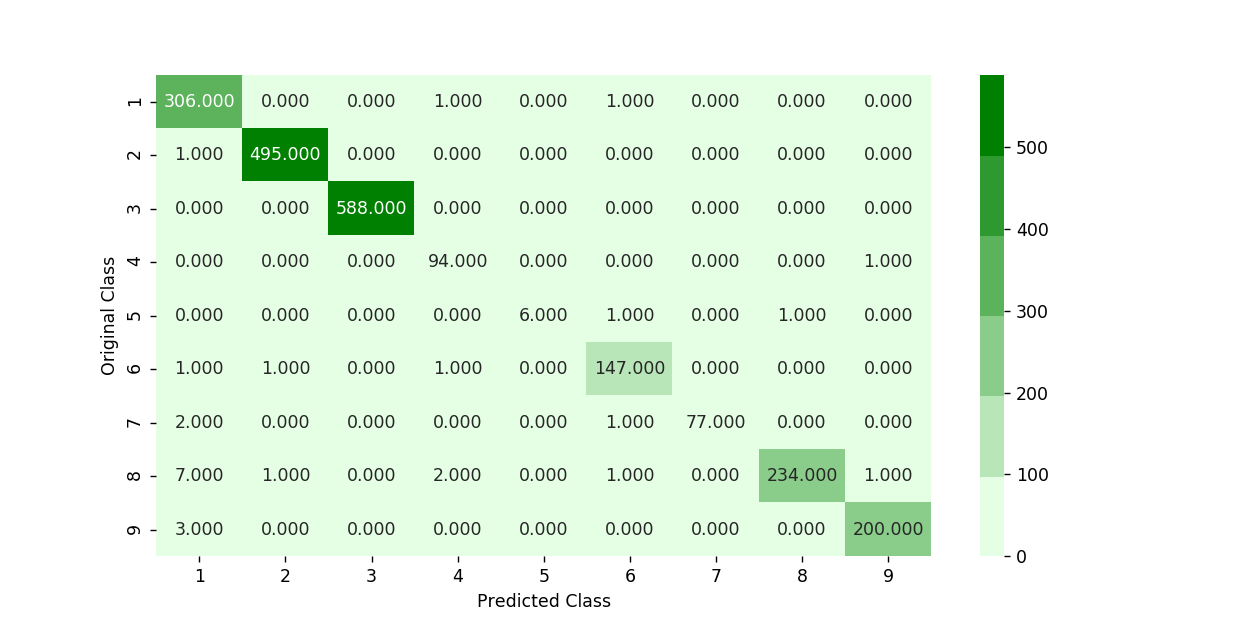

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


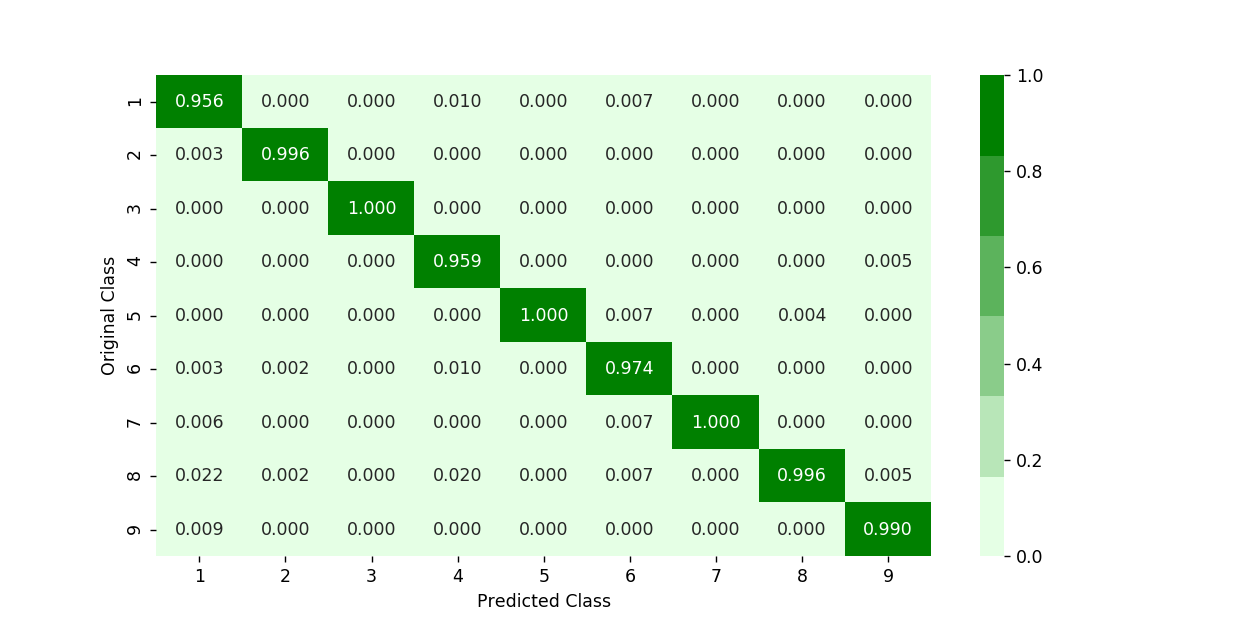

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


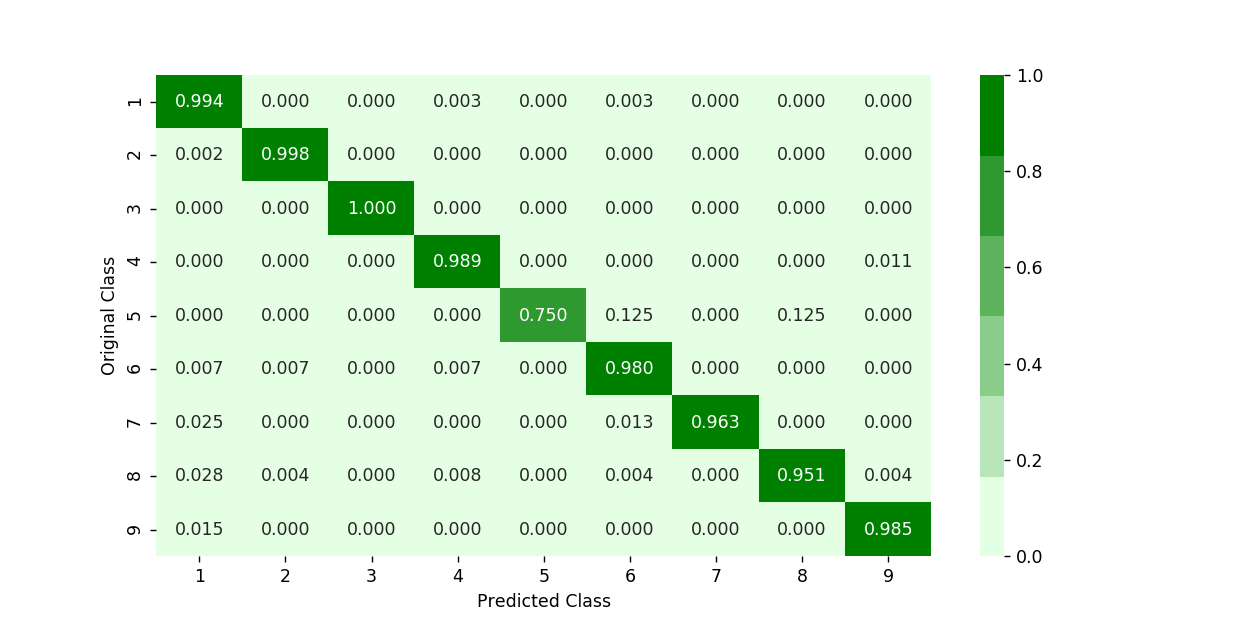

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification with best hyper parameters using RandomSearch </h3>

In [0]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  9.3min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 10.1min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 14.0min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.2min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=10)

In [0]:
print (random_cfl1.best_params_)

{'subsample': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=2000, learning_rate=0.05, colsample_bytree=1, max_depth=3)
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.022540976086
cv loss 0.0928710624158
test loss 0.0782688587098


<h2> 4.2 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.2.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [0]:
#intially create five folders
#first 
#second
#thrid
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 = 'output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='train/'
files = os.listdir('train')
ID=df['Id'].tolist()
data=range(0,10868)
r.shuffle(data)
count=0
for i in range(0,10868):
    if i % 5==0:
        shutil.move(source+files[data[i]],'first')
    elif i%5==1:
        shutil.move(source+files[data[i]],'second')
    elif i%5 ==2:
        shutil.move(source+files[data[i]],'thrid')
    elif i%5 ==3:
        shutil.move(source+files[data[i]],'fourth')
    elif i%5==4:
        shutil.move(source+files[data[i]],'fifth')

In [0]:
#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html
#https://en.wikipedia.org/wiki/X86_instruction_listings
#https://en.wikipedia.org/wiki/Data_segment

"""The x86 instruction set refers to the set of instructions that x86-compatible microprocessors support. The instructions are usually part of an executable program, often stored as a computer file and 
executed on the processor. The x86 instruction set has been extended several times, introducing wider registers and datatypes as well as new functionality."""

"""In computing, a data segment (often denoted .data) is a portion of an object file or the corresponding virtual address space of a program that contains initialized static variables, that is, 
global variables and static local variables. The size of this segment is determined by the size of the values in the program's source code, and does not change at run time. """


def firstprocess():
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    #this are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output/asmsmallfile.txt","w+")
    files = os.listdir('first')
    for f in files:
        #filling the values with zeros into the arrays
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0] #Contains the file names
        file1.write(f2+",")
        
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('first/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line=lines.rstrip().split()
                l=line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


#same as above 
def secondprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output/mediumasmfile.txt","w+")
    files = os.listdir('second')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        
        with codecs.open('second/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions
def thirdprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output/largeasmfile.txt","w+")
    files = os.listdir('thrid')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        
        with codecs.open('thrid/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output/hugeasmfile.txt","w+")
    files = os.listdir('fourth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
         
        with codecs.open('fourth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output/trainasmfile.txt","w+")
    files = os.listdir('fifth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        
        with codecs.open('fifth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

In [29]:
# asmoutputfile.csv(output generated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
Y=pd.read_csv("trainLabels.csv")
dfasm=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...    edx  esi  eax  ebx  ecx  edi  ebp  esp  \
0      323        0       3  ...     18   66   15   43   83    0   17   48   
1        0        0       3  ...     18   29   48   82   12    0   14    0   
2      145        0       3  ...     13   42   10   67   14    0   11    0   
3        0        0       3  ...      6    8   14    7    2    0    8    0   
4        0        0       3  ...     12    9   18   29    5    0   11    0   

   eip  Class  
0   29      1  
1   20      1  
2    9      1  
3    6      1  
4   11      1  

[5 rows x 53 columns]

<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [30]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
asm_size_byte.head()

ID       size  Class
0  01azqd4InC7m9JpocGv5  56.229886      9
1  01IsoiSMh5gxyDYTl4CB  13.999378      2
2  01jsnpXSAlgw6aPeDxrU   8.507785      9
3  01kcPWA9K2BOxQeS5Rju   0.078190      1
4  01SuzwMJEIXsK7A8dQbl   0.996723      8

In [31]:
#Save ASM file size dataframe
if not os.path.isdir("features"):
    os.makedirs("features")
    
asm_size_byte.to_csv("features/asm_size_byte.csv")

In [34]:
#Adding the file size feature to previous extracted features
asm_features_with_size=pd.merge(asm_size_byte,result_asm.drop(columns=["Class"]),on='ID', how='left')
asm_features_with_size.head()

ID       size  Class  HEADER:  .text:  .Pav:  .idata:  \
0  01azqd4InC7m9JpocGv5  56.229886      9       18   22430      0     1158   
1  01IsoiSMh5gxyDYTl4CB  13.999378      2        0  109939      0      616   
2  01jsnpXSAlgw6aPeDxrU   8.507785      9       18   68883      0      304   
3  01kcPWA9K2BOxQeS5Rju   0.078190      1       19     744      0      127   
4  01SuzwMJEIXsK7A8dQbl   0.996723      8       18   10368      0      206   

    .data:  .bss:  .rdata: ...   :dword  edx   esi   eax   ebx  ecx  edi  ebp  \
0  1366754      0     1794 ...     4371  808  2290  1281   587  701    0   15   
1    24568      0    26405 ...     1446  260  1090   391   905  420    0   24   
2      662      0     1093 ...      903    5   547     5   451   56    0   27   
3       57      0      323 ...      137   18    66    15    43   83    0   17   
4     4595     92        0 ...     1220   18  1228    24  1546  107    0   15   

   esp  eip  
0   14  456  
1   22  227  
2    0  117  
3   48   29  
4    0   76  

[5 rows x 54 columns]

In [35]:
#Save the ASM Dataframe
asm_features_with_size.to_csv("features/asm_features_with_size.csv",index=None)

<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

<IPython.core.display.Javascript object>


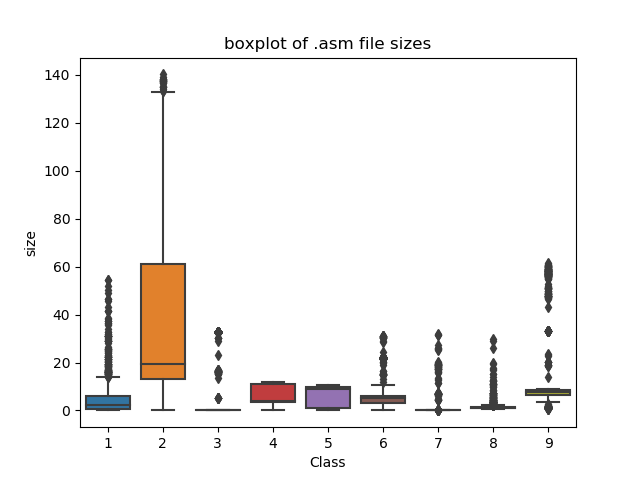

In [36]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .asm file sizes")
plt.show()

By looking at the distribution of the ASM file sizes, we can see that class 2 type of malwares can be easily separated from the rest the classes. Class 2 type malwares has the highest spread of file sizes. Among the rest of the classes 7,8 have the least file sizes. But they cannot be strictly separated from the file sizes alone. 

In [69]:
# add the file size feature to previous extracted features
result_asm=asm_features_with_size
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm.head()

(10868, 54)
(10868, 3)


ID       size  Class  HEADER:  .text:  .Pav:  .idata:  \
0  01azqd4InC7m9JpocGv5  56.229886      9       18   22430      0     1158   
1  01IsoiSMh5gxyDYTl4CB  13.999378      2        0  109939      0      616   
2  01jsnpXSAlgw6aPeDxrU   8.507785      9       18   68883      0      304   
3  01kcPWA9K2BOxQeS5Rju   0.078190      1       19     744      0      127   
4  01SuzwMJEIXsK7A8dQbl   0.996723      8       18   10368      0      206   

    .data:  .bss:  .rdata: ...   :dword  edx   esi   eax   ebx  ecx  edi  ebp  \
0  1366754      0     1794 ...     4371  808  2290  1281   587  701    0   15   
1    24568      0    26405 ...     1446  260  1090   391   905  420    0   24   
2      662      0     1093 ...      903    5   547     5   451   56    0   27   
3       57      0      323 ...      137   18    66    15    43   83    0   17   
4     4595     92        0 ...     1220   18  1228    24  1546  107    0   15   

   esp  eip  
0   14  456  
1   22  227  
2    0  117  
3   48   29  
4    0   76  

[5 rows x 54 columns]

In [78]:
byte_features_with_size.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...      f9    fa    fb    fc    fd     fe     ff     ??      size  \
0  2965  ...    3101  3211  3097  2758  3099   2759   5753   1824  4.148438   
1  9291  ...     439   281   302  7639   518  17001  54902   8588  5.425781   
2  9107  ...    2242  2885  2863  2471  2786   2680  49144    468  3.808594   
3  1078  ...     485   462   516  1133   471    761   7998  13940  0.562500   
4   422  ...     350   209   239   653   221    242   2199   9008  0.363281   

   Class  
0      9  
1      2  
2      9  
3      1  
4      8  

[5 rows x 260 columns]

In [70]:
asm_features_with_size.head(3)

ID       size  Class  HEADER:  .text:  .Pav:  .idata:  \
0  01azqd4InC7m9JpocGv5  56.229886      9       18   22430      0     1158   
1  01IsoiSMh5gxyDYTl4CB  13.999378      2        0  109939      0      616   
2  01jsnpXSAlgw6aPeDxrU   8.507785      9       18   68883      0      304   

    .data:  .bss:  .rdata: ...   :dword  edx   esi   eax  ebx  ecx  edi  ebp  \
0  1366754      0     1794 ...     4371  808  2290  1281  587  701    0   15   
1    24568      0    26405 ...     1446  260  1090   391  905  420    0   24   
2      662      0     1093 ...      903    5   547     5  451   56    0   27   

   esp  eip  
0   14  456  
1   22  227  
2    0  117  

[3 rows x 54 columns]

In [85]:
#Combined the byte and unigrams features along with their sizes and save it in csv file. This CSV is not normalized. We will normalize it later.
labels=byte_features_with_size["Class"] #Get class labels and ID from byte unigrams dataframe and save it for later use
with open('features/class_labels.pkl', 'wb') as file:
    pkl.dump(labels, file)

combined_unigrams = pd.merge(byte_features_with_size.drop(columns=["Class"]),asm_features_with_size.drop(['rtn','.BSS:','.CODE','Class'], axis=1),on='ID', how='left')
combined_unigrams=combined_unigrams.drop(columns=["ID"])
combined_unigrams.to_csv("features/combined_asm_byte_unigram.csv",index=None)
combined_unigrams.head()

0     1     2     3     4     5     6     7     8     9 ...   :dword  \
0  601905  3905  2816  3832  3345  3242  3650  3201  2965  3205 ...     4371   
1   39755  8337  7249  7186  8663  6844  8420  7589  9291   358 ...     1446   
2   93506  9542  2568  2438  8925  9330  9007  2342  9107  2457 ...      903   
3   21091  1213   726   817  1257   625   550   523  1078   473 ...      137   
4   19764   710   302   433   559   410   262   249   422   223 ...     1220   

   edx   esi   eax   ebx  ecx  edi  ebp  esp  eip  
0  808  2290  1281   587  701    0   15   14  456  
1  260  1090   391   905  420    0   24   22  227  
2    5   547     5   451   56    0   27    0  117  
3   18    66    15    43   83    0   17   48   29  
4   18  1228    24  1546  107    0   15    0   76  

[5 rows x 307 columns]

In [91]:
#We normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

ID      size  Class   HEADER:    .text:  .Pav:   .idata:  \
0  01azqd4InC7m9JpocGv5  0.400910      9  0.101695  0.032927    0.0  0.006937   
1  01IsoiSMh5gxyDYTl4CB  0.099719      2  0.000000  0.161391    0.0  0.003690   
2  01jsnpXSAlgw6aPeDxrU  0.060553      9  0.101695  0.101121    0.0  0.001821   
3  01kcPWA9K2BOxQeS5Rju  0.000432      1  0.107345  0.001092    0.0  0.000761   
4  01SuzwMJEIXsK7A8dQbl  0.006983      8  0.101695  0.015220    0.0  0.001234   

     .data:     .bss:   .rdata:    ...       :dword       edx       esi  \
0  0.542847  0.000000  0.000467    ...     0.032784  0.015418  0.025875   
1  0.009758  0.000000  0.006877    ...     0.010846  0.004961  0.012316   
2  0.000263  0.000000  0.000285    ...     0.006773  0.000095  0.006181   
3  0.000023  0.000000  0.000084    ...     0.001028  0.000343  0.000746   
4  0.001825  0.012842  0.000000    ...     0.009150  0.000343  0.013875   

        eax       ebx       ecx  edi       ebp       esp       eip  
0  0.025744  0.004910  0.008930  0.0  0.027174  0.000428  0.049896  
1  0.007858  0.007570  0.005350  0.0  0.043478  0.000673  0.024839  
2  0.000100  0.003773  0.000713  0.0  0.048913  0.000000  0.012802  
3  0.000301  0.000360  0.001057  0.0  0.030797  0.001468  0.003173  
4  0.000482  0.012932  0.001363  0.0  0.027174  0.000000  0.008316  

[5 rows x 54 columns]

<h3> 4.2.2 Univariate analysis on  asm file features</h3>

<IPython.core.display.Javascript object>


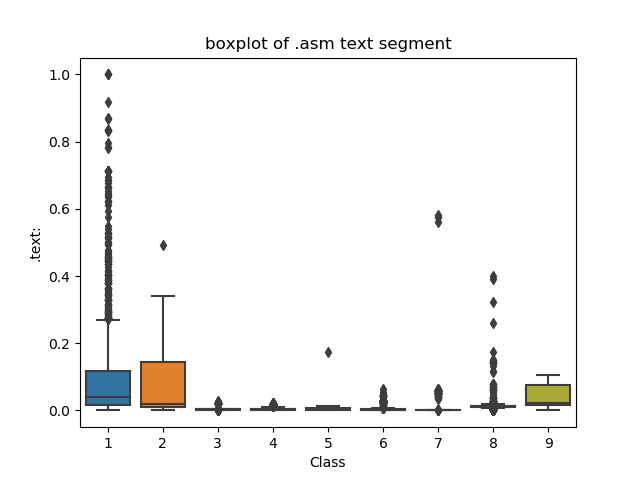

In [92]:
#Distribution of text keyword segment
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

This plot is between the text segment features vs the class labels. Here we can see that classes 1,2 and 9 can be easily separated using this feature. The rest of the classes aren't easily separated. 

<IPython.core.display.Javascript object>


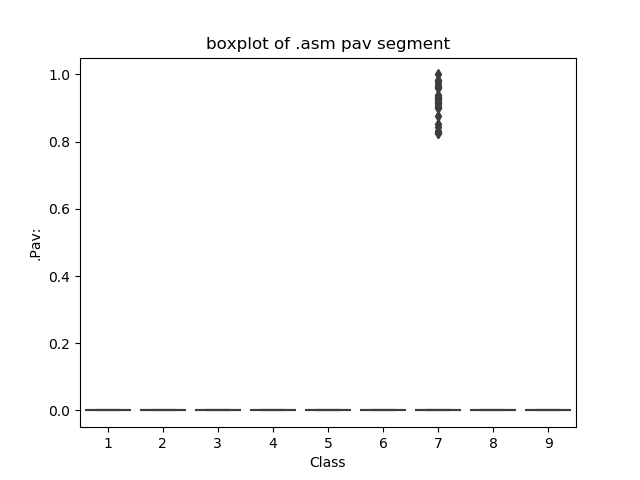

In [93]:
#Distribution of .Pav segments
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

Here none of the classes can be well separated. Hoewever, an important point to note is class 7 type of malware are having the highest spread of the .pav segments.

<IPython.core.display.Javascript object>


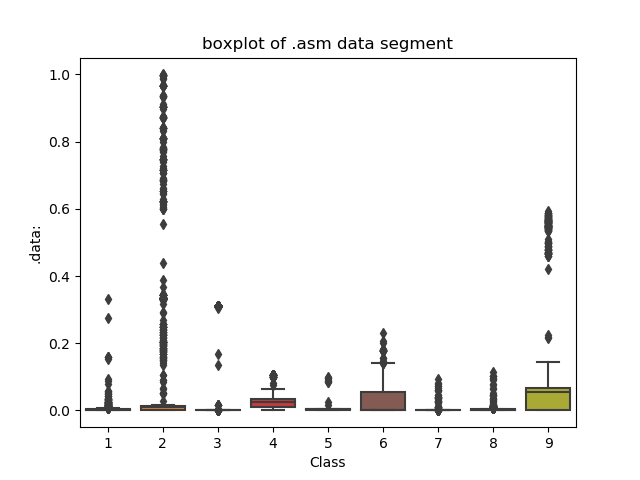

In [94]:
#Distribution of .data segments
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

In this plot, class 6 and 9 can be well separated from the rest of the classes. For the rest of the classes the spread is extremely small to come to a conclusion solely based on this feature alone.

<IPython.core.display.Javascript object>


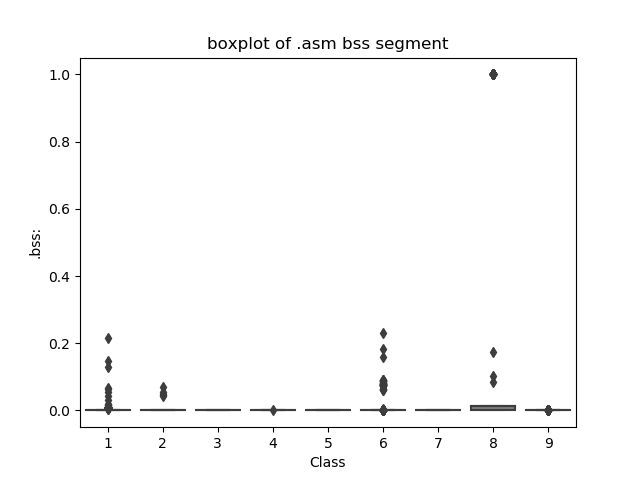

In [95]:
#Distribution of .bss segments
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

Here we can see that very less number of files has .bss segments. The classes cannot be separated well from this. 

<IPython.core.display.Javascript object>


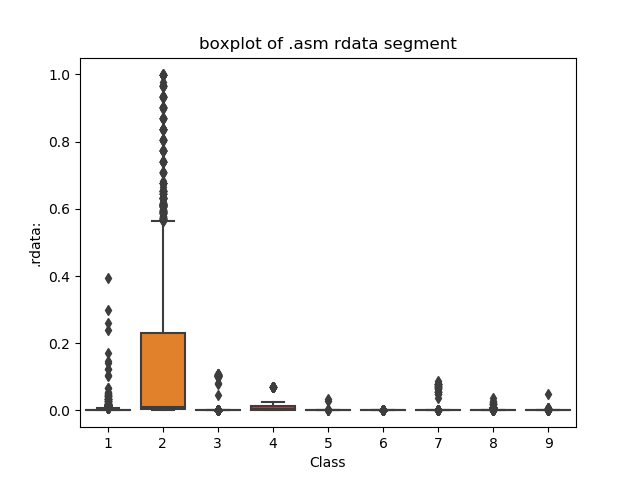

In [96]:
#Distribution of .rdata segments
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

Here we can see that using .rdata segments, class 2 can be very well separated from the rest of the malware classes. However for rest of the malware classes the .rdata segment distribution looks pretty off. 

<IPython.core.display.Javascript object>


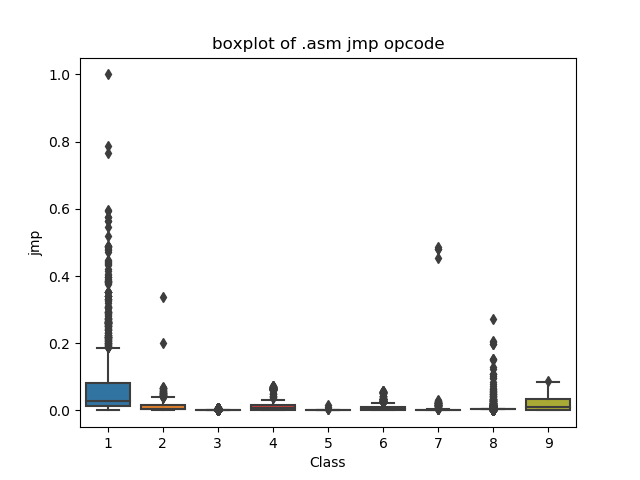

In [97]:
#Distribution of .jmp segments
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

Here class 1 can be well separated from the rest of the files. However, this feature cannot separate other classes too well. We see almost 75% of points in class 2 have approximately 2000 jmp segments.

<IPython.core.display.Javascript object>


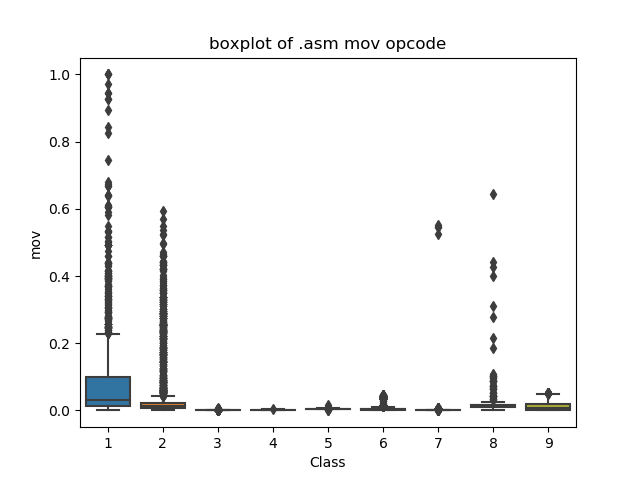

In [98]:
#Distribution of mov segments
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

Here class 1 can be well separated from the rest of the files. However, this feature cannot separate other classes too well. We see almost 75% of points in class 2 have approximately 2000 jmp segments.

<IPython.core.display.Javascript object>


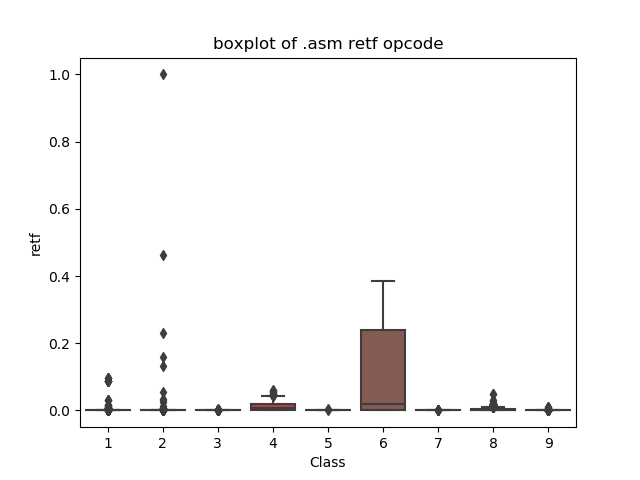

In [99]:
#Distribution of retf vs class labels
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

Here we see that using retf features, class 6 type of malware can be very easily separated from the rest of the malware classes.

<IPython.core.display.Javascript object>


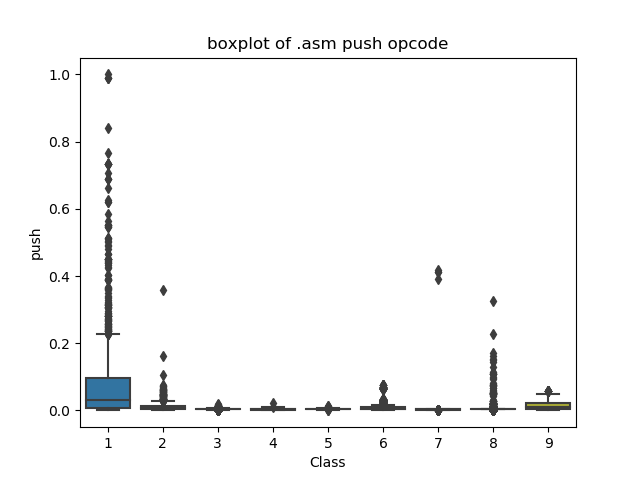

In [100]:
#Distribution of push vs class labels
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

Here class 1 can be very well separated from the rest of classes using push features. The variance is very low for all other classes for this feature. 

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

<IPython.core.display.Javascript object>


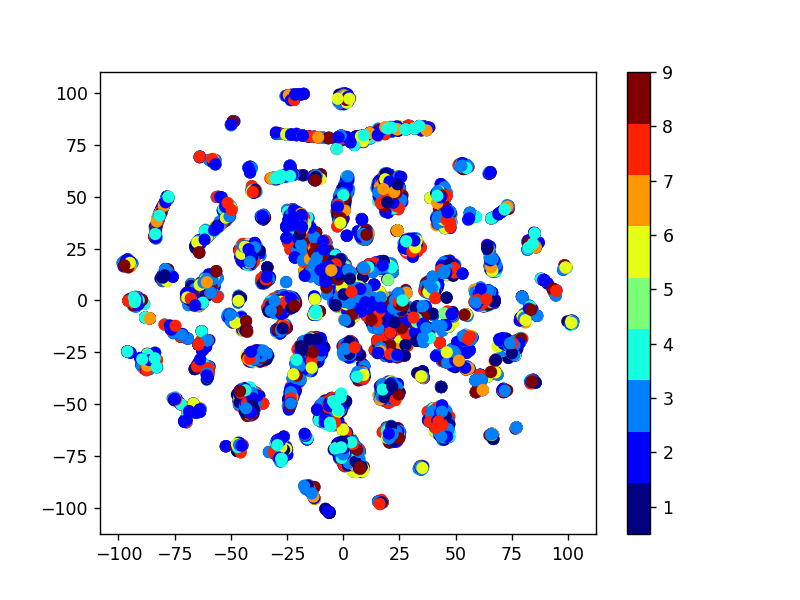

In [0]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so here we are trying multivariate analysis after removing those features
# the plot looks very messy

#Multivariate analysis on asm files features extracted using unigrams. We use various values of perplexities

#Multivariate analysis on byte files features extracted using unigrams.
def draw_tsne_asm(p):
    xtsne=TSNE(perplexity=p)
    results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
    vis_x = results[:, 0]
    vis_y = results[:, 1]
    plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
    plt.colorbar(ticks=range(10))
    plt.clim(0.5, 9)
    plt.show()

draw_tsne_asm(30)

From the above TSNE plot, it's clear that the features we have extracted are certainly useful in determining the classes. There is a partial separability amongst all the features.

<h3> 4.2.3 Conclusion on EDA</h3>

We have taken only 52 features from asm files (after reading through many blogs and research papers)
The univariate analysis was done only on few important features.

Key Take-aways from the EDA section.

1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less 
2. Each feature has its unique importance in separating the Class labels.

<h2> 4.3 Train and test split</h2>

In [51]:
#We will drop .BSS, .rtn, .CODE features from the dataset because we have seen these features are not very important in separating teh class labels.
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [52]:
#Train: 64%, Cross Validation 16%, Test 20%.
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [53]:
print( X_cv_asm.isnull().all())

size       False
HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
.bss:      False
.rdata:    False
.edata:    False
.rsrc:     False
.tls:      False
.reloc:    False
jmp        False
mov        False
retf       False
push       False
pop        False
xor        False
retn       False
nop        False
sub        False
inc        False
dec        False
add        False
imul       False
xchg       False
or         False
shr        False
cmp        False
call       False
shl        False
ror        False
rol        False
jnb        False
jz         False
lea        False
movzx      False
.dll       False
std::      False
:dword     False
edx        False
esi        False
eax        False
ebx        False
ecx        False
edi        False
ebp        False
esp        False
eip        False
dtype: bool


<h2> 4.4. Machine Learning models on features of .asm files</h2>

<h3> 4.4.1 K-Nearest Neigbors </h3>

log_loss for k =  1 is 0.104531321344
log_loss for k =  3 is 0.0958800580948
log_loss for k =  5 is 0.0995466557335
log_loss for k =  7 is 0.107227274345
log_loss for k =  9 is 0.119239543547
log_loss for k =  11 is 0.133926642781
log_loss for k =  13 is 0.147643793967
log_loss for k =  15 is 0.159439699615
log_loss for k =  17 is 0.16878376444
log_loss for k =  19 is 0.178020728839


<IPython.core.display.Javascript object>


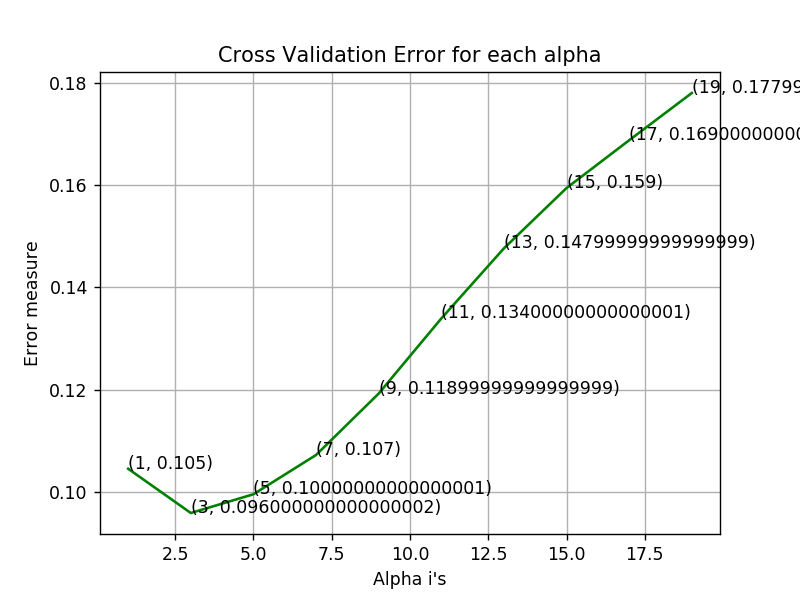

log loss for train data 0.0476773462198
log loss for cv data 0.0958800580948
log loss for test data 0.0894810720832
Number of misclassified points  2.02391904324
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


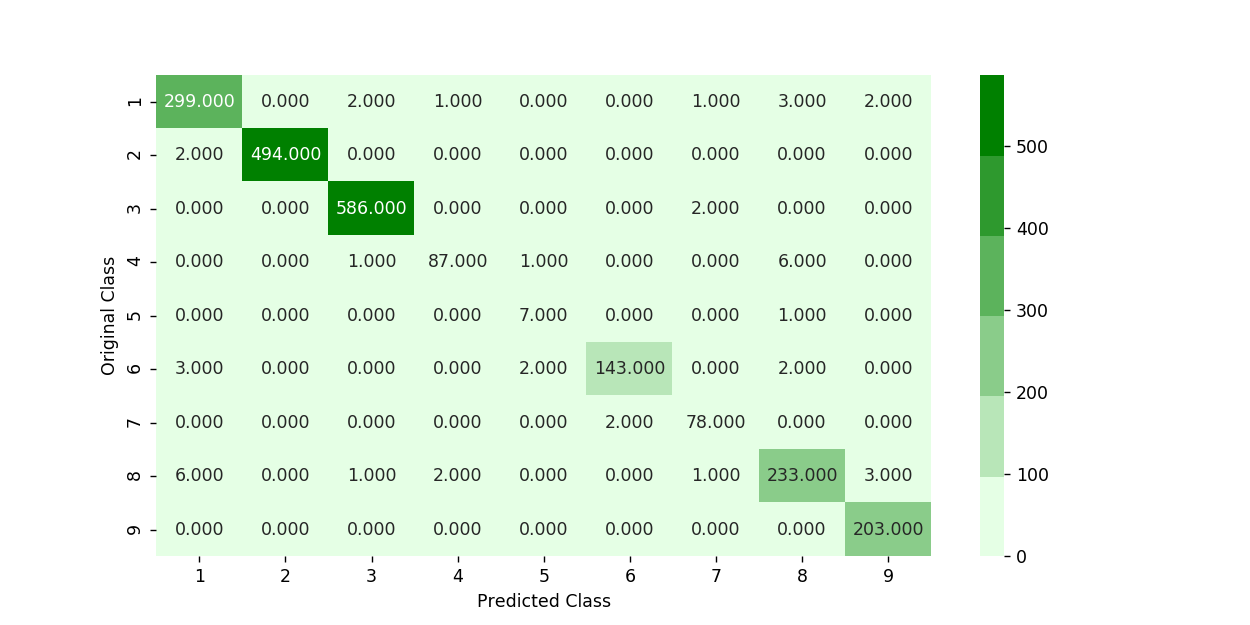

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


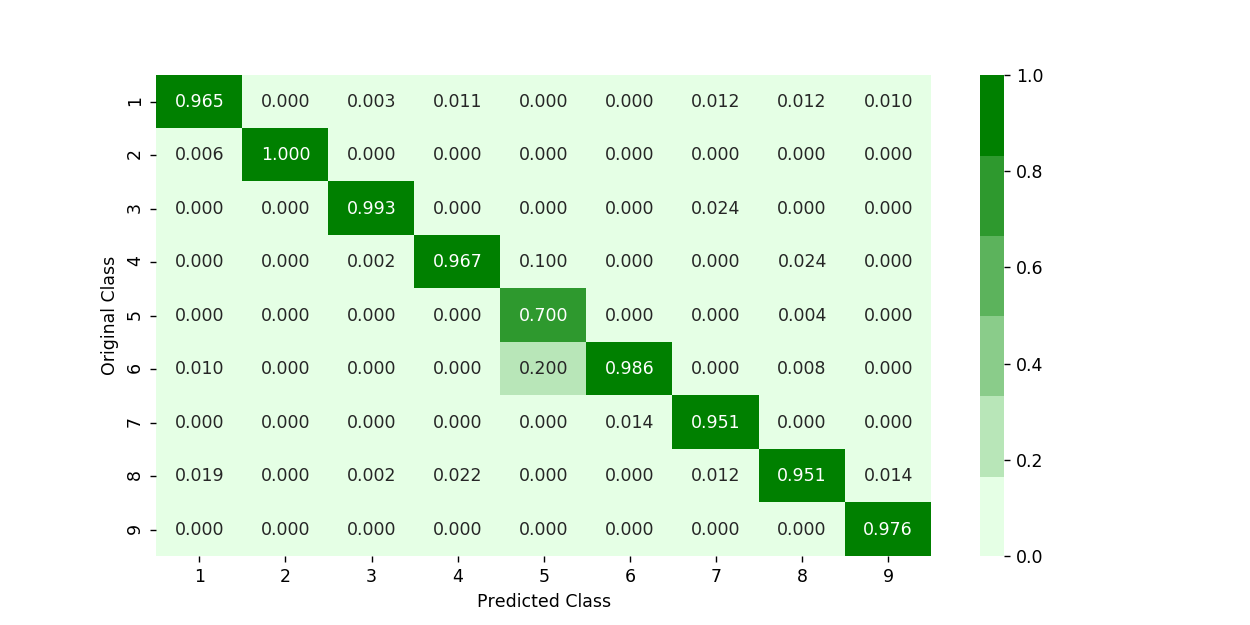

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


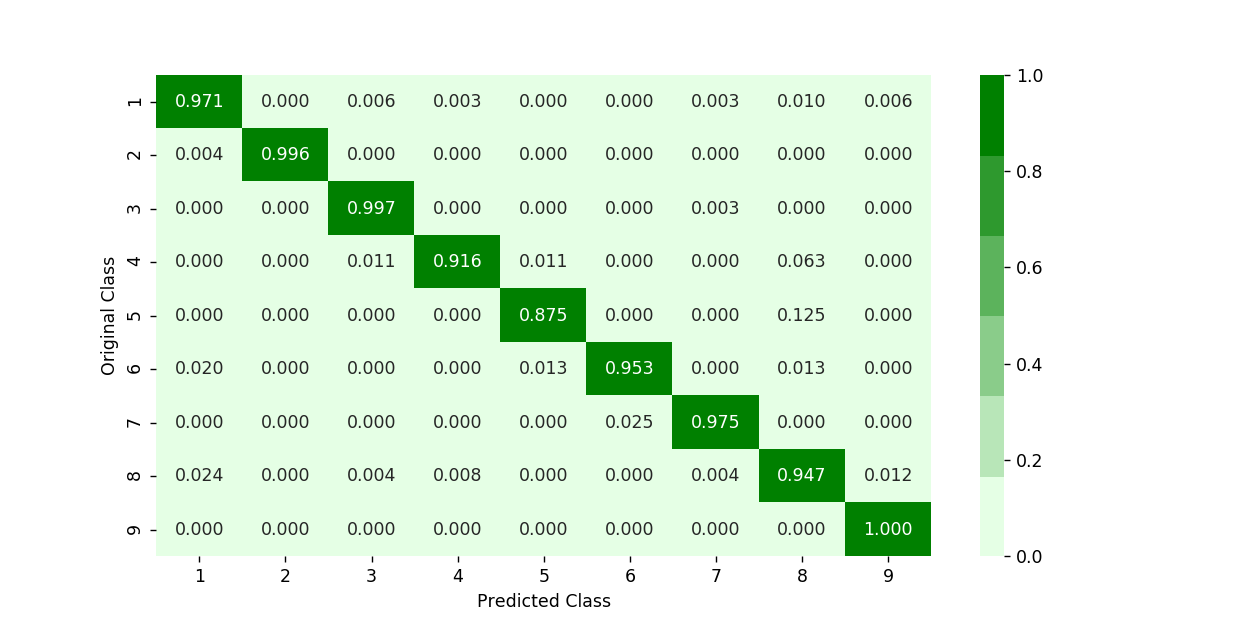

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.2 Logistic Regression </h3>

log_loss for c =  1e-05 is 1.58867274165
log_loss for c =  0.0001 is 1.54560797884
log_loss for c =  0.001 is 1.30137786807
log_loss for c =  0.01 is 1.33317456931
log_loss for c =  0.1 is 1.16705751378
log_loss for c =  1 is 0.757667807779
log_loss for c =  10 is 0.546533939819
log_loss for c =  100 is 0.438414998062
log_loss for c =  1000 is 0.424423536526


<IPython.core.display.Javascript object>


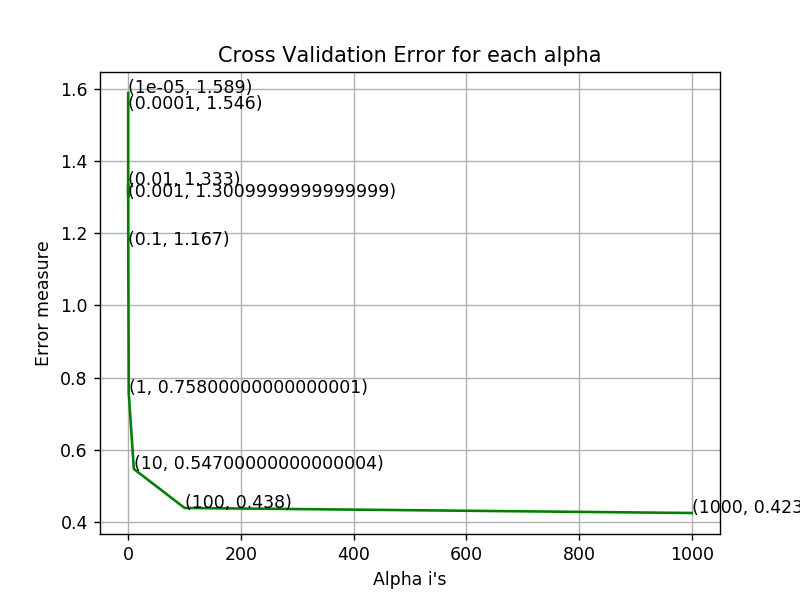

log loss for train data 0.396219394701
log loss for cv data 0.424423536526
log loss for test data 0.415685592517
Number of misclassified points  9.61361545538
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


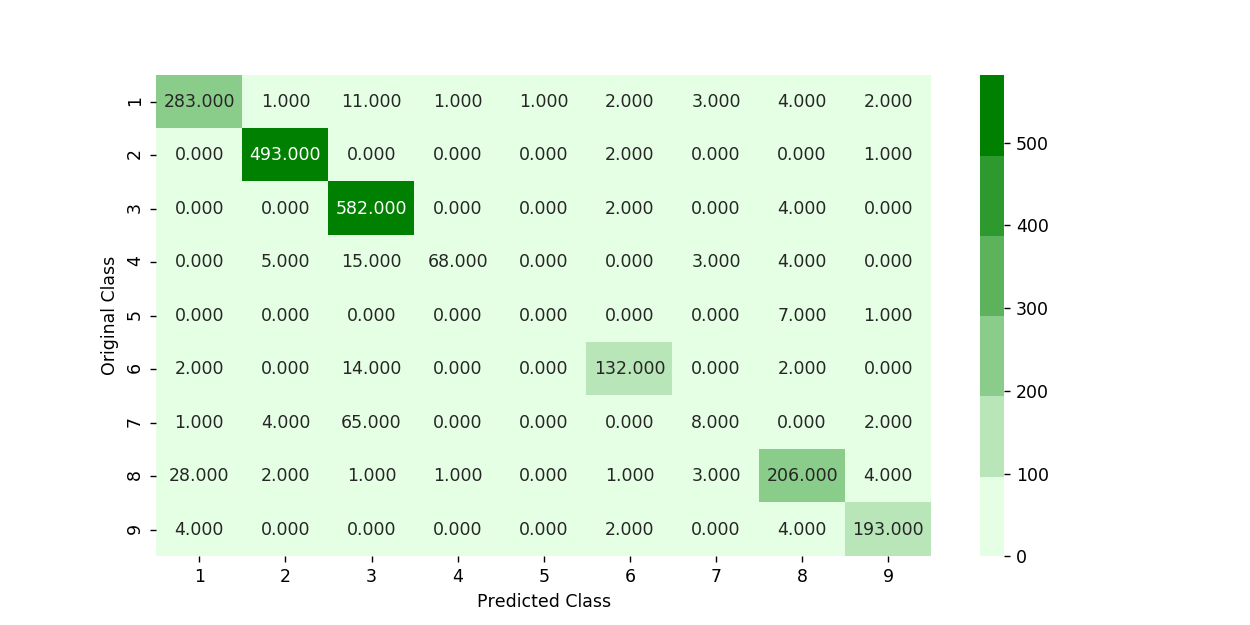

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


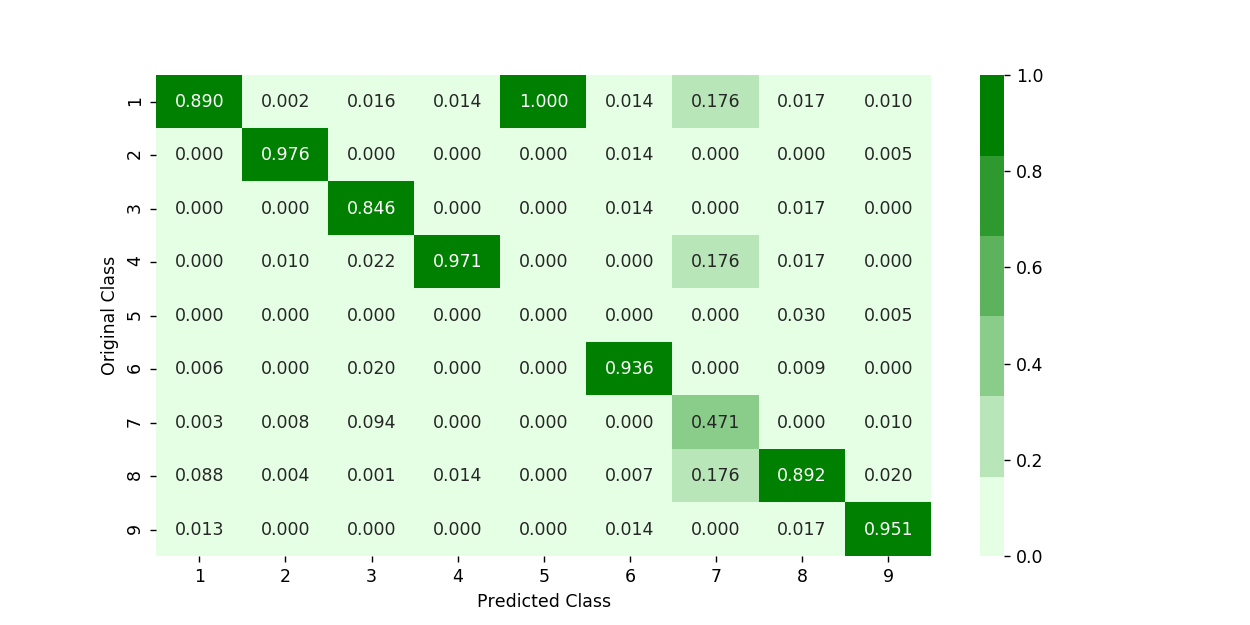

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


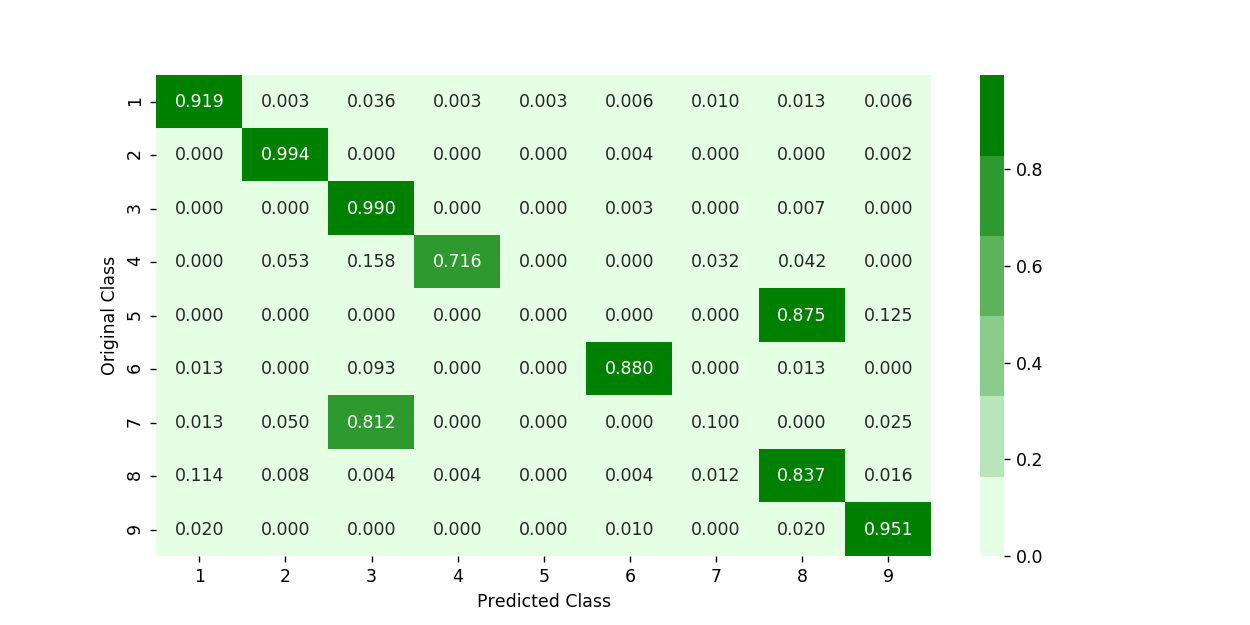

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.3 Random Forest Classifier</h3>

log_loss for c =  10 is 0.0581657906023
log_loss for c =  50 is 0.0515443148419
log_loss for c =  100 is 0.0513084973231
log_loss for c =  500 is 0.0499021761479
log_loss for c =  1000 is 0.0497972474298
log_loss for c =  2000 is 0.0497091690815
log_loss for c =  3000 is 0.0496706817633


<IPython.core.display.Javascript object>


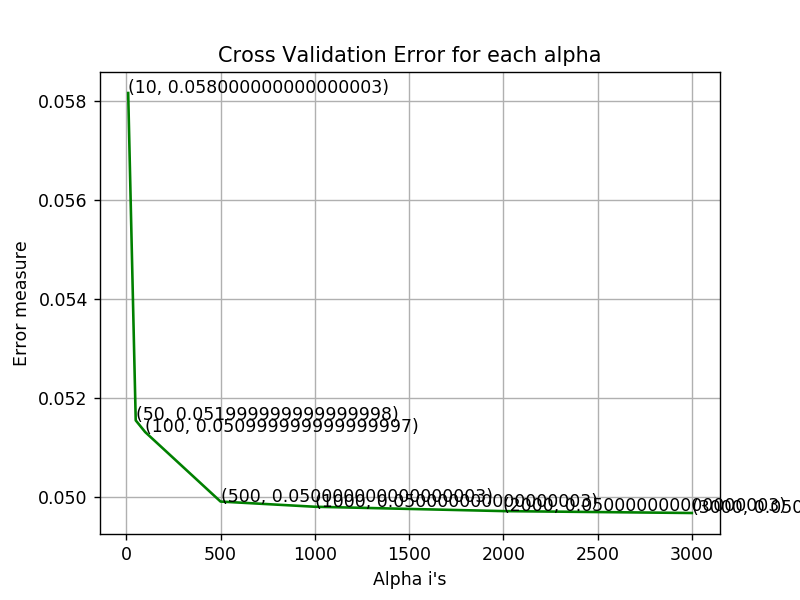

log loss for train data 0.0116517052676
log loss for cv data 0.0496706817633
log loss for test data 0.0571239496453
Number of misclassified points  1.14995400184
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


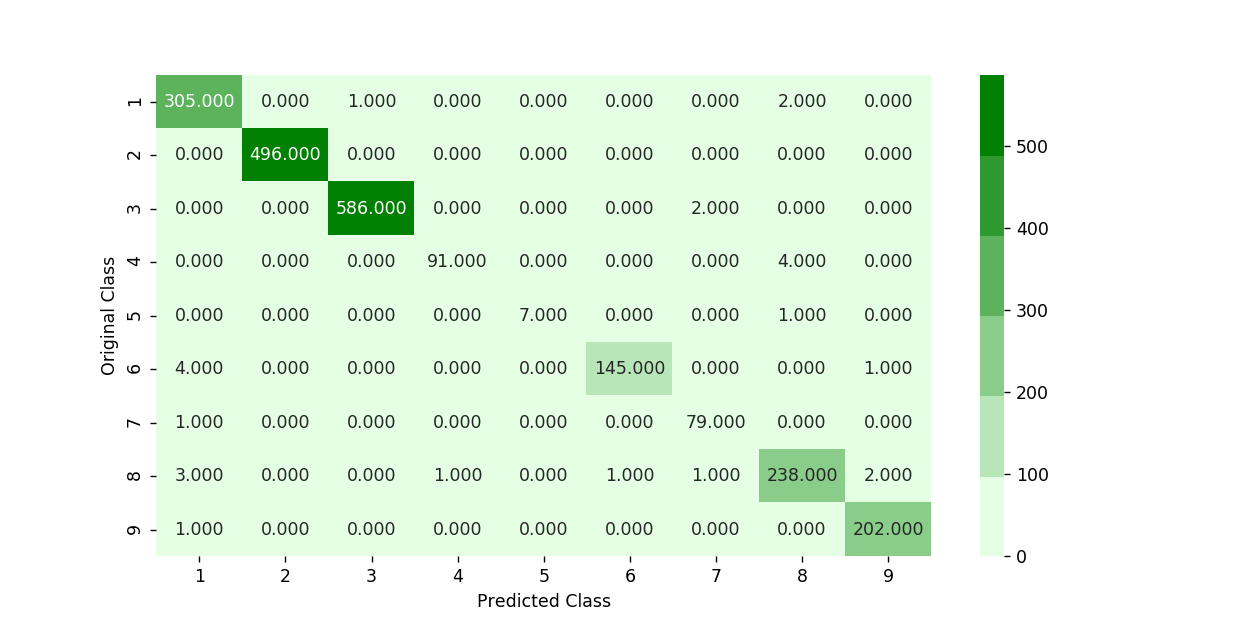

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


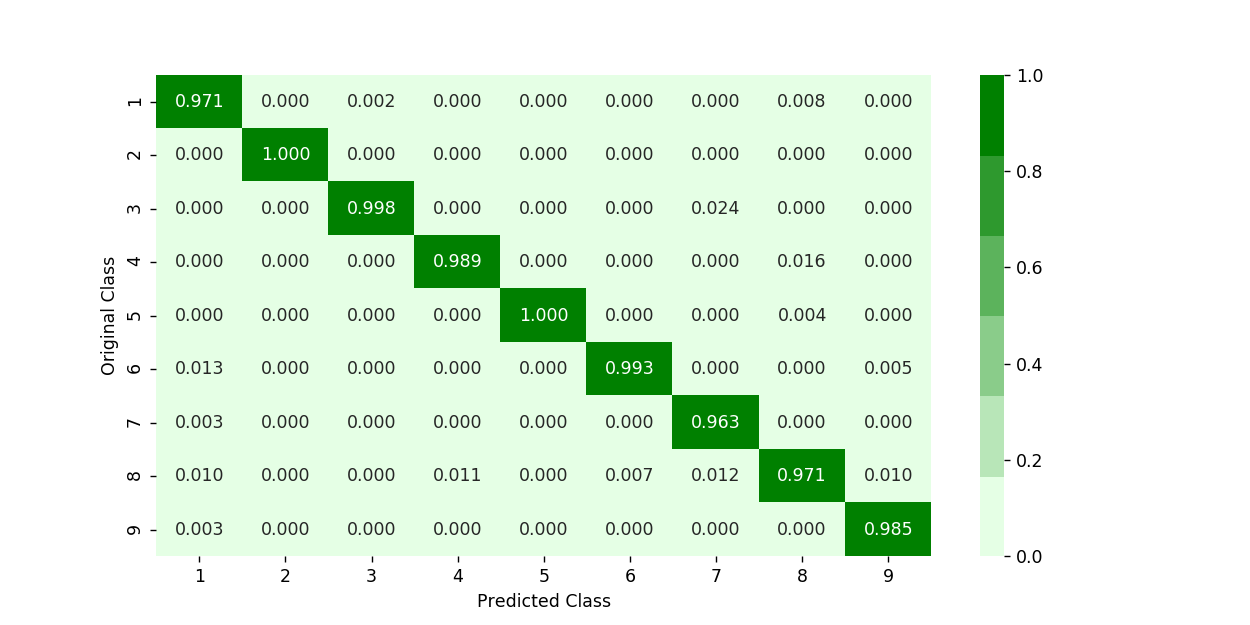

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


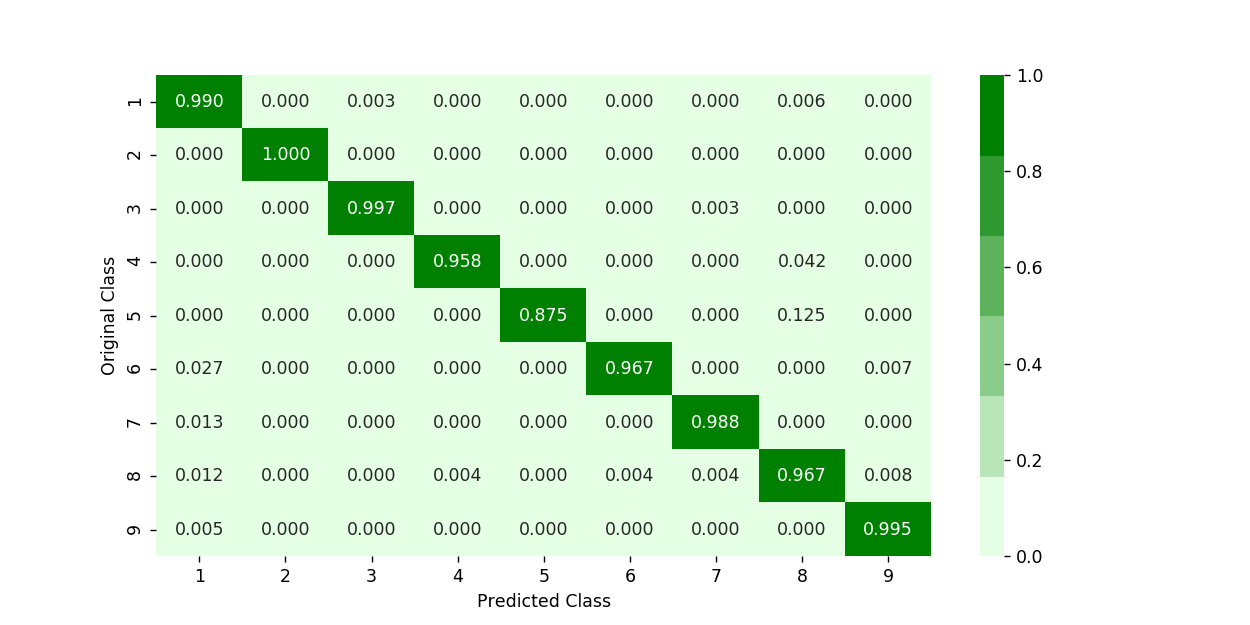

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.4 XgBoost Classifier</h3>

log_loss for c =  10 is 0.104344888454
log_loss for c =  50 is 0.0567190635611
log_loss for c =  100 is 0.056075038646
log_loss for c =  500 is 0.057336051683
log_loss for c =  1000 is 0.0571265109903
log_loss for c =  2000 is 0.057103406781
log_loss for c =  3000 is 0.0567993215778


<IPython.core.display.Javascript object>


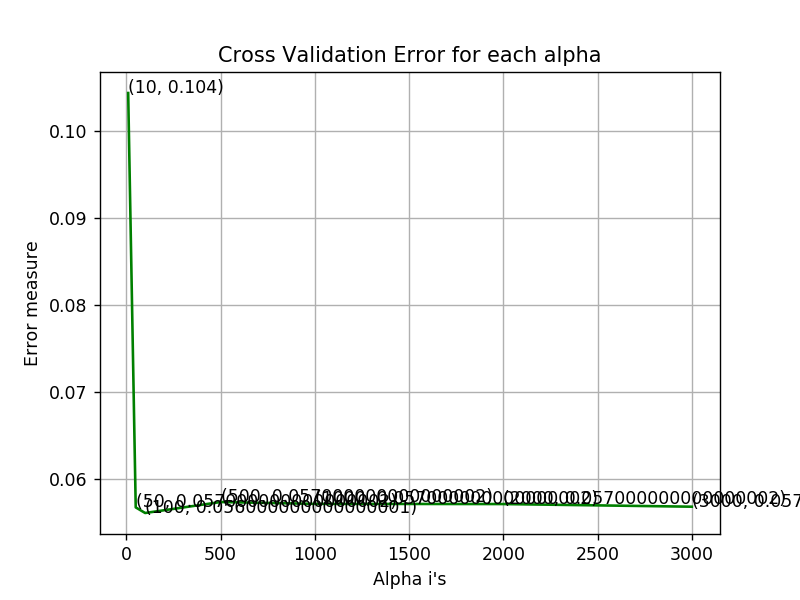

For values of best alpha =  100 The train log loss is: 0.0117883742574
For values of best alpha =  100 The cross validation log loss is: 0.056075038646
For values of best alpha =  100 The test log loss is: 0.0491647763845
Number of misclassified points  0.873965041398
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


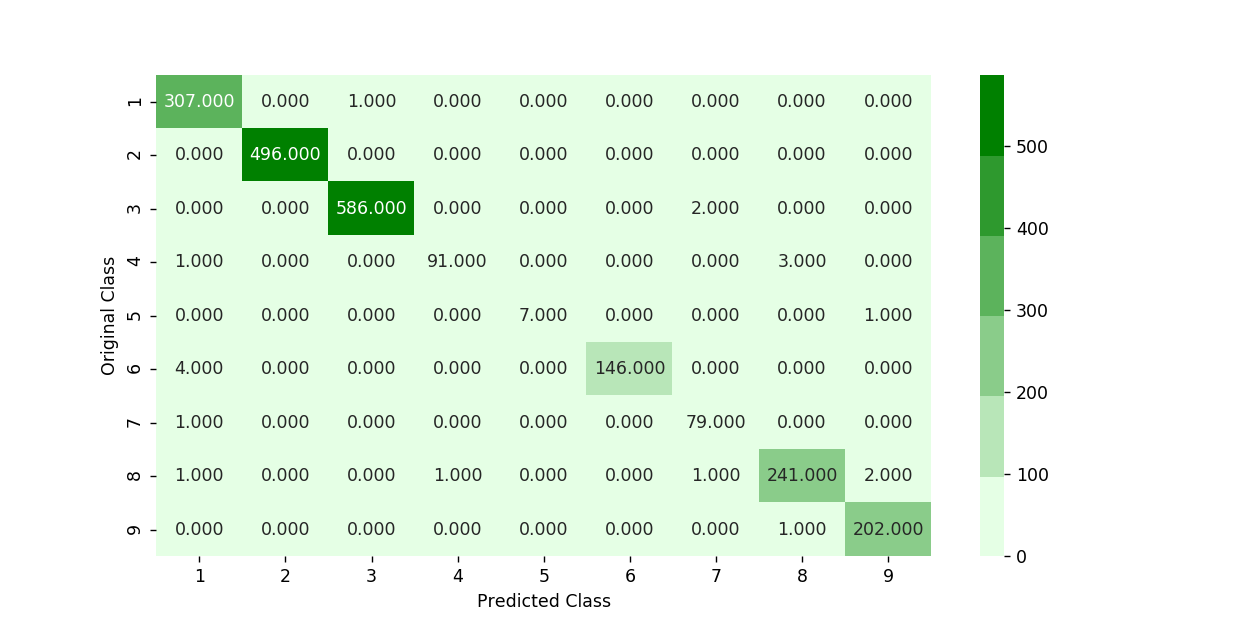

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


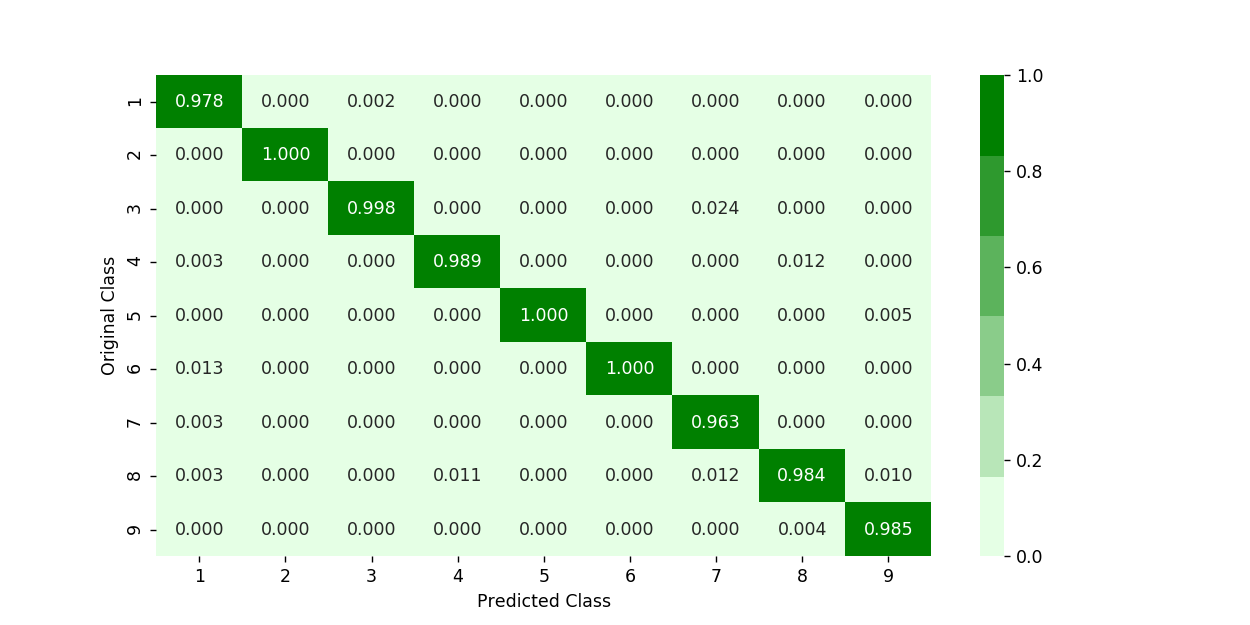

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


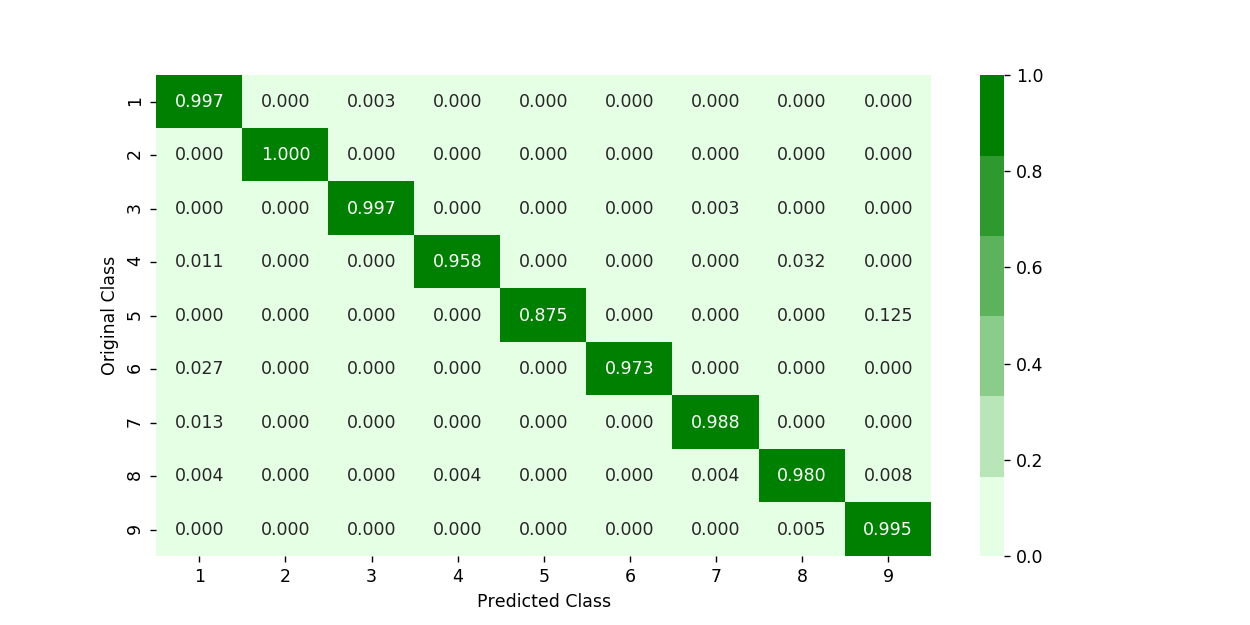

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.5 Xgboost Classifier with best hyperparameters</h3>

In [0]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.1min remaining:   39.3s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.3min remaining:   23.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.4min remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=10)

In [0]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.5}


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=200,subsample=0.5,learning_rate=0.15,colsample_bytree=0.5,max_depth=3)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.0102661325822
cv loss 0.0501201796687
test loss 0.0483908764397


<h2> 4.5. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.5.1. Merging both asm and byte file features</h3>

In [60]:
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...          f9        fa  \
0  0.001835  0.002058  0.002946  0.002638  ...    0.013560  0.013107   
1  0.003873  0.004747  0.006984  0.008267  ...    0.001920  0.001147   
2  0.005280  0.005078  0.002155  0.008104  ...    0.009804  0.011777   
3  0.000354  0.000310  0.000481  0.000959  ...    0.002121  0.001886   
4  0.000232  0.000148  0.000229  0.000376  ...    0.001530  0.000853   

         fb        fc        fd        fe        ff        ??      size  Class  
0  0.013634  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.001329  0.087867  0.002432  0.088411  0.074851  0.000606  0.121236      2  
2  0.012604  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.002272  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.001052  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

In [61]:
result_asm.head()

ID      size  Class   HEADER:    .text:  .Pav:   .idata:  \
0  01azqd4InC7m9JpocGv5  0.400910      9  0.101695  0.032927    0.0  0.006937   
1  01IsoiSMh5gxyDYTl4CB  0.099719      2  0.000000  0.161391    0.0  0.003690   
2  01jsnpXSAlgw6aPeDxrU  0.060553      9  0.101695  0.101121    0.0  0.001821   
3  01kcPWA9K2BOxQeS5Rju  0.000432      1  0.107345  0.001092    0.0  0.000761   
4  01SuzwMJEIXsK7A8dQbl  0.006983      8  0.101695  0.015220    0.0  0.001234   

     .data:     .bss:   .rdata:    ...       :dword       edx       esi  \
0  0.542847  0.000000  0.000467    ...     0.032784  0.015418  0.025875   
1  0.009758  0.000000  0.006877    ...     0.010846  0.004961  0.012316   
2  0.000263  0.000000  0.000285    ...     0.006773  0.000095  0.006181   
3  0.000023  0.000000  0.000084    ...     0.001028  0.000343  0.000746   
4  0.001825  0.012842  0.000000    ...     0.009150  0.000343  0.013875   

        eax       ebx       ecx  edi       ebp       esp       eip  
0  0.025744  0.004910  0.008930  0.0  0.027174  0.000428  0.049896  
1  0.007858  0.007570  0.005350  0.0  0.043478  0.000673  0.024839  
2  0.000100  0.003773  0.000713  0.0  0.048913  0.000000  0.012802  
3  0.000301  0.000360  0.001057  0.0  0.030797  0.001468  0.003173  
4  0.000482  0.012932  0.001363  0.0  0.027174  0.000000  0.008316  

[5 rows x 54 columns]

In [62]:
print(result.shape)
print(result_asm.shape)

(10868, 260)
(10868, 54)


In [63]:
result_x = pd.merge(result,result_asm.drop(['Class'], axis=1),on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9    ...       :dword       edx       esi  \
0  0.002946  0.002638  0.003531    ...     0.032784  0.015418  0.025875   
1  0.006984  0.008267  0.000394    ...     0.010846  0.004961  0.012316   
2  0.002155  0.008104  0.002707    ...     0.006773  0.000095  0.006181   
3  0.000481  0.000959  0.000521    ...     0.001028  0.000343  0.000746   
4  0.000229  0.000376  0.000246    ...     0.009150  0.000343  0.013875   

        eax       ebx       ecx  edi       ebp       esp       eip  
0  0.025744  0.004910  0.008930  0.0  0.027174  0.000428  0.049896  
1  0.007858  0.007570  0.005350  0.0  0.043478  0.000673  0.024839  
2  0.000100  0.003773  0.000713  0.0  0.048913  0.000000  0.012802  
3  0.000301  0.000360  0.001057  0.0  0.030797  0.001468  0.003173  
4  0.000482  0.012932  0.001363  0.0  0.027174  0.000000  0.008316  

[5 rows x 307 columns]

<h3> 4.5.2. Multivariate Analysis on final fearures</h3>

<IPython.core.display.Javascript object>


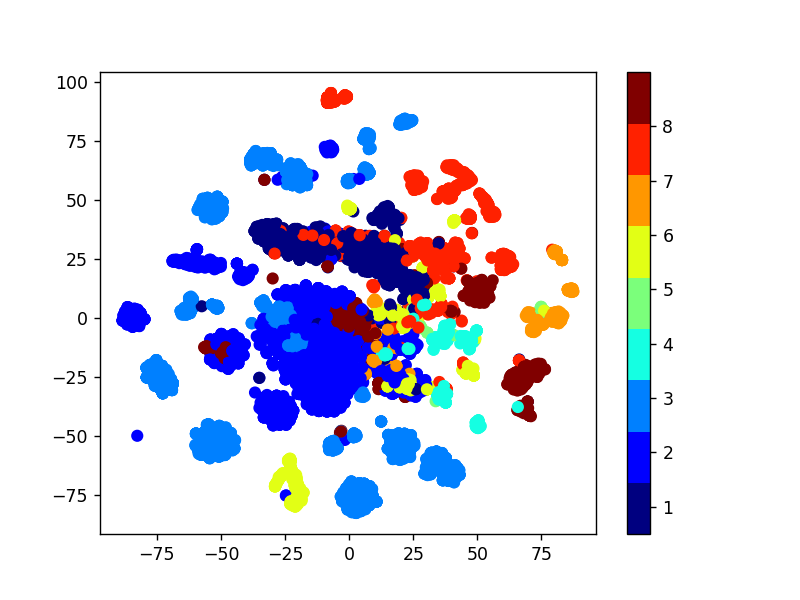

In [0]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x, axis=1)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3> 4.5.3. Train and Test split</h3>

In [0]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.5.4. Random Forest Classifier on final features</h3>

log_loss for c =  10 is 0.0461221662017
log_loss for c =  50 is 0.0375229563452
log_loss for c =  100 is 0.0359765822455
log_loss for c =  500 is 0.0358291883873
log_loss for c =  1000 is 0.0358403093496
log_loss for c =  2000 is 0.0357908022178
log_loss for c =  3000 is 0.0355909487962


<IPython.core.display.Javascript object>


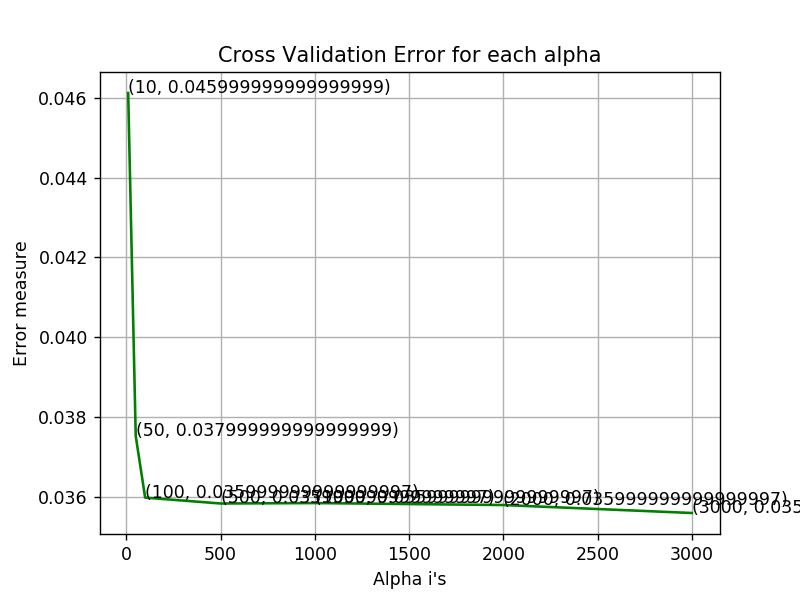

For values of best alpha =  3000 The train log loss is: 0.0166267614753
For values of best alpha =  3000 The cross validation log loss is: 0.0355909487962
For values of best alpha =  3000 The test log loss is: 0.0401141303589


In [0]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features</h3>

log_loss for c =  10 is 0.0898979446265
log_loss for c =  50 is 0.0536946658041
log_loss for c =  100 is 0.0387968186177
log_loss for c =  500 is 0.0347960327293
log_loss for c =  1000 is 0.0334668083237
log_loss for c =  2000 is 0.0316569078846
log_loss for c =  3000 is 0.0315972694477


<IPython.core.display.Javascript object>


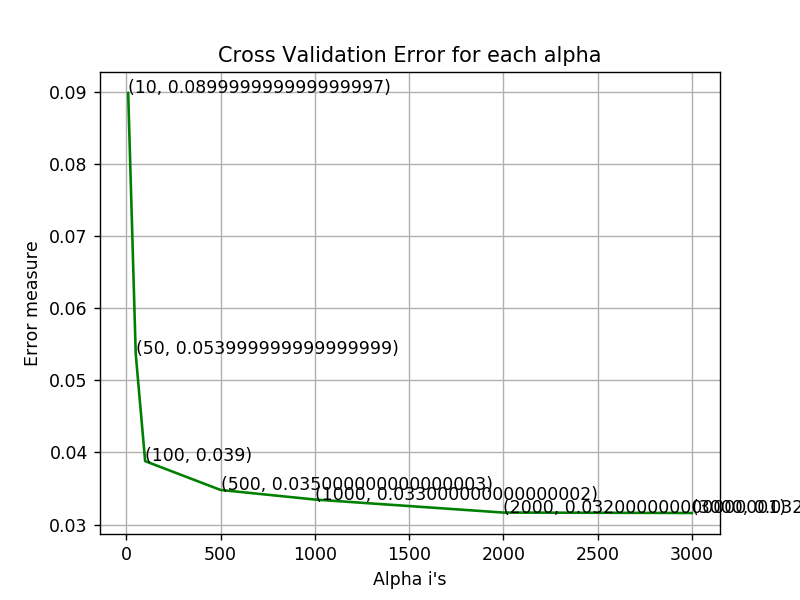

For values of best alpha =  3000 The train log loss is: 0.0111918809342
For values of best alpha =  3000 The cross validation log loss is: 0.0315972694477
For values of best alpha =  3000 The test log loss is: 0.0323978515915


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [0]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  4.5min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  5.8min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  6.7min remaining:   44.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.4min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=10)

In [0]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 0.3}


In [0]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,max_depth=10,learning_rate=0.15,colsample_bytree=0.3,subsample=1,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_merge))

For values of best alpha =  3000 The train log loss is: 0.0121922832297
For values of best alpha =  3000 The cross validation log loss is: 0.0344955487471
For values of best alpha =  3000 The test log loss is: 0.0317041132442


<h1> 5. Assignments </h1>

<ol>
<li> Add bi-grams and n-gram features on byte files and improve the log-loss</li>
<li> Using the 'dchad' github account (https://github.com/dchad/malware-detection), decrease the logloss to <=0.01 </li>
<li> Watch the video ( https://www.youtube.com/watch?v=VLQTRlLGz5Y ) that was in reference section and implement the image features to improve the logloss </li>
</ol>

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from sklearn.feature_extraction.text import CountVectorizer
import scipy
from tqdm import tqdm
import pickle as pkl
import os
import dask.dataframe as dd
import numpy as np
import pandas as pd
import scipy.sparse as sp
from tqdm import tqdm
import codecs

<h2>5.1 Bigrams Feature extraction from byte files</h2>

### Get the bigrams corpus

In [3]:
if not os.path.isdir("features"):
    os.mkdir('features')

#BIGRAMS
tokens="00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"
tokens=tokens.split(",")

#This function will return all the possible 257*257 combinations of bigrams that we want to extract
def get_bigram_tokens(tokens):
    sent=""
    byte_bigram_vocab=[]
    for i in range(len(tokens)):
        for j in range(len(tokens)):
            bigram=tokens[i]+" "+tokens[j]
            sent=sent+bigram+","
            byte_bigram_vocab.append(bigram)
    return byte_bigram_vocab

byte_bigram_vocab=get_bigram_tokens(tokens) #This will contain all the possible 257*257 combinations of bigrams that we want to extract

### Extract the byte bigram features and save the sparse matrix containing bi-gram features

In [ ]:
#Extract the byte bigram features and save the dataframe containing bi-gram features
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(),lowercase=False,ngram_range=(2,2),vocabulary=byte_bigram_vocab) #NOTE: without "tokenizer=lambda x: x.split()", "??" was not getting featurized
file_lists=os.listdir('byteFiles/')
byte_bigram_data=sp.csr_matrix((10868, 66049))

for i, file_name in tqdm(enumerate(file_lists)): ##The open() function returns a file object, which has a read() method for reading the content of the file
    file = open('byteFiles/' + file_name)
    corpus = [file.read().replace('\n', ' ').lower()] #Read the file content. Replace newline by "space" and make it into one continuis large text
    bigrams=vectorizer.fit_transform(corpus)
    byte_bigram_data[i,:] += bigrams
    file.close()
    
with open('features/byte_bigram_data_pkl.pkl', 'wb') as file:
    pkl.dump(byte_bigram_data, file)

sp.save_npz('features/byte_bigram_data_csr.npz', byte_bigram_data)

4430it [8:35:01, 14.39s/it]

In [44]:
with open('features/byte_bigram_data.pkl', 'rb') as file:
    byte_bigram_data_pkl=pkl.load(file)

In [37]:
byte_bigram_data_csr=sp.load_npz('features/byte_bigram_data.npz')

In [5]:
"""
#Extract the byte bigram features and save the dataframe containing bi-gram features
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(),lowercase=False,ngram_range=(2,2),vocabulary=byte_bigram_vocab) #NOTE: without "tokenizer=lambda x: x.split()", "??" was not getting featurized
file_lists=os.listdir('byteFiles')
features=["ID"]+vectorizer.get_feature_names()
byte_bigram_df=pd.DataFrame(columns=features)

with open("features/byte_bigram_df.csv", mode='w') as byte_bigram_df:
    byte_bigram_df.write(','.join(map(str, features)))
    byte_bigram_df.write('\n')
    for _, file in tqdm(enumerate(file_lists)):
        file_id=file.split(".")[0] #ID of each file
        file = open('byteFiles/' + file)
        corpus=[file.read().replace('\n', ' ').lower()] #This will contain all the byte codes for a given file
        bigrams=vectorizer.fit_transform(corpus) #This will return a sparse vector containing all the bigram counts from the corpus
        row=scipy.sparse.csr_matrix(bigrams).toarray() #Update each row of the dataframe with the bigram counts of the respective file
        byte_bigram_df.write(','.join(map(str, [file_id]+list(row[0])))) #Write a single row in the CSV file
        byte_bigram_df.write('\n')
        file.close()
"""

10868it [3:29:50,  3.07it/s]


### Display the byte bigrams count dataset

In [24]:
#Use dask dataframe to avoid memory problems
byte_bigram_df=dd.read_csv("features/byte_bigram_df.csv",sample=256000000)
byte_bigram_df.head()

ID   00 00  00 01  00 02  00 03  00 04  00 05  00 06  \
0  01azqd4InC7m9JpocGv5  274425   1269   1029   1469   1227   1144   1437   
1  01IsoiSMh5gxyDYTl4CB   21075    752     73     48    175     12     10   
2  01jsnpXSAlgw6aPeDxrU   16798    596    159    144    513    595    557   
3  01kcPWA9K2BOxQeS5Rju   10417    225     61     69    114     40     25   
4  01SuzwMJEIXsK7A8dQbl   16271     62     22    126      9     11      3   

   00 07  00 08  ...    ?? f7  ?? f8  ?? f9  ?? fa  ?? fb  ?? fc  ?? fd  \
0   1263   1174  ...        0      0      0      0      0      0      0   
1     11     42  ...        0      0      0      0      0      0      0   
2    146    528  ...        0      0      0      0      0      0      0   
3     22     63  ...        0      0      0      0      0      0      0   
4      5     11  ...        0      0      0      0      0      0      0   

   ?? fe  ?? ff  ?? ??  
0      0      0   1819  
1      0      0   8580  
2      0      0    459  
3      0      0  13932  
4      0      0   9000  

[5 rows x 66050 columns]

In [ ]:
del(byte_bigram_df)

<h2>5.2 Registers Bigrams Feature extraction from ASM files</h2>

### Get the registers sequence from the ASM files

In [6]:
registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
registers_dict = dict(zip(registers, [1 for i in range(len(registers))]))

In [7]:
if not os.path.isdir("asmFilesRegisters"):
    os.mkdir('asmFilesRegisters')

#Get registers sequences for each of the files and save it as a text file. Each row in the text file will correspond to the respective file. In the asm files the registerss did not occur side by side, they occured 
#at regular intervals with some words between them. So we have to extract the registerss in such a way that sequence information is preserved. Things like which registers occurs after which registers, Based on that
#a bigram matrix of vectors can be calculated which will give us the 2 grams sequence information from each file.
def get_registers_seq():
    filenames=os.listdir('asmFiles')
    for asmfile in tqdm(filenames):
        registers_file = open("asmFilesRegisters/{}_registers_bigrams.txt".format(asmfile.split('.')[0]), "w+")
        registers_sequence = ""
        with codecs.open('asmFiles/' + asmfile, encoding='cp1252', errors ='replace') as file:
            for lines in file:
                line = lines.rstrip().split()            
                for word in line:
                    if registers_dict.get(word)==1:
                        registers_sequence += word + ' '
        registers_file.write(registers_sequence + "\n")
        registers_file.close()
    
get_registers_seq()

registers_bigram_vocab=get_bigram_tokens(registers) #This will contain all the possible 9*9 combinations of bigrams that we want to extract

100%|██████████| 10868/10868 [9:05:09<00:00,  1.03s/it]  


### Extract the registers bigram features and save the dataframe containing bi-gram features

In [8]:
#Extract the bigram features and save the dataframe containing bi-gram features
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(),lowercase=False,ngram_range=(2,2),vocabulary=registers_bigram_vocab) #NOTE: without "tokenizer=lambda x: x.split()", "??" was not getting featurized
file_lists=os.listdir('asmFilesRegisters')
features=["ID"]+vectorizer.get_feature_names()
registers_bigram_df=pd.DataFrame(columns=features)

with open("features/registers_bigram_df.csv", mode='w') as registers_bigram_df:
    registers_bigram_df.write(','.join(map(str, features)))
    registers_bigram_df.write('\n')
    for _, file in tqdm(enumerate(file_lists)):
        file_id=file.split("_")[0] #ID of each file
        file = open('asmFilesRegisters/' + file)
        corpus=[file.read().replace('\n', ' ').lower()] #This will contain all the registers codes for a given file
        bigrams=vectorizer.fit_transform(corpus) #This will return a sparse vector containing all the bigram counts from the corpus
        row=scipy.sparse.csr_matrix(bigrams).toarray() #Update each row of the dataframe with the bigram counts of the respective file
        registers_bigram_df.write(','.join(map(str, [file_id]+list(row[0])))) #Write a single row in the CSV file
        registers_bigram_df.write('\n')
        file.close()

10868it [03:18, 54.69it/s]


### Display the registers bigrams count dataset

In [129]:
registers_bigram_df=pd.read_csv("features/registers_bigram_df.csv")
registers_bigram_df.head()

ID  edx edx  edx esi  edx eax  edx ebx  edx ecx  edx edi  \
0  01azqd4InC7m9JpocGv5        0        0        0        0        0        0   
1  01IsoiSMh5gxyDYTl4CB       31       12       72       15       68       23   
2  01jsnpXSAlgw6aPeDxrU       66        0       72        1       50        0   
3  01kcPWA9K2BOxQeS5Rju        1        1        4        4        0        0   
4  01SuzwMJEIXsK7A8dQbl        8        1      374        0       12        1   

   edx ebp  edx esp  edx eip   ...     esp eip  eip edx  eip esi  eip eax  \
0        0        0        0   ...           0        0        0        0   
1        5        8        0   ...           0        0        0        0   
2        5        0        0   ...           0        0        0        0   
3        0        0        0   ...           0        0        0        0   
4        8        3        0   ...           0        0        0        0   

   eip ebx  eip ecx  eip edi  eip ebp  eip esp  eip eip  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  

[5 rows x 82 columns]

In [ ]:
del(registers_bigram_df)

<h2>5.3 Registers Trigrams Feature extraction from ASM files</h2>

### Get the trigram corpus

In [9]:
#TRIGRAMS
registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']

#This function will return all the possible n*n combinations of trigrams that we want to extract
def get_trigram_tokens(tokens):
    sent=""
    registers_trigram_vocab=[]
    for i in range(len(tokens)):
        for j in range(len(tokens)):
            for k in range(len(tokens)):
                trigram=tokens[i]+" "+tokens[j]+" "+tokens[k]
                registers_trigram_vocab.append(trigram)
    return registers_trigram_vocab

registers_trigram_vocab=get_trigram_tokens(registers) #This will contain all the possible n*n*n combinations of trigrams that we want to extract

### Extract the registers trigram features and save the dataframe containing tri-gram features

In [10]:
#Extract the trigram features and save the dataframe containing tri-gram features
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(),lowercase=False,ngram_range=(3,3),vocabulary=registers_trigram_vocab) #NOTE: without "tokenizer=lambda x: x.split()", "??" was not getting featurized
file_lists=os.listdir('asmFilesRegisters')
features=["ID"]+vectorizer.get_feature_names()
registers_trigram_df=pd.DataFrame(columns=features)

with open("features/registers_trigram_df.csv", mode='w') as registers_trigram_df:
    registers_trigram_df.write(','.join(map(str, features)))
    registers_trigram_df.write('\n')
    for _, file in tqdm(enumerate(file_lists)):
        file_id=file.split("_")[0] #ID of each file
        file = open('asmFilesRegisters/' + file)
        corpus=[file.read().replace('\n', ' ').lower()] #This will contain all the registers codes for a given file
        trigrams=vectorizer.fit_transform(corpus) #This will return a sparse vector containing all the trigram counts from the corpus
        row=scipy.sparse.csr_matrix(trigrams).toarray() #Update each row of the dataframe with the trigram counts of the respective file
        registers_trigram_df.write(','.join(map(str, [file_id]+list(row[0])))) #Write a single row in the CSV file
        registers_trigram_df.write('\n')
        file.close()

10868it [01:12, 148.92it/s]


### Display the registers trigrams count dataset

In [138]:
registers_trigram_df=pd.read_csv("features/registers_trigram_df.csv")
registers_trigram_df.head()

ID  edx edx edx  edx edx esi  edx edx eax  edx edx ebx  \
0  01azqd4InC7m9JpocGv5            0            0            0            0   
1  01IsoiSMh5gxyDYTl4CB            6            1           10            0   
2  01jsnpXSAlgw6aPeDxrU           23            0           18            0   
3  01kcPWA9K2BOxQeS5Rju            0            0            0            1   
4  01SuzwMJEIXsK7A8dQbl            3            0            1            0   

   edx edx ecx  edx edx edi  edx edx ebp  edx edx esp  edx edx eip  \
0            0            0            0            0            0   
1           12            2            0            0            0   
2           23            0            2            0            0   
3            0            0            0            0            0   
4            2            0            2            0            0   

      ...       eip esp eip  eip eip edx  eip eip esi  eip eip eax  \
0     ...                 0            0            0            0   
1     ...                 0            0            0            0   
2     ...                 0            0            0            0   
3     ...                 0            0            0            0   
4     ...                 0            0            0            0   

   eip eip ebx  eip eip ecx  eip eip edi  eip eip ebp  eip eip esp  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   eip eip eip  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 730 columns]

In [ ]:
del(registers_trigram_df)

<h2>5.4 Opcodes Bigrams Feature extraction from ASM files</h2>

In [11]:
#Putting the list in a dictionary to decrease time complexity
opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
opcode_dict = dict(zip(opcodes, [1 for i in range(len(opcodes))]))

### Get the opcodes sequence from the ASM files

In [3]:
opcode_dict = dict(zip(opcodes, [1 for i in range(len(opcodes))]))
if not os.path.isdir("asmFilesOpcodes"):
    os.mkdir('asmFilesOpcodes')

#Get opcode sequences for each of the files and save it as a text file. Each row in the text file will correspond to the respective file. In the asm files the opcodes did not occur side by side, they occured 
#at regular intervals with some words between them. So we have to extract the opcodes in such a way that sequence information is preserved. Things like which opcode occurs after which opcode, Based on that
#a bigram matrix of vectors can be calculated which will give us the 2 grams sequence information from each file. 
def get_opcode_seq():
    filenames=os.listdir('asmFiles')
    for asmfile in tqdm(filenames):
        opcode_file = open("asmFilesOpcodes/{}_opcode_bigrams.txt".format(asmfile.split('.')[0]), "w+")
        opcode_sequence = ""
        with codecs.open('asmFiles/' + asmfile, encoding='cp1252', errors ='replace') as file:
            for lines in file:
                line = lines.rstrip().split()            
                for word in line:
                    if opcode_dict.get(word)==1:
                        opcode_sequence += word + ' '
        opcode_file.write(opcode_sequence + "\n")
        opcode_file.close()
    
get_opcode_seq()

opcodes_bigram_vocab=get_bigram_tokens(opcodes)

100%|██████████| 10868/10868 [10:12:45<00:00,  1.09s/it] 


### Extract the opcodes bigram features and save the dataframe containing bi-gram features

In [14]:
#Extract the bigram features and save the dataframe containing bi-gram features
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(),lowercase=False,ngram_range=(2,2),vocabulary=opcodes_bigram_vocab) #NOTE: without "tokenizer=lambda x: x.split()", "??" was not getting featurized
file_lists=os.listdir('asmFilesOpcodes')
features=["ID"]+vectorizer.get_feature_names()
opcodes_bigram_df=pd.DataFrame(columns=features)

with open("features/opcodes_bigram_df.csv", mode='w') as opcodes_bigram_df:
    opcodes_bigram_df.write(','.join(map(str, features)))
    opcodes_bigram_df.write('\n')
    for _, file in tqdm(enumerate(file_lists)):
        file_id=file.split("_")[0] #ID of each file
        file = open('asmFilesOpcodes/' + file)
        corpus=[file.read().replace('\n', ' ').lower()] #This will contain all the opcodes codes for a given file
        bigrams=vectorizer.fit_transform(corpus) #This will return a sparse vector containing all the bigram counts from the corpus
        row=scipy.sparse.csr_matrix(bigrams).toarray() #Update each row of the dataframe with the bigram counts of the respective file
        opcodes_bigram_df.write(','.join(map(str, [file_id]+list(row[0])))) #Write a single row in the CSV file
        opcodes_bigram_df.write('\n')
        file.close()

10868it [03:47, 47.81it/s]


### Display the opcodes bigrams count dataset

In [15]:
opcodes_bigram_df=dd.read_csv("features/opcodes_bigram_df.csv")
opcodes_bigram_df.head()

ID  jmp jmp  jmp mov  jmp retf  jmp push  jmp pop  \
0  01azqd4InC7m9JpocGv5      440      192         0         6        0   
1  01IsoiSMh5gxyDYTl4CB        0       32         0         3        1   
2  01jsnpXSAlgw6aPeDxrU        0        0         0         0        0   
3  01kcPWA9K2BOxQeS5Rju        0        5         0         1        0   
4  01SuzwMJEIXsK7A8dQbl        5       57         1         4        1   

   jmp xor  jmp retn  jmp nop  jmp sub     ...       movzx cmp  movzx call  \
0       17         0        0       24     ...               0           0   
1        3         1        0        0     ...               1           0   
2        0         0        0        0     ...              12           0   
3        2         1        0        0     ...               0           0   
4        1         0        0        0     ...              11           0   

   movzx shl  movzx ror  movzx rol  movzx jnb  movzx jz  movzx rtn  movzx lea  \
0          0          0          0          0         0          0          0   
1          0          0          0          0         0          0          0   
2          0          0          0          0         3          0         17   
3          0          0          0          0         0          0          0   
4          0          0          0          0         0          0          0   

   movzx movzx  
0            0  
1            0  
2           12  
3            0  
4            4  

[5 rows x 677 columns]

In [ ]:
del(opcodes_bigram_df)

<h2>5.5 Opcodes Trigrams Feature extraction from ASM files</h2>

### Get the trigram corpus

In [16]:
#Putting the list in a dictionary to decrease time complexity
opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
opcodes_trigram_vocab=get_trigram_tokens(opcodes) #This will contain all the possible n*n*n combinations of trigrams that we want to extract

### Extract the opcodes trigrams features and save the dataframe containing tri-gram features

In [17]:
#Extract the trigram features and save the dataframe containing tri-gram features
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(),lowercase=False,ngram_range=(3,3),vocabulary=opcodes_trigram_vocab) #NOTE: without "tokenizer=lambda x: x.split()", "??" was not getting featurized
file_lists=os.listdir('asmFilesOpcodes')
features=["ID"]+vectorizer.get_feature_names()
opcodes_trigram_df=pd.DataFrame(columns=features)

with open("features/opcodes_trigram_df.csv", mode='w') as opcodes_trigram_df:
    opcodes_trigram_df.write(','.join(map(str, features)))
    opcodes_trigram_df.write('\n')
    for _, file in tqdm(enumerate(file_lists)):
        file_id=file.split("_")[0] #ID of each file
        file = open('asmFilesOpcodes/' + file)
        corpus=[file.read().replace('\n', ' ').lower()] #This will contain all the opcodes codes for a given file
        trigrams=vectorizer.fit_transform(corpus) #This will return a sparse vector containing all the trigram counts from the corpus
        row=scipy.sparse.csr_matrix(trigrams).toarray() #Update each row of the dataframe with the trigram counts of the respective file
        opcodes_trigram_df.write(','.join(map(str, [file_id]+list(row[0])))) #Write a single row in the CSV file
        opcodes_trigram_df.write('\n')
        file.close()

10868it [06:25, 32.60it/s]


### Load the opcodes trigrams count dataset

In [151]:
opcodes_trigram_df=pd.read_csv("features/opcodes_trigram_df.csv")
opcodes_trigram_df.head()

ID  jmp jmp jmp  jmp jmp mov  jmp jmp retf  jmp jmp push  \
0  01azqd4InC7m9JpocGv5          437            0             0             0   
1  01IsoiSMh5gxyDYTl4CB            0            0             0             0   
2  01jsnpXSAlgw6aPeDxrU            0            0             0             0   
3  01kcPWA9K2BOxQeS5Rju            0            0             0             0   
4  01SuzwMJEIXsK7A8dQbl            2            1             1             1   

   jmp jmp pop  jmp jmp xor  jmp jmp retn  jmp jmp nop  jmp jmp sub  \
0            0            1             0            0            0   
1            0            0             0            0            0   
2            0            0             0            0            0   
3            0            0             0            0            0   
4            0            0             0            0            0   

         ...          movzx movzx cmp  movzx movzx call  movzx movzx shl  \
0        ...                        0                 0                0   
1        ...                        0                 0                0   
2        ...                        1                 0                0   
3        ...                        0                 0                0   
4        ...                        1                 0                0   

   movzx movzx ror  movzx movzx rol  movzx movzx jnb  movzx movzx jz  \
0                0                0                0               0   
1                0                0                0               0   
2                0                0                0               1   
3                0                0                0               0   
4                0                0                0               0   

   movzx movzx rtn  movzx movzx lea  movzx movzx movzx  
0                0                0                  0  
1                0                0                  0  
2                0                1                  1  
3                0                0                  0  
4                0                0                  0  

[5 rows x 17577 columns]

In [ ]:
del(opcodes_trigram_df)

<h2>5.6 Extract Image features from the ASM files</h2>

Refer: https://www.kaggle.com/c/malware-classification/discussion/13897#latest-105551

I have used the code snippets by:
1. Xiaozhou Wang, xiaozhou@ualberta.ca
2. Jiwei Liu, University of Pittsburgh, aixueer4ever@gmail.com
3. Xueer Chen, University of Pittsburgh, xuer.chen.human@gmail.com

I have used the code from the pdf provided at: https://www.kaggle.com/c/malware-classification/discussion/13897#latest-105551

### Convert the ASM files and BYTE files to images. (Original Image Dimensions are retained here)

In [19]:
import numpy as np
import os
import codecs
import imageio
import array
from datetime import datetime as dt

if not os.path.isdir("asmFileImages"):
    os.mkdir("asmFileImages")
if not os.path.isdir("byteFileImages"):    
    os.mkdir("byteFileImages")

asmfile_list=os.listdir("asmFiles/")
bytefile_list=os.listdir("byteFiles/")

#This function will generate images from ASM files and Byte files. 
def get_images_from_text(filename_list, save_folder):  
    for filename in tqdm(filename_list):
        
        if(filename.endswith("asm")):
            file = codecs.open("asmFiles/"+filename, 'rb')
            file_size = os.path.getsize("asmFiles/"+filename)
        else:
            file = open("byteFiles/"+filename, 'rb')
            file_size = os.path.getsize("byteFiles/"+filename)
        
        file_width = int(file_size**0.5)
        rem = file_size%file_width
        img_array = array.array('B')
        img_array.fromfile(file,file_size-rem)
        file.close()
        img_arr_final = np.reshape(img_array[:file_width * file_width], (file_width, file_width))
        img_arr_final = np.uint8(img_arr_final)
        imageio.imsave(save_folder+'/' + filename.split(".")[0] + '.png',resized_img)

In [ ]:
#Convert ASM files to Images
get_images_from_text(asmfile_list,'asmFileImages')

In [ ]:
#Convert Byte files to Images
get_images_from_text(bytefile_list,'byteFileImages')

### Resize the ASM and Byte image files to 256x256 dimensions. Keep the original images untouched.

Own Reference: https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv/49208362#49208362

In [2]:
import cv2
import os
import imageio
from tqdm import tqdm

#Take any image as input, resize it to 256x256, return the resized image
def resize_image(image):
    resized_image = cv2.resize(image, (256,256), interpolation = cv2.INTER_AREA) #Resize all the images to 256X256 dimensions
    return resized_image

In [3]:
#Resize ASM Images and save it to the directory finalASMimages/256_256_Images
if not os.path.isdir("finalASMimages"):
    os.mkdir("finalASMimages/")
if not os.path.isdir("finalASMimages/256_256_Images/"):    
    os.mkdir("finalASMimages/256_256_Images/")

save_folder="finalASMimages/256_256_Images/"
orig_asm_image_list=os.listdir("asmFileImages/")
for file in tqdm(orig_asm_image_list):
    image=imageio.imread("asmFileImages"+"/"+file)
    resized_image=resize_image(image)
    imageio.imsave(save_folder + '/' + file,resized_image)

100%|██████████| 10868/10868 [49:41<00:00,  3.65it/s] 


In [5]:
#Resize BYTE Images and save it to the directory finalBYTEimages/256_256_Images
if not os.path.isdir("finalBYTEimages"):
    os.mkdir("finalBYTEimages/")
if not os.path.isdir("finalBYTEimages/256_256_Images/"):    
    os.mkdir("finalBYTEimages/256_256_Images/")

save_folder="finalBYTEimages/256_256_Images/"
orig_byte_image_list=os.listdir("byteFileImages/")
for file in tqdm(orig_byte_image_list):
    image=imageio.imread("byteFileImages"+"/"+file)
    resized_image=resize_image(image)
    imageio.imsave(save_folder + '/' + file,resized_image)

100%|██████████| 10868/10868 [26:26<00:00, 15.72it/s] 


### Load the image, convert it into a numpy array and take the first 2000 pixels from each image.

In [19]:
import os
from scipy.misc import imread
import imageio
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

### Get first 2000 pixel information from ASM File Images

In [20]:
file_lists=os.listdir('finalASMimages/256_256_Images/')

with open("features/asm_image_df.csv", mode='w') as asm_image_df: #file_lists = 10868, asm_image_df=2000
    asm_image_df.write(','.join(map(str, ["ID"]+["Pixel{}".format(i) for i in range(2000)])))
    asm_image_df.write('\n')
    
    for image in tqdm(file_lists):
        file_id=image.split(".")[0]
        image_array=imageio.imread("finalASMimages/256_256_Images/"+image) #This will contain the image matrix in 2D format
        image_array=image_array.flatten()[:2000] #Taking the first 2000 pixels from the flattened array
        asm_image_df.write(','.join(map(str, [file_id]+list(image_array))))
        asm_image_df.write('\n') #Write to the dataframe

100%|██████████| 10868/10868 [02:59<00:00, 60.48it/s]


### Display the ASM Image dataframe

In [22]:
asm_image_df=pd.read_csv("features/asm_image_df.csv")
asm_image_df.head()

ID  Pixel0  Pixel1  Pixel2  Pixel3  Pixel4  Pixel5  \
0  01azqd4InC7m9JpocGv5      56      53      56      55      52      57   
1  01IsoiSMh5gxyDYTl4CB      57      55      52      49      50      56   
2  01jsnpXSAlgw6aPeDxrU      54      47      57      51      53      55   
3  01kcPWA9K2BOxQeS5Rju      69      65      67      73      80      72   
4  01SuzwMJEIXsK7A8dQbl      57      63      51      61      47      57   

   Pixel6  Pixel7  Pixel8    ...      Pixel1990  Pixel1991  Pixel1992  \
0      55      55      54    ...             46         46         46   
1      57      53      51    ...             61         62         55   
2      55      59      51    ...             52         55         60   
3      58      55      55    ...             99        109         83   
4      62      64      50    ...             72         46         71   

   Pixel1993  Pixel1994  Pixel1995  Pixel1996  Pixel1997  Pixel1998  Pixel1999  
0         47         46         45         48         46         46         46  
1         58         54         54         54         58         59         58  
2         52         53         56         55         49         54         59  
3         54         50         50         50         51         50         50  
4         70         77         63         50         73         45         59  

[5 rows x 2001 columns]

In [ ]:
del(asm_image_df)

### Get first 2000 pixel information from Byte File Images

In [21]:
file_lists=os.listdir('finalBYTEimages/256_256_Images/')

with open("features/byte_image_df.csv", mode='w') as byte_image_df: #file_lists = 10868, byte_image_df=2000
    byte_image_df.write(','.join(map(str, ["ID"]+["Pixel{}".format(i) for i in range(2000)])))
    byte_image_df.write('\n')
    
    for image in tqdm(file_lists):
        file_id=image.split(".")[0]
        image_array=imageio.imread("finalBYTEimages/256_256_Images/"+image) #This will contain the image matrix in 2D format
        image_array=image_array.flatten()[:2000] #Taking the first 2000 pixels from the flattened array
        byte_image_df.write(','.join(map(str, [file_id]+list(image_array))))
        byte_image_df.write('\n') #Write to the dataframe

100%|██████████| 10868/10868 [02:41<00:00, 67.48it/s] 


### Display the BYTE image dataframe

In [23]:
byte_image_df=pd.read_csv("features/byte_image_df.csv")
byte_image_df.head()

ID  Pixel0  Pixel1  Pixel2  Pixel3  Pixel4  Pixel5  \
0  01azqd4InC7m9JpocGv5      48      48      46      47      47      45   
1  01IsoiSMh5gxyDYTl4CB      46      47      47      48      49      47   
2  01jsnpXSAlgw6aPeDxrU      53      48      49      52      49      50   
3  01kcPWA9K2BOxQeS5Rju      45      48      50      49      45      45   
4  01SuzwMJEIXsK7A8dQbl      48      50      43      48      46      50   

   Pixel6  Pixel7  Pixel8    ...      Pixel1990  Pixel1991  Pixel1992  \
0      46      50      47    ...             46         47         48   
1      47      48      48    ...             50         51         50   
2      49      50      51    ...             50         50         49   
3      44      47      46    ...             47         47         46   
4      48      43      45    ...             49         48         49   

   Pixel1993  Pixel1994  Pixel1995  Pixel1996  Pixel1997  Pixel1998  Pixel1999  
0         46         46         48         49         47         46         49  
1         51         50         51         52         50         50         48  
2         50         49         50         49         50         51         48  
3         47         45         46         47         44         45         39  
4         47         51         48         50         46         47         52  

[5 rows x 2001 columns]

In [ ]:
del(byte_image_df)

### Display some sample images that we have obtained from ASM files.

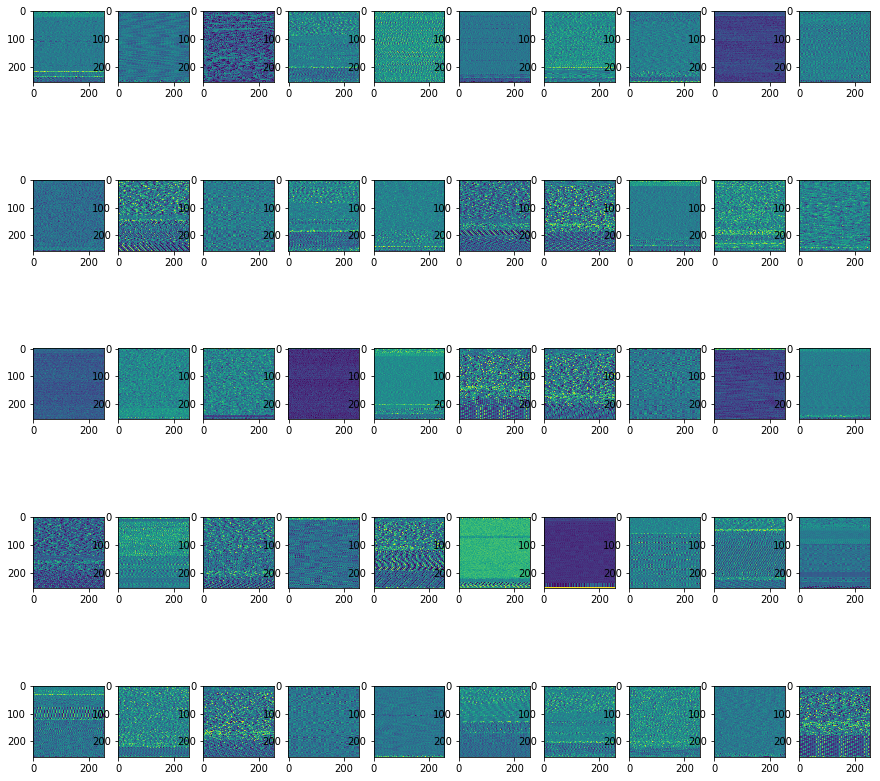

In [43]:
image_dir = "finalASMimages/256_256_Images/"
filenames=os.listdir(image_dir)[0:51]

#Display 50 images from ASM files
plt.figure(figsize=(15,15))
for i in range(1,len(filenames)):
    row = i
    image = imageio.imread(image_dir+filenames[i]) #Image(filename=image_dir+filenames[i])
    plt.subplot(5,10,row)
    plt.imshow(image)
plt.show()

### Display some sample images that we have obtained from Byte files.

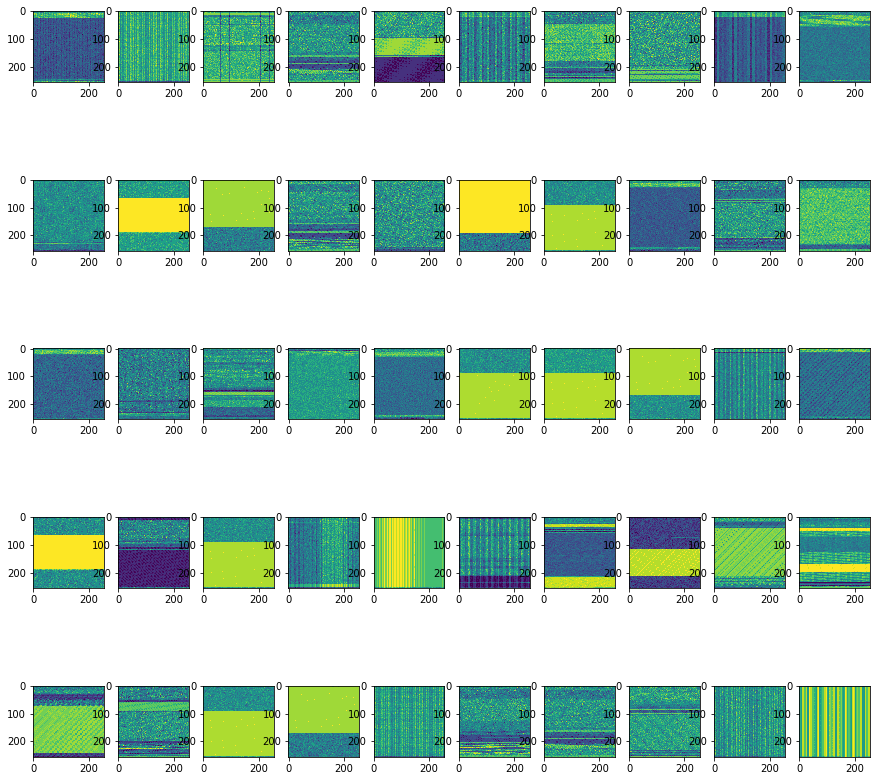

In [44]:
image_dir = "finalBYTEimages/256_256_Images/"
filenames=os.listdir(image_dir)[0:51]

#Display 50 images from byte files
plt.figure(figsize=(15,15))
for i in range(1,len(filenames)):
    row = i
    image = imageio.imread(image_dir+filenames[i]) #Image(filename=image_dir+filenames[i])
    plt.subplot(5,10,row)
    plt.imshow(image)
plt.show()

<h2>5.7 Extract CNN Codes from the image files using Pretrained VGG-16 on ImageNet data</h2>

In [1]:
from datetime import datetime as dt
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
import numpy as np

Using TensorFlow backend.


### Get CNN codes for ASM Files

In [4]:
global_start=dt.now()

#We will take 256 x 256 image dimensions, because the least dimension that was found was 139*139.
img_width, img_height = 256, 256
batch_size=32

#Declaration of parameters needed for training and validation
data_dir = 'finalASMimages'


#Get the bottleneck features by  Weights.T * Xi
def save_bottleneck_features_asm():
    datagen = ImageDataGenerator(rescale=1./255)

    #Load the pre trained VGG16 model from Keras, we will initialize only the convolution layers and ignore the top layers.
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator_tr = datagen.flow_from_directory(data_dir,
                                            target_size=(img_width, img_height),
                                            batch_size=batch_size,
                                            class_mode=None, #class_mode=None means the generator won't load the class labels.
                                            shuffle=False) #We won't shuffle the data, because we want the class labels to stay in order.
    nb_train_samples = len(generator_tr.filenames)
    bottleneck_features = model.predict_generator(generator_tr, nb_train_samples // batch_size)
    
    np.save('features/final_features/asm_files_bottleneck_features.npy',bottleneck_features) #bottleneck_features is a numpy array
    print("Got the bottleneck features in time: ",dt.now()-global_start)

save_bottleneck_features_asm()

Found 10868 images belonging to 1 classes.
Got the bottleneck features in time:  1:46:07.764360


### Get CNN codes for Byte Files

In [0]:
global_start=dt.now()

#We will take 256 x 256 image dimensions, because the least dimension that was found was 139*139.
img_width, img_height = 256, 256
batch_size=32

#Declaration of parameters needed for training and validation
data_dir = "finalBYTEimages"

#Get the bottleneck features by  Weights.T * Xi
def save_bottleneck_features_byte():
    datagen = ImageDataGenerator(rescale=1./255)

    #Load the pre trained VGG16 model from Keras, we will initialize only the convolution layers and ignore the top layers.
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator_tr = datagen.flow_from_directory(data_dir,
                                            target_size=(img_width, img_height),
                                            batch_size=batch_size,
                                            class_mode=None, #class_mode=None means the generator won't load the class labels.
                                            shuffle=False) #We won't shuffle the data, because we want the class labels to stay in order.
    nb_train_samples = len(generator_tr.filenames)
    bottleneck_features = model.predict_generator(generator_tr, nb_train_samples // batch_size)
    
    np.save('features/final_features/byte_files_bottleneck_features.npy',bottleneck_features) #bottleneck_features is a numpy array
    print("Got the bottleneck features in time: ",dt.now()-global_start)

save_bottleneck_features_byte()

Found 10868 images belonging to 1 classes.
Got the bottleneck features in time:  2:12:47.663707


In [ ]:
import gc
gc.collect()

<h3>TODO: Trigrams + Fourgrams  + Fivegrams + 6Grams Feature extraction from byte + ASM files</h3>
<h3>TODO: Get count of malicious words</h3>

In [114]:
#TRIGRAMS
"""tokens="00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"
tokens=tokens.split(",")

#This function will return all the possible 257*257*257 combinations of trigrams that we want to extract
def get_trigram_tokens(tokens):
    sent=""
    byte_trigram_vocab=[]
    for i in tqdm(range(len(tokens))):
        for j in range(len(tokens)):
            for k in range(len(tokens)):
                trigram=tokens[i]+" "+tokens[j]+" "+tokens[k]
                sent=sent+trigram+","
                byte_trigram_vocab.append(trigram)
    return byte_trigram_vocab

byte_trigram_vocab=get_trigram_tokens(tokens) #This will contain all the possible 257*257*257 combinations of trigrams that we want to extract"""

#Extract the trigram features and save the dataframe containing bi-gram features
"""vectorizer = CountVectorizer(tokenizer=lambda x: x.split(),lowercase=False,ngram_range=(3,3),vocabulary=byte_trigram_vocab) #NOTE: without "tokenizer=lambda x: x.split()", "??" was not featurized
file_lists=os.listdir('byteFiles')
bytetrigram_vector = scipy.sparse.csr_matrix((1, len(byte_trigram_vocab))) #file_lists = 10868, byte_trigram_vocab=66049, we will use this vector to later update the dataframe

byte_trigram_df=pd.DataFrame(columns=vectorizer.get_feature_names())

with open("features/byte_trigram_df.csv", mode='w') as byte_trigram_df:
    byte_trigram_df.write(','.join(map(str, vectorizer.get_feature_names())))
    byte_trigram_df.write('\n')
    for _, file in tqdm(enumerate(file_lists)):
        f = open('byteFiles/' + file)
        corpus=[f.read().replace('\n', ' ').lower()] #This will contain all the byte codes for a given file
        trigrams=vectorizer.fit_transform(corpus) #This will return a sparse vector containing all the trigram counts from the corpus
        row=scipy.sparse.csr_matrix(trigrams).toarray() #Update each row of the dataframe with the trigram counts of the respective file
        byte_trigram_df.write(','.join(map(str, row[0])))
        byte_trigram_df.write('\n')
        f.close() """

print("TODO: Trigrams Feature extraction from byte files ")

TODO: Trigrams Feature extraction from byte files 


<h2>6.0 Getting the most important features using using SelectKBest with Chi-Square Test</h2>

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

if not os.path.isdir("features/final_features"):
    os.mkdir("features/final_features")
    
if not os.path.isdir("features/feature_score"):
    os.mkdir("features/feature_score")
    
if not os.path.isdir("features/final_features"):
    os.mkdir("features/final_features")
    
#Load the class labels for training with random forest feature selector
with open('features/class_labels.pkl', 'rb') as file:
    labels=pkl.load(file)

<h2>6.1 Getting the 50 most important features for Registers bigrams </h2>

In [7]:
#Load the non normalized bigrams dataset
X=pd.read_csv('features/registers_bigram_df.csv')
y=labels
X.head()

ID  edx edx  edx esi  edx eax  edx ebx  edx ecx  edx edi  \
0  01azqd4InC7m9JpocGv5       55       97      211       33      130       40   
1  01IsoiSMh5gxyDYTl4CB       31       12       72       15       68       23   
2  01jsnpXSAlgw6aPeDxrU       66        0       72        1       50        0   
3  01kcPWA9K2BOxQeS5Rju        1        1        4        4        0        0   
4  01SuzwMJEIXsK7A8dQbl        8        1      374        0       12        1   

   edx ebp  edx esp  edx eip   ...     esp eip  eip edx  eip esi  eip eax  \
0       15        0        0   ...           0        0        0        0   
1        5        8        0   ...           0        0        0        0   
2        5        0        0   ...           0        0        0        0   
3        0        0        0   ...           0        0        0        0   
4        8        3        0   ...           0        0        0        0   

   eip ebx  eip ecx  eip edi  eip ebp  eip esp  eip eip  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  

[5 rows x 82 columns]

In [9]:
#Get the best 50 features using SelectKBest. Save the feature scores along with the feature names in a feature_score_df_df, which we will use to get the best fetures from the bigrams df data
kbest_object=SelectKBest(score_func=chi2, k=50)
best_features=kbest_object.fit(X.drop("ID", axis=1),y)
df_scores=pd.DataFrame(best_features.scores_)
df_columns=pd.DataFrame(X.columns)
feature_score_df=pd.concat([df_columns,df_scores],axis=1)
feature_score_df.columns=["Feature_Name","Feature_Score"]

#Let's look at the top 50 features along with their scores + Save the feature score DF
feature_score_df=feature_score_df.nlargest(50,"Feature_Score")
feature_score_df.to_csv("features/feature_score/registers_bigram_df.csv", index=None)
feature_score_df.head(5)

Feature_Name  Feature_Score
47      edi esi   27901.216442
20      eax esi   25442.443807
23      eax ecx   24936.321815
21      eax eax   20482.605329
11      esi esi   19799.204224

In [10]:
#Get the first 50 feature names in a list
top_50_feats=list(feature_score_df["Feature_Name"])

#Get the dataframe containing the top 50 features
reduced_features=pd.concat([X["ID"],X[top_50_feats]], axis=1)

#Save the dataframe containing the top 50 features
reduced_features.to_csv("features/final_features/top50_registers_bigram_df.csv",index=None)

In [ ]:
del(X, feature_score_df, reduced_features)

<h2>6.2 Getting the 300 most important features from Registers trigrams  </h2>

In [14]:
#Load the non normalized bigrams dataset
X=pd.read_csv('features/registers_trigram_df.csv')
y=labels
X.head()

ID  edx edx edx  edx edx esi  edx edx eax  edx edx ebx  \
0  01azqd4InC7m9JpocGv5            7            2           27            6   
1  01IsoiSMh5gxyDYTl4CB            6            1           10            0   
2  01jsnpXSAlgw6aPeDxrU           23            0           18            0   
3  01kcPWA9K2BOxQeS5Rju            0            0            0            1   
4  01SuzwMJEIXsK7A8dQbl            3            0            1            0   

   edx edx ecx  edx edx edi  edx edx ebp  edx edx esp  edx edx eip  \
0            9            3            1            0            0   
1           12            2            0            0            0   
2           23            0            2            0            0   
3            0            0            0            0            0   
4            2            0            2            0            0   

      ...       eip esp eip  eip eip edx  eip eip esi  eip eip eax  \
0     ...                 0            0            0            0   
1     ...                 0            0            0            0   
2     ...                 0            0            0            0   
3     ...                 0            0            0            0   
4     ...                 0            0            0            0   

   eip eip ebx  eip eip ecx  eip eip edi  eip eip ebp  eip eip esp  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   eip eip eip  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 730 columns]

In [15]:
#Get the best 300 features using SelectKBest. Save the feature scores along with the feature names in a feature_score_df_df, which we will use to get the best fetures from the bigrams df data
kbest_object=SelectKBest(score_func=chi2, k=300)
best_features=kbest_object.fit(X.drop("ID", axis=1),y)
df_scores=pd.DataFrame(best_features.scores_)
df_columns=pd.DataFrame(X.columns)
feature_score_df=pd.concat([df_columns,df_scores],axis=1)
feature_score_df.columns=["Feature_Name","Feature_Score"]

#Let's look at the top 300 features along with their scores + Save the feature score DF
feature_score_df=feature_score_df.nlargest(300,"Feature_Score")
feature_score_df.to_csv("features/feature_score/registers_trigram_df.csv", index=None)
feature_score_df.head(5)

Feature_Name  Feature_Score
637  esp esp ebp   19633.605891
50   edx edi ecx   11379.497387
189  eax eax eip   11371.244132
182  eax eax esi   11124.759127
410  edi edx ecx   11075.744257

In [16]:
#Get the first 300 feature names in a list
top_300_feats=list(feature_score_df["Feature_Name"])

#Get the dataframe containing the top 300 features
reduced_features=pd.concat([X["ID"],X[top_300_feats]], axis=1)

#Save the dataframe containing the top 300 features
reduced_features.to_csv("features/final_features/top300_registers_trigram_df.csv",index=None)

In [ ]:
del(X, feature_score_df, reduced_features)

<h2>6.3 Getting the 500 most important features from Opcodes bigrams </h2>

In [17]:
#Load the non normalized bigrams dataset
X=pd.read_csv('features/opcodes_bigram_df.csv')
y=labels
X.head()

ID  jmp jmp  jmp mov  jmp retf  jmp push  jmp pop  \
0  01azqd4InC7m9JpocGv5      440      192         0         6        0   
1  01IsoiSMh5gxyDYTl4CB        0       32         0         3        1   
2  01jsnpXSAlgw6aPeDxrU        0        0         0         0        0   
3  01kcPWA9K2BOxQeS5Rju        0        5         0         1        0   
4  01SuzwMJEIXsK7A8dQbl        5       57         1         4        1   

   jmp xor  jmp retn  jmp nop  jmp sub     ...       movzx cmp  movzx call  \
0       17         0        0       24     ...               0           0   
1        3         1        0        0     ...               1           0   
2        0         0        0        0     ...              12           0   
3        2         1        0        0     ...               0           0   
4        1         0        0        0     ...              11           0   

   movzx shl  movzx ror  movzx rol  movzx jnb  movzx jz  movzx rtn  movzx lea  \
0          0          0          0          0         0          0          0   
1          0          0          0          0         0          0          0   
2          0          0          0          0         3          0         17   
3          0          0          0          0         0          0          0   
4          0          0          0          0         0          0          0   

   movzx movzx  
0            0  
1            0  
2           12  
3            0  
4            4  

[5 rows x 677 columns]

In [18]:
#Get the best 500 features using SelectKBest. Save the feature scores along with the feature names in a feature_score_df_df, which we will use to get the best fetures from the bigrams df data
kbest_object=SelectKBest(score_func=chi2, k=500)
best_features=kbest_object.fit(X.drop("ID", axis=1),y)
df_scores=pd.DataFrame(best_features.scores_)
df_columns=pd.DataFrame(X.columns)
feature_score_df=pd.concat([df_columns,df_scores],axis=1)
feature_score_df.columns=["Feature_Name","Feature_Score"]

#Let's look at the top 500 features along with their scores + Save the feature score DF
feature_score_df=feature_score_df.nlargest(500,"Feature_Score")
feature_score_df.to_csv("features/feature_score/opcodes_bigram_df.csv", index=None)
feature_score_df.head(5)

Feature_Name  Feature_Score
200     nop call  284660.375541
27       mov jmp  276173.423650
475     shl retn  225563.920296
38       mov add  111179.349251
313     imul jmp  106299.863432

In [19]:
#Get the first 500 feature names in a list
top_500_feats=list(feature_score_df["Feature_Name"])

#Get the dataframe containing the top 500 features
reduced_features=pd.concat([X["ID"],X[top_500_feats]], axis=1)

#Save the dataframe containing the top 500 features
reduced_features.to_csv("features/final_features/top500_opcodes_bigram_df.csv",index=None)

In [ ]:
del(X, feature_score_df, reduced_features)

<h2>6.4 Getting the 500 most important features from Opcodes trigrams </h2>

In [20]:
#Load the non normalized bigrams dataset
X=pd.read_csv('features/opcodes_trigram_df.csv')
y=labels
X.head()

ID  jmp jmp jmp  jmp jmp mov  jmp jmp retf  jmp jmp push  \
0  01azqd4InC7m9JpocGv5          437            0             0             0   
1  01IsoiSMh5gxyDYTl4CB            0            0             0             0   
2  01jsnpXSAlgw6aPeDxrU            0            0             0             0   
3  01kcPWA9K2BOxQeS5Rju            0            0             0             0   
4  01SuzwMJEIXsK7A8dQbl            2            1             1             1   

   jmp jmp pop  jmp jmp xor  jmp jmp retn  jmp jmp nop  jmp jmp sub  \
0            0            1             0            0            0   
1            0            0             0            0            0   
2            0            0             0            0            0   
3            0            0             0            0            0   
4            0            0             0            0            0   

         ...          movzx movzx cmp  movzx movzx call  movzx movzx shl  \
0        ...                        0                 0                0   
1        ...                        0                 0                0   
2        ...                        1                 0                0   
3        ...                        0                 0                0   
4        ...                        1                 0                0   

   movzx movzx ror  movzx movzx rol  movzx movzx jnb  movzx movzx jz  \
0                0                0                0               0   
1                0                0                0               0   
2                0                0                0               1   
3                0                0                0               0   
4                0                0                0               0   

   movzx movzx rtn  movzx movzx lea  movzx movzx movzx  
0                0                0                  0  
1                0                0                  0  
2                0                1                  1  
3                0                0                  0  
4                0                0                  0  

[5 rows x 17577 columns]

In [21]:
#Get the best 500 features using SelectKBest. Save the feature scores along with the feature names in a feature_score_df_df, which we will use to get the best fetures from the bigrams df data
kbest_object=SelectKBest(score_func=chi2, k=500)
best_features=kbest_object.fit(X.drop("ID", axis=1),y)
df_scores=pd.DataFrame(best_features.scores_)
df_columns=pd.DataFrame(X.columns)
feature_score_df=pd.concat([df_columns,df_scores],axis=1)
feature_score_df.columns=["Feature_Name","Feature_Score"]

#Let's look at the top 500 features along with their scores + Save the feature score DF
feature_score_df=feature_score_df.nlargest(500,"Feature_Score")
feature_score_df.to_csv("features/feature_score/opcodes_trigram_df.csv", index=None)
feature_score_df.head(5)

Feature_Name  Feature_Score
12368   shl nop call  361070.460585
703      mov mov jmp  239711.417051
8312   imul nop call  201312.047619
5207    nop shl retn  201052.627929
10496  shr xchg call  200793.864581

In [22]:
#Get the first 500 feature names in a list
top_500_feats=list(feature_score_df["Feature_Name"])

#Get the dataframe containing the top 500 features
reduced_features=pd.concat([X["ID"],X[top_500_feats]], axis=1)

#Save the dataframe containing the top 500 features
reduced_features.to_csv("features/final_features/top500_opcodes_trigram_df.csv",index=None)

In [ ]:
del(X, feature_score_df, reduced_features)

<h2>6.5 Getting the 1000 most important features from Byte bigrams </h2>

In [5]:
#Load the non normalized bigrams dataset
X=dd.read_csv('features/byte_bigram_df.csv', sample=25600000)
y=labels
X.head()

ID   00 00  00 01  00 02  00 03  00 04  00 05  00 06  \
0  01azqd4InC7m9JpocGv5  274425   1269   1029   1469   1227   1144   1437   
1  01IsoiSMh5gxyDYTl4CB   21075    752     73     48    175     12     10   
2  01jsnpXSAlgw6aPeDxrU   16798    596    159    144    513    595    557   
3  01kcPWA9K2BOxQeS5Rju   10417    225     61     69    114     40     25   
4  01SuzwMJEIXsK7A8dQbl   16271     62     22    126      9     11      3   

   00 07  00 08  ...    ?? f7  ?? f8  ?? f9  ?? fa  ?? fb  ?? fc  ?? fd  \
0   1263   1174  ...        0      0      0      0      0      0      0   
1     11     42  ...        0      0      0      0      0      0      0   
2    146    528  ...        0      0      0      0      0      0      0   
3     22     63  ...        0      0      0      0      0      0      0   
4      5     11  ...        0      0      0      0      0      0      0   

   ?? fe  ?? ff  ?? ??  
0      0      0   1819  
1      0      0   8580  
2      0      0    459  
3      0      0  13932  
4      0      0   9000  

[5 rows x 66050 columns]

In [6]:
#Get the best 1000 features using SelectKBest. Save the feature scores along with the feature names in a feature_score_df, which we will use to get the best features from the bigrams df data
kbest_object=SelectKBest(score_func=chi2, k=1000)
best_features=kbest_object.fit(X.drop("ID", axis=1),y)
df_scores=pd.DataFrame(best_features.scores_)
df_columns=pd.DataFrame(X.columns)
feature_score_df=pd.concat([df_columns,df_scores],axis=1)
feature_score_df.columns=["Feature_Name","Feature_Score"]

#Let's look at the top 1000 features along with their scores + Save the feature score DF
feature_score_df=feature_score_df.nlargest(1000,"Feature_Score")
feature_score_df.to_csv("features/feature_score/byte_bigram_df.csv", index=None)
feature_score_df.head(5)

Feature_Name  Feature_Score
66048        ?? ff   1.269512e+07
22258        56 9b   1.150512e+07
22251        56 94   1.143470e+07
22319        56 d8   1.136046e+07
38379        95 55   1.133120e+07

In [ ]:
#Get the first 1000 feature names in a list
top_1000_feats=list(feature_score_df["Feature_Name"])

#Get the dataframe containing the top 1000 features
reduced_features=dd.concat([X["ID"],X[top_1000_feats]], axis=1)

#Save the dataframes containing the top 1000 features
reduced_features.to_csv("features/final_features/temp/top1000_byte_bigram_df*.csv",index=None)

In [ ]:
del(X, feature_score_df, reduced_features)

In [ ]:
#Concatenate all the dataframes and save it as "top1000_byte_bigram_df.csv"
file_lists=os.listdir('features/final_features/temp/')
final_byte_bigram_df=pd.read_csv('features/final_features/temp/'+file_lists[0])

for i in range(1,len(file_lists)):
    df = pd.read_csv('features/final_features/temp/'+file_lists[i])
    final_byte_bigram_df=pd.concat([final_byte_bigram_df,df], axis=0)

final_byte_bigram_df.to_csv("features/final_features/top1000_byte_bigram_df.csv",index=None)

In [ ]:
del(final_byte_bigram_df, file_lists)

### Code for bigram creation using sparse matrix.

In [ ]:
"""

#Extract the byte bigram features and save the dataframe containing bi-gram features
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(),lowercase=False,ngram_range=(2,2),vocabulary=byte_bigram_vocab) #NOTE: without "tokenizer=lambda x: x.split()", "??" was not getting featurized
file_lists=os.listdir('byteFiles/')
byte_bigram_data=sp.csr_matrix((1, 66049))

file = open('byteFiles/' + file_lists[0])
corpus = [file.read().replace('\n', ' ').lower()] #Read the file content. Replace newline by "space" and make it into one continuis large text
bigrams=vectorizer.fit_transform(corpus)
byte_bigram_data = sp.csr_matrix(bigrams)

for i in tqdm(range(1,10868)): ##The open() function returns a file object, which has a read() method for reading the content of the file
    file = open('byteFiles/' + file_lists[i])
    corpus = [file.read().replace('\n', ' ').lower()] #Read the file content. Replace newline by "space" and make it into one continuis large text
    bigrams=vectorizer.fit_transform(corpus)
    byte_bigram_data = sp.vstack((byte_bigram_data,bigrams))
    file.close()
"""

### Use this code section in future for extremly large datasets

In [91]:
#This code snippet iteratively builds a dataframe containing the most features
"""

final_score_df=pd.DataFrame()

start=0
end=100
count=1
while(end<66051):
    #Get the col names we want for this iteration.
    col=columns[start:end]
    X=df[col]
     
    best_features=SelectKBest(score_func=chi2, k=X.shape[1])
    fit=best_features.fit(X,y)
     
    df_scores=pd.DataFrame(fit.scores_)
    df_columns=pd.DataFrame(X.columns)
    
    feature_score=pd.concat([df_columns,df_scores],axis=1) 
    feature_score.columns=["Feature Name","Feature Score"]
     
    
    start=start+100
    end=end+100
    
    if(end>66049):
        end=66050
 
    final_score_df=pd.concat([final_score_df,feature_score],ignore_index=True)
    
     
    del(X)
    
    if(start>end):
        break
     
    
    print("Iteration {} completed".format(count))
    count+=1
    gc.collect()
final_score_df.nlargest(50,"Score")

#Load the class labels for training with random forest feature selector
with open('features/class_labels.pkl', 'rb') as file:
    labels=pkl.load(file)

#Load the sparse data as a sparse matrix
byte_bigram_stage1=normalize(scipy.sparse.load_npz('features/sparse/byte_bigram_stage1.npz'),axis=0)"""


#TODO: Correct the issues and parallalize the dask dataframes

"""import pandas as pd

from dask.distributed import Client
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import dask.dataframe as dd
from sklearn.externals.joblib import parallel_backend

client = Client()  # start a local Dask client
byte_bigram_df=dd.read_csv("features/byte_bigram_df.csv", sample=2560000)
labels=pd.read_csv('features/byte_unigrams_df.csv')['Class']

with parallel_backend('dask'):
    #Scikit learn code here
    rf_clf=DecisionTreeClassifier(random_state=0)
    rf_clf.fit(byte_bigram_df,labels)
    feature_index=np.argsort(rf_clf.feature_importances_)[::-1]
    most_imp_feat_idx=feature_index[:5000]
    
most_imp_feat_idx"""

print("Execute this code for iteratively getting feature scores..")

Execute this code for iteratively getting feature scores..


<h2>6.6 Use the CNN Codes features</h2>

Ignore the bottleneck features for now. The final dimensions of the the bottleneck features is 20 less than the actual number of images. TODO: Debug this. 

In [16]:
#TODO: Actual number of Image = 10868, bottleneck features = 10848. Debug this issue.

<h2>7.0 Stack all the features together and save it as one single large feature dataframe (TODO)</h2>

In [3]:
#Load the byte unigrams dataframe
byte_features_with_size = pd.read_csv("features/byte_features_with_size.csv")

#Load the ASM unigrams dataframe
asm_features_with_size = pd.read_csv("features/asm_features_with_size.csv").drop(['Class', 'rtn', '.BSS:', '.CODE'], axis=1)

#Load the byte bigram dataframe with reduced features
top1000_byte_bigram_df = pd.read_csv("features/final_features/top1000_byte_bigram_df.csv").drop(columns=["ID.1"])

#Load the ASM Opcodes bigram dataframe with reduced features
top500_opcodes_bigram_df = pd.read_csv("features/final_features/top500_opcodes_bigram_df.csv").drop(columns=["ID.1"])

#Load the ASM Registers bigram dataframe with reduced features
top50_registers_bigram_df = pd.read_csv("features/final_features/top50_registers_bigram_df.csv").drop(columns=["ID.1"])

#Load the ASM Opcodes trigram dataframe with reduced features
top500_opcodes_trigram_df = pd.read_csv("features/final_features/top500_opcodes_trigram_df.csv").drop(columns=["ID.1"])

#Load the ASM Registers trigram dataframe with reduced features
top300_registers_trigram_df = pd.read_csv("features/final_features/top300_registers_trigram_df.csv").drop(columns=["ID.1"])

#Load the ASM Image dataframe
asm_image_df = pd.read_csv("features/asm_image_df.csv")

#Load the Byte Image dataframe
byte_image_df = pd.read_csv("features/byte_image_df.csv")

#Join all the dataframes togther on "ID" and save it as one single dataframe (in features/final_features/) containing the ID, Features, Class Labels. DF Name: final_features_df.csv
final_features_df=byte_features_with_size
dfs = [asm_features_with_size,
       top1000_byte_bigram_df,
       top500_opcodes_bigram_df,
       top50_registers_bigram_df,
       top500_opcodes_trigram_df,
       top300_registers_trigram_df,
       asm_image_df,
       byte_image_df]

for df in dfs:
    final_features_df=pd.merge(final_features_df,df,on="ID",how="left")

final_features_df.to_csv("features/final_features/final_features_df.csv", index=None)

In [4]:
del(final_features_df,byte_features_with_size,asm_features_with_size,top1000_byte_bigram_df,top500_opcodes_bigram_df,top50_registers_bigram_df,top500_opcodes_trigram_df,top300_registers_trigram_df,asm_image_df,byte_image_df)
gc.collect()

14

<h2>8.1 Train Test Split. 64% Train, 16% Cross Validation, 20% Test </h2>

In [4]:
X=pd.read_csv("features/final_features/final_features_df.csv").drop(columns=["ID","Class"])
X.head()

0     1     2     3     4     5     6     7     8     9     ...       \
0  601905  3905  2816  3832  3345  3242  3650  3201  2965  3205     ...        
1   39755  8337  7249  7186  8663  6844  8420  7589  9291   358     ...        
2   93506  9542  2568  2438  8925  9330  9007  2342  9107  2457     ...        
3   21091  1213   726   817  1257   625   550   523  1078   473     ...        
4   19764   710   302   433   559   410   262   249   422   223     ...        

   Pixel1990_y  Pixel1991_y  Pixel1992_y  Pixel1993_y  Pixel1994_y  \
0           46           47           48           46           46   
1           50           51           50           51           50   
2           50           50           49           50           49   
3           47           47           46           47           45   
4           49           48           49           47           51   

   Pixel1995_y  Pixel1996_y  Pixel1997_y  Pixel1998_y  Pixel1999_y  
0           48           49           47           46           49  
1           51           52           50           50           48  
2           50           49           50           51           48  
3           46           47           44           45           39  
4           48           50           46           47           52  

[5 rows x 6652 columns]

In [4]:
#Normalize the dataframe
X=normalize(X)
X.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9     ...       Pixel1990_y  Pixel1991_y  \
0  0.002946  0.002638  0.003531     ...          0.318182     0.434783   
1  0.006984  0.008267  0.000394     ...          0.500000     0.608696   
2  0.002155  0.008104  0.002707     ...          0.500000     0.565217   
3  0.000481  0.000959  0.000521     ...          0.363636     0.434783   
4  0.000229  0.000376  0.000246     ...          0.454545     0.478261   

   Pixel1992_y  Pixel1993_y  Pixel1994_y  Pixel1995_y  Pixel1996_y  \
0     0.375000     0.409091     0.347826     0.384615     0.458333   
1     0.458333     0.636364     0.521739     0.500000     0.583333   
2     0.416667     0.590909     0.478261     0.461538     0.458333   
3     0.291667     0.454545     0.304348     0.307692     0.375000   
4     0.416667     0.454545     0.565217     0.384615     0.500000   

   Pixel1997_y  Pixel1998_y  Pixel1999_y  
0     0.434783     0.392857     0.500000  
1     0.565217     0.535714     0.464286  
2     0.565217     0.571429     0.464286  
3     0.304348     0.357143     0.142857  
4     0.391304     0.428571     0.607143  

[5 rows x 6652 columns]

In [6]:
#Save the normalized DF
X.to_csv("features/final_features/final_features_df_normalized.csv", index=None)

### Load the normalized DF along with the class labels

In [2]:
X=pd.read_csv("features/final_features/final_features_df_normalized.csv").fillna(0)
y=pd.read_csv("features/final_features/final_features_df.csv")["Class"]

In [3]:
#Split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

#Split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.20, random_state=42)

In [4]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


<h2>8.2 Check the distribution of Labels in Train, Test and Cross Validation Dataset </h2>

<IPython.core.display.Javascript object>


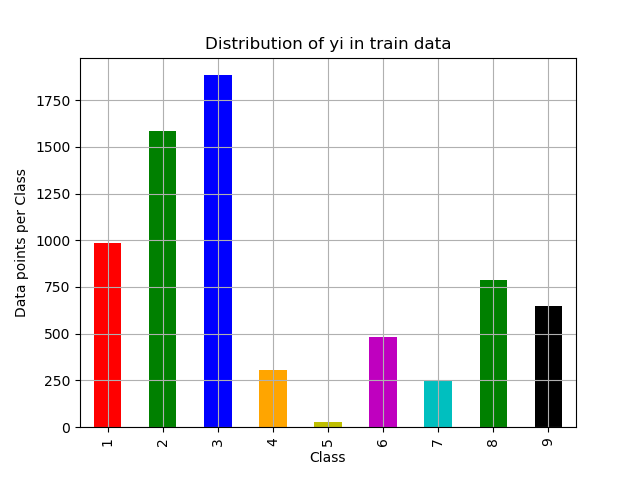

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


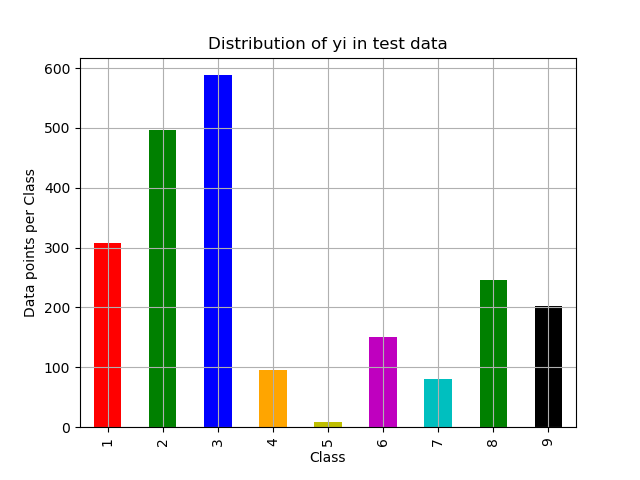

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


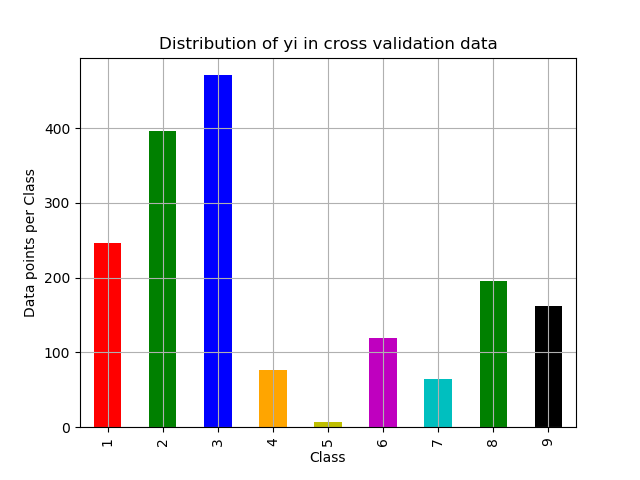

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [11]:
#It returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sortlevel()
test_class_distribution = y_test.value_counts().sortlevel()
cv_class_distribution = y_cv.value_counts().sortlevel()

my_colors = ["r","g","b","orange","y","m","c","g","black"]
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')

<h2>8.3 Code for Confusion, Precision and Recall matrix </h2>

In [6]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Percentage of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h2>9.0 Using T-SNE on the train set </h2>

In [5]:
#Multivariate analysis on asm files features extracted using all the final features.
def plot_tsne(p):
    print("TSNE plot, with perplexity = {}".format(p))
    xtsne=TSNE(perplexity=p)
    results=xtsne.fit_transform(X_train)
    vis_x = results[:, 0]
    vis_y = results[:, 1]
    plt.scatter(vis_x, vis_y, c=y_train, cmap=plt.cm.get_cmap("jet", 9))
    plt.colorbar(ticks=range(10))
    plt.clim(0.5, 9)
    plt.show()

TSNE plot, with perplexity = 30


<IPython.core.display.Javascript object>


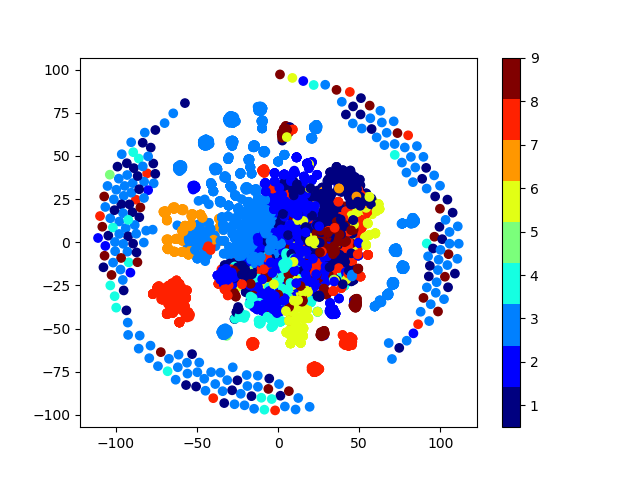

In [6]:
plot_tsne(30)

TSNE plot, with perplexity = 50


<IPython.core.display.Javascript object>


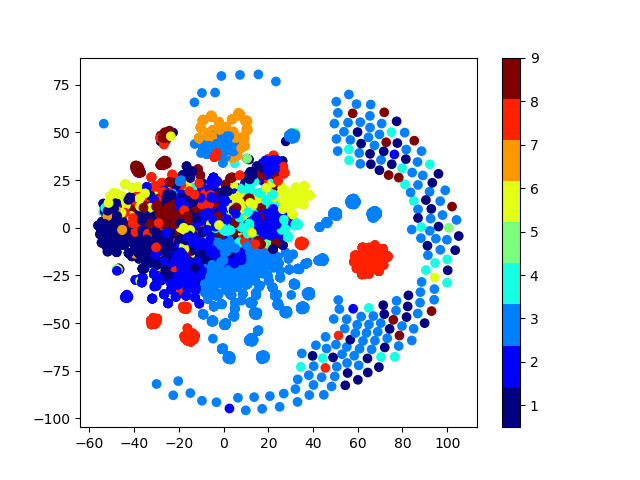

In [7]:
plot_tsne(50)

TSNE plot, with perplexity = 80


<IPython.core.display.Javascript object>


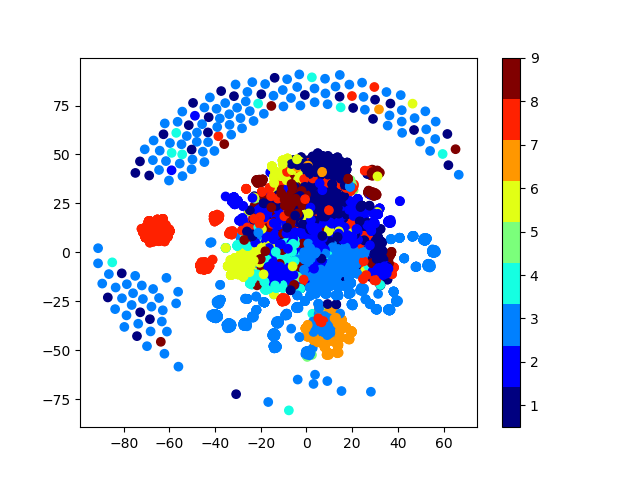

In [8]:
plot_tsne(80)

<h2>10. Machine Learning models on the final sets of features </h2>

In this section we will use various Machine Learning models on the final features we have obtained and train a classifier which belongs what class of malware a particular datapoint belongs to.

<h2>10.1 Training a Random Forest Classifier on the final sets of features</h2>

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier

### Tune the hyperparameter n_estimators. 

log_loss for c =  10 is 0.05860248748022682
log_loss for c =  50 is 0.046068787750972805
log_loss for c =  100 is 0.04794121453575634
log_loss for c =  500 is 0.04627045596291302
log_loss for c =  1000 is 0.046136037788736546
log_loss for c =  2000 is 0.046206151064847226
log_loss for c =  3000 is 0.04622147586641312


<IPython.core.display.Javascript object>


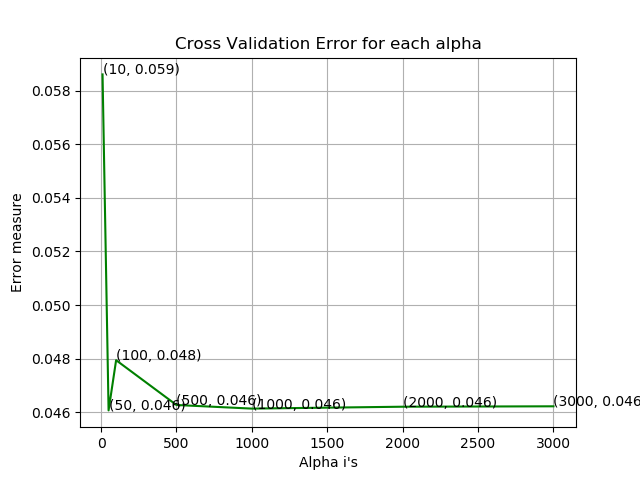

For values of best alpha =  50 The train log loss is: 0.01773713171122862
For values of best alpha =  50 The cross validation log loss is: 0.046068787750972805
For values of best alpha =  50 The test log loss is: 0.051558208326363784


In [12]:
estimator=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in estimator:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train ,y_train )
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train , y_train )
    predict_y = sig_clf.predict_proba(X_cv )
    cv_log_error_array.append(log_loss(y_cv , predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',estimator[i],'is',cv_log_error_array[i])


best_estimator = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(estimator, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((estimator[i],np.round(txt,3)), (estimator[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each estimator")
plt.xlabel("Estimator i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=estimator[best_estimator],random_state=42,n_jobs=-1)
r_cfl.fit(X_train ,y_train )
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train , y_train )

predict_y = sig_clf.predict_proba(X_train )
print ('For values of best estimator = ', estimator[best_estimator], "The train log loss is:",log_loss(y_train , predict_y))
predict_y = sig_clf.predict_proba(X_cv )
print('For values of best estimator = ', estimator[best_estimator], "The cross validation log loss is:",log_loss(y_cv , predict_y))
predict_y = sig_clf.predict_proba(X_test )
print('For values of best estimator = ', estimator[best_estimator], "The test log loss is:",log_loss(y_test , predict_y))

plot_confusion_matrix(y_test,sig_clf.predict(X_test))

<h2>10.2 Training an XGBoost Classifier on the final sets of features</h2>

log_loss for c =  10 is 0.07733012736364236
log_loss for c =  50 is 0.03905875498959229
log_loss for c =  100 is 0.02999076721501786
log_loss for c =  500 is 0.02864663745787661
log_loss for c =  1000 is 0.028697083167181243
log_loss for c =  2000 is 0.02869700239044487
log_loss for c =  3000 is 0.02869688851297395


<IPython.core.display.Javascript object>


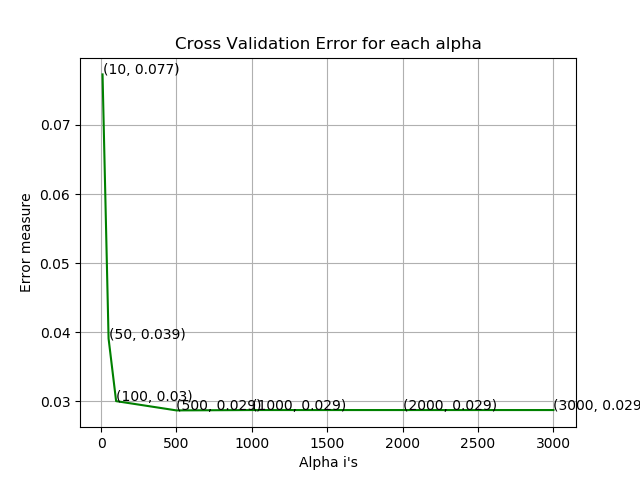

For values of best alpha =  500 The train log loss is: 0.013021228130231977
For values of best alpha =  500 The cross validation log loss is: 0.02864663745787661
For values of best alpha =  500 The test log loss is: 0.030512075737233454


In [12]:
estimators=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in estimators:
    x_cfl=XGBClassifier(n_estimators=i, n_jobs=-1)
    x_cfl.fit(X_train ,y_train )
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train , y_train )
    predict_y = sig_clf.predict_proba(X_cv )
    cv_log_error_array.append(log_loss(y_cv , predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',estimators[i],'is',cv_log_error_array[i])


best_estimators = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(estimators, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((estimators[i],np.round(txt,3)), (estimators[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each estimators")
plt.xlabel("Estimators i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=estimators[best_estimators],nthread=-1,n_jobs=-1)
x_cfl.fit(X_train ,y_train ,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train , y_train )

predict_y = sig_clf.predict_proba(X_train )
print ('For values of best estimators = ', estimators[best_estimators], "The train log loss is:",log_loss(y_train , predict_y))
predict_y = sig_clf.predict_proba(X_cv )
print('For values of best estimators = ', estimators[best_estimators], "The cross validation log loss is:",log_loss(y_cv , predict_y))
predict_y = sig_clf.predict_proba(X_test )
print('For values of best estimators = ', estimators[best_estimators], "The test log loss is:",log_loss(y_test , predict_y))

Percentage of misclassified points  0.5059797608095675
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


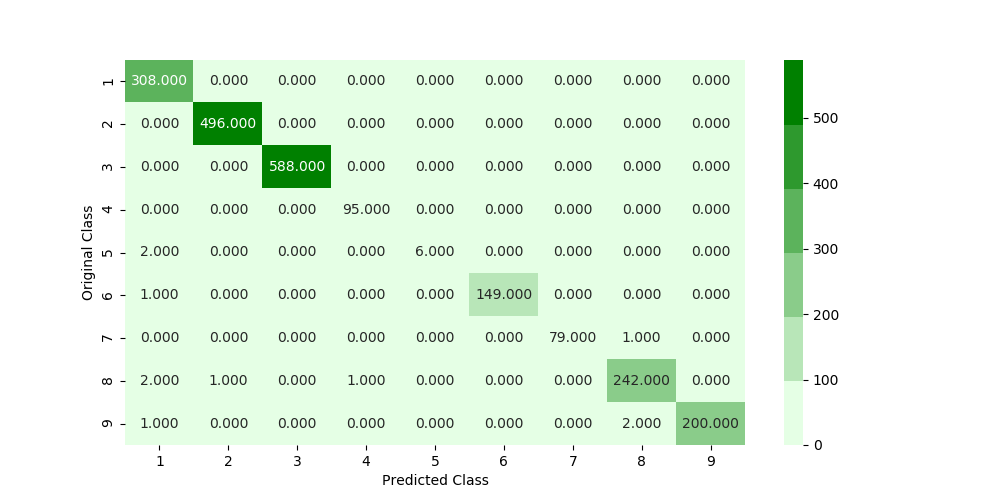

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


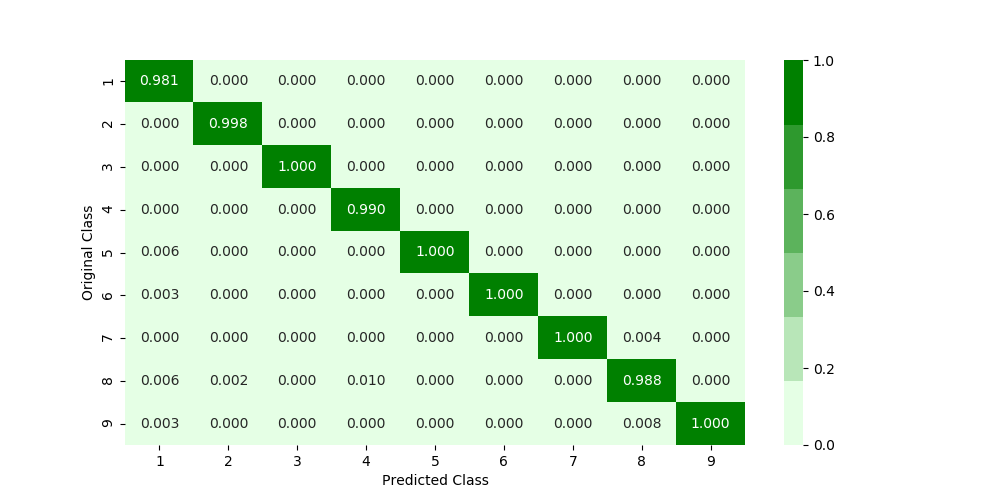

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


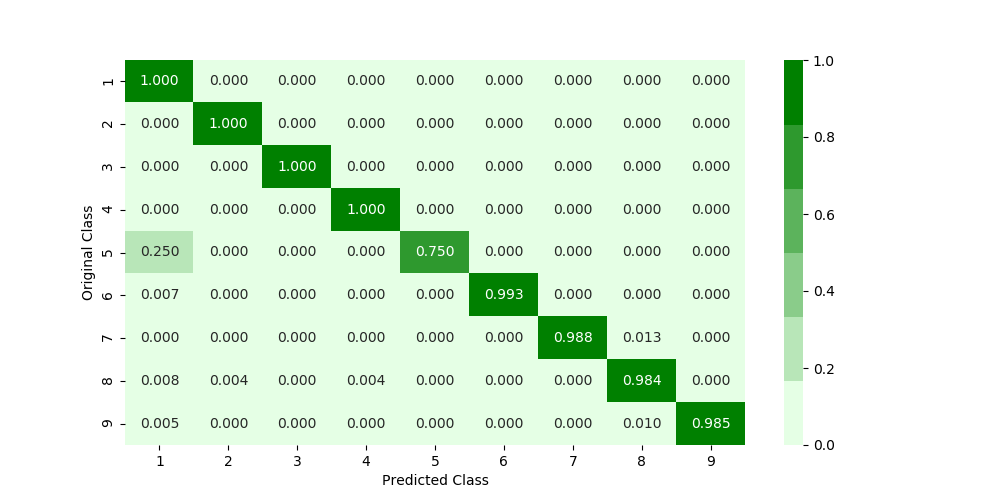

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
plot_confusion_matrix(y_test,sig_clf.predict(X_test))

<h2>10.3 Selecting top 1500 features using Random Forest + Apply XBGoost on top of the 1500 selected fetaures</h2>

In [10]:
from xgboost import XGBClassifier

### 10.3.1 Code for Selecting best features with random forest.

In [7]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

def get_feature_importance(X, y, nb_imp_feats): #For selecting top 1500 features from the final sets of features
    n_estimators=[10,50,100,500,1000,2000,3000]
    cv_log_error_array=[]
    for i in n_estimators:
        rf_clf=RandomForestClassifier(n_estimators=i,n_jobs=-1, random_state=42) 
        rf_clf.fit(X,y)
        sig_clf = CalibratedClassifierCV(rf_clf, method="sigmoid")
        sig_clf.fit(X_train , y_train )
        predict_y = sig_clf.predict_proba(X_cv )
        cv_log_error_array.append(log_loss(y_cv , predict_y, labels=rf_clf.classes_, eps=1e-15))       
    
    for i in range(len(cv_log_error_array)):
        print ('Cross Validation log loss for n_estimators = ',n_estimators[i],'is',cv_log_error_array[i]) 
    
    best_estimator = np.argmin(cv_log_error_array)
    rf_clf=RandomForestClassifier(n_estimators=n_estimators[best_estimator],random_state=42,n_jobs=-1)
    rf_clf.fit(X_train ,y_train)    
    
    feature_index=np.argsort(rf_clf.feature_importances_)[::-1]
    most_imp_feat_idx=feature_index[:nb_imp_feats]
    return most_imp_feat_idx

### 10.3.2. Using the best features to construct train, test and cross-validation dataset

In [7]:
#Get all the feature names in a list
features = list(X_train.columns)

#Get the top 1500 features indexes
top_1500_features_index = get_feature_importance(X_train, y_train, 1500)

#Get the top 1500 features
top_1500_features = np.take(features,top_1500_features_index)

#Create a train, test and cv dataset with top 1500 features obtained using random forest
X_train=X_train[list(top_1500_features)]
X_test=X_test[list(top_1500_features)]
X_cv=X_cv[list(top_1500_features)]

log_loss for c =  10 is 0.07782809453350703
log_loss for c =  50 is 0.06985089464034828
log_loss for c =  100 is 0.07010768253812429
log_loss for c =  500 is 0.06957363778997536
log_loss for c =  1000 is 0.06928987271992011
log_loss for c =  2000 is 0.06938594766962562
log_loss for c =  3000 is 0.06919030842027062


### 10.3.3. Training an XGBoost classifier on the final set of 1500 features. Tuning using Random Search CV

In [8]:
#Declaring parameters
params = {'learning_rate':[0.1,0.01,0.001,0.0001],
          'n_estimators':[250,500,750,1000,2000,3000,4000],
          'subsample':[0.6,0.7,0.8,0.9],
          'min_child_weight':[3,5,7,9,11],
          'reg_lambda':[100,200,300,400,600],
          'reg_alpha':[100,200,300,400,600],
          'max_depth': [3,4,5,6,7,9,11],
          'colsample_bytree':[0.6,0.7,0.8],
          'gamma':[0,0.01,0.1,0.5,1]}

#Tuning hyperparameters
start =dt.now()
print('Hyperparameter tuning: \n')
model= XGBClassifier(n_jobs=-1, random_state=0)
rsearch_cv = RandomizedSearchCV(model,params,n_iter=20,scoring='neg_log_loss',cv=3,n_jobs=-1)
rsearch_cv.fit(X_train, y_train)
print('Time taken to perform Hyperparameter tuning :',dt.now()-start)

#Getting the best hyperparameter tuned model
best_model=rsearch_cv.best_estimator_
print("\nBest estimator: ",best_model)
print("\nBest params: ",rsearch_cv.best_params_)

Hyperparameter tuning: 

Time taken to perform Hyperparameter tuning : 8:03:06.814240

Best estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=7, min_child_weight=3, missing=None, n_estimators=4000,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=100, reg_lambda=200, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7)

Best params:  {'subsample': 0.7, 'reg_lambda': 200, 'reg_alpha': 100, 'n_estimators': 4000, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}


The train log loss is:  0.06516462122223898
The cross validation log loss is:  0.10528623905897519
The test log loss is:  0.07150988138680958
Percentage of misclassified points  1.4259429622815087
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


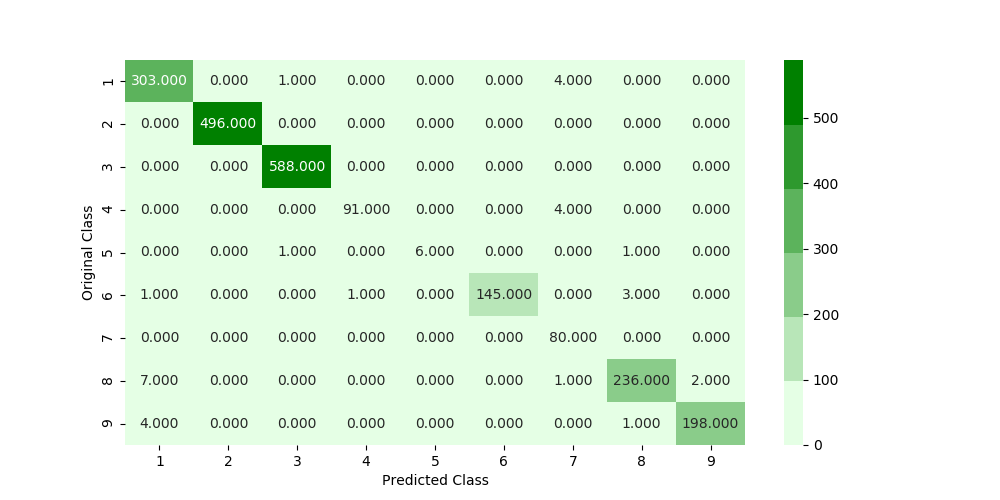

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


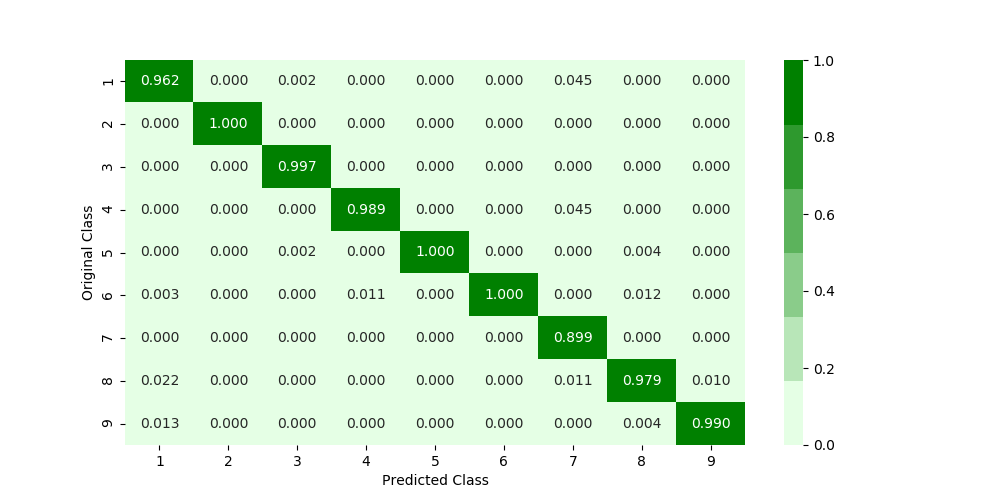

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


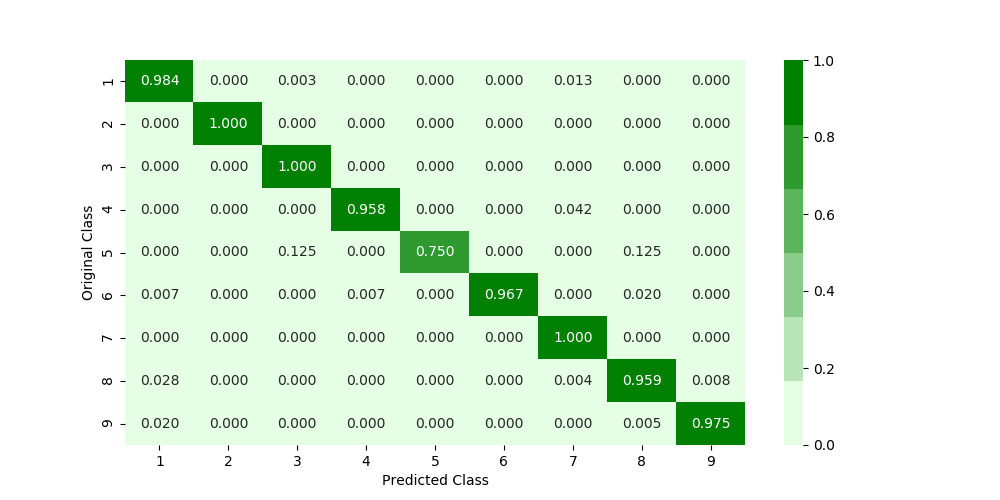

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
#Fitting the best model to our training data
best_model.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(best_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Loss information
predict_y = sig_clf.predict_proba(X_train)
print ("The train log loss is: ",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print("The cross validation log loss is: ",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print("The test log loss is: ",log_loss(y_test, predict_y))

#Plot the confusion matrix
plot_confusion_matrix(y_test,sig_clf.predict(X_test))

### 10.3.4. Hyperparameter tuning using the cross validation dataset. (Tuning the number of estimators)

log_loss for c =  10 is 0.10495157877157932
log_loss for c =  50 is 0.06197052196126585
log_loss for c =  100 is 0.05093717088653519
log_loss for c =  500 is 0.05009071485206745
log_loss for c =  1000 is 0.050673452580463844
log_loss for c =  2000 is 0.05066588916852594
log_loss for c =  3000 is 0.050664136778498424


<IPython.core.display.Javascript object>


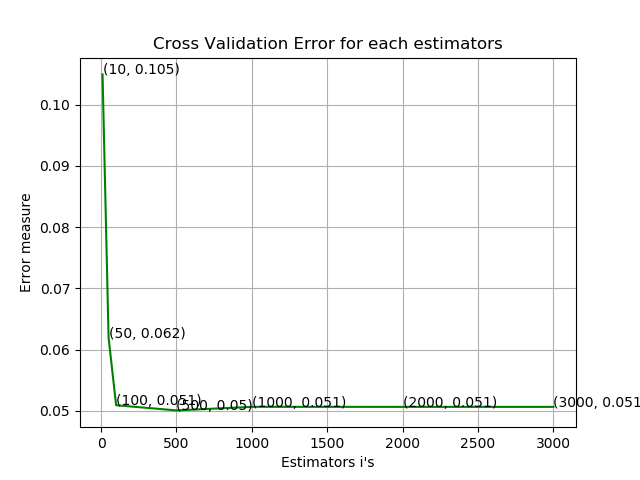

For values of best estimators =  500 The train log loss is: 0.011647144228895113
For values of best estimators =  500 The cross validation log loss is: 0.05009071485206745
For values of best estimators =  500 The test log loss is: 0.020779171913201507


In [16]:
estimators=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in estimators:
    x_cfl=XGBClassifier(n_estimators=i, n_jobs=-1)
    x_cfl.fit(X_train ,y_train )
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train , y_train )
    predict_y = sig_clf.predict_proba(X_cv )
    cv_log_error_array.append(log_loss(y_cv , predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',estimators[i],'is',cv_log_error_array[i])


best_estimators = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(estimators, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((estimators[i],np.round(txt,3)), (estimators[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each estimators")
plt.xlabel("Estimators i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=estimators[best_estimators],nthread=-1,n_jobs=-1)
x_cfl.fit(X_train ,y_train ,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train , y_train )

predict_y = sig_clf.predict_proba(X_train )
print ('For values of best estimators = ', estimators[best_estimators], "The train log loss is:",log_loss(y_train , predict_y))
predict_y = sig_clf.predict_proba(X_cv )
print('For values of best estimators = ', estimators[best_estimators], "The cross validation log loss is:",log_loss(y_cv , predict_y))
predict_y = sig_clf.predict_proba(X_test )
print('For values of best estimators = ', estimators[best_estimators], "The test log loss is:",log_loss(y_test , predict_y))

<h2>10.4 Selecting top 700 features using Random Forest + Apply XBGoost on top of the 700 selected fetaures</h2>

In [13]:
from xgboost import XGBClassifier

### 10.4.1. Using the best features to construct train, test and cross-validation dataset

In [16]:
#Get all the feature names in a list
features = list(X_train.columns)

#Get the top 700 features indexes
top_700_features_index = get_feature_importance(X_train, y_train, 700)

#Get the top 700 features
top_700_features = np.take(features,top_700_features_index)

#Create a train, test and cv dataset with top 700 features obtained using random forest
X_train=X_train[list(top_700_features)]
X_test=X_test[list(top_700_features)]
X_cv=X_cv[list(top_700_features)]

log_loss for n_estimators =  10 is 0.07782809453350703
log_loss for n_estimators =  50 is 0.06985089464034828
log_loss for n_estimators =  100 is 0.07010768253812429
log_loss for n_estimators =  500 is 0.06957363778997536
log_loss for n_estimators =  1000 is 0.06928987271992011
log_loss for n_estimators =  2000 is 0.06938594766962562
log_loss for n_estimators =  3000 is 0.06919030842027062


### 10.4.2. Hyperparameter tuning using the cross validation dataset. (Tuning the number of estimators)

log_loss for n_estimators =  10 is 0.10457753669826568
log_loss for n_estimators =  50 is 0.06082657844950152
log_loss for n_estimators =  100 is 0.04941253633784815
log_loss for n_estimators =  500 is 0.048821470872456224
log_loss for n_estimators =  1000 is 0.04879492019804755
log_loss for n_estimators =  2000 is 0.0489960560405369
log_loss for n_estimators =  3000 is 0.04899449525127426
log_loss for n_estimators =  4000 is 0.048995588201735704


<IPython.core.display.Javascript object>


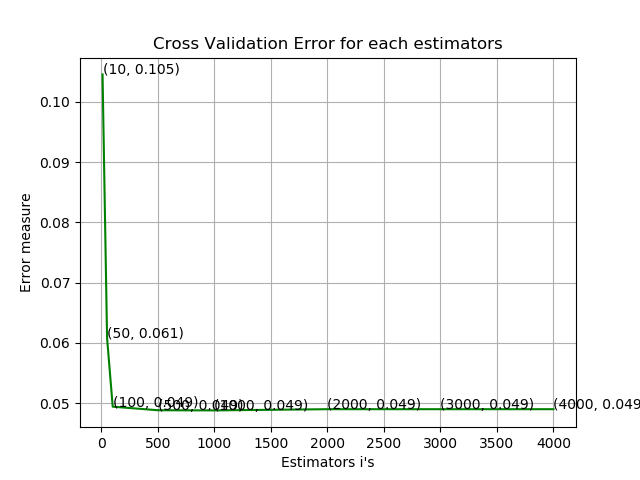

For values of best estimators =  1000 The train log loss is: 0.012112393074308642
For values of best estimators =  1000 The cross validation log loss is: 0.04879492019804755
For values of best estimators =  1000 The test log loss is: 0.019995060030085006


In [17]:
estimators=[10,50,100,500,1000,2000,3000,4000]
cv_log_error_array=[]
for i in estimators:
    x_cfl=XGBClassifier(n_estimators=i, n_jobs=-1)
    x_cfl.fit(X_train ,y_train )
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train , y_train )
    predict_y = sig_clf.predict_proba(X_cv )
    cv_log_error_array.append(log_loss(y_cv , predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for n_estimators = ',estimators[i],'is',cv_log_error_array[i])


best_estimators = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(estimators, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((estimators[i],np.round(txt,3)), (estimators[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each estimators")
plt.xlabel("Estimators i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=estimators[best_estimators],nthread=-1,n_jobs=-1)
x_cfl.fit(X_train ,y_train ,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train , y_train )

predict_y = sig_clf.predict_proba(X_train )
print ('For values of best estimators = ', estimators[best_estimators], "The train log loss is:",log_loss(y_train , predict_y))
predict_y = sig_clf.predict_proba(X_cv )
print('For values of best estimators = ', estimators[best_estimators], "The cross validation log loss is:",log_loss(y_cv , predict_y))
predict_y = sig_clf.predict_proba(X_test )
print('For values of best estimators = ', estimators[best_estimators], "The test log loss is:",log_loss(y_test , predict_y))

Percentage of misclassified points  0.22999080036798528
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


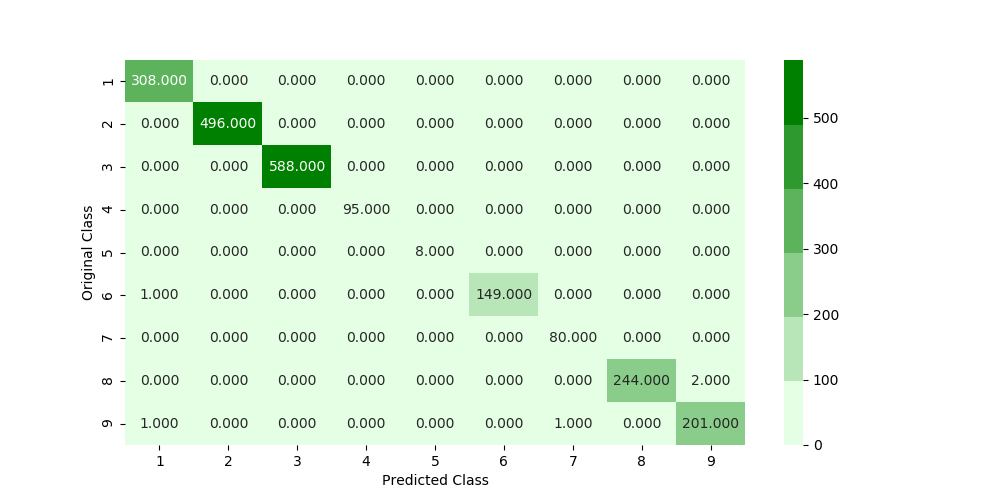

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


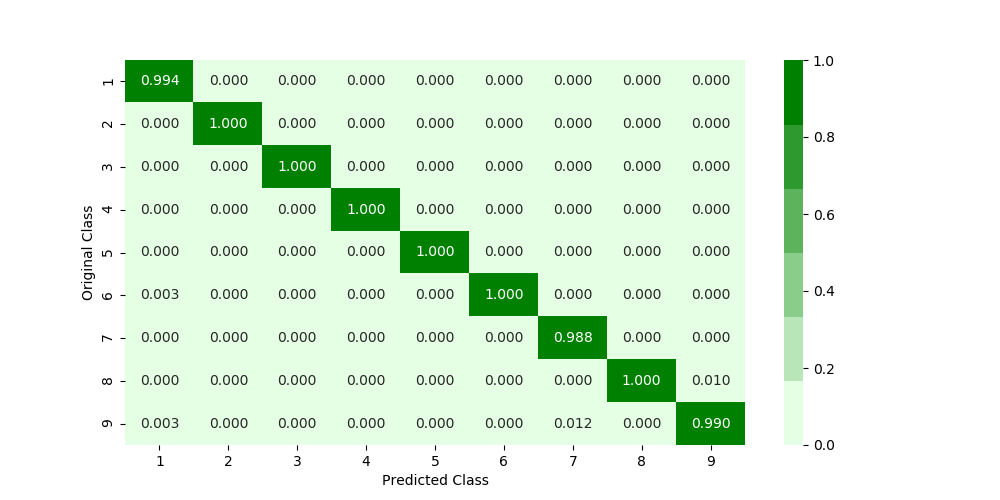

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


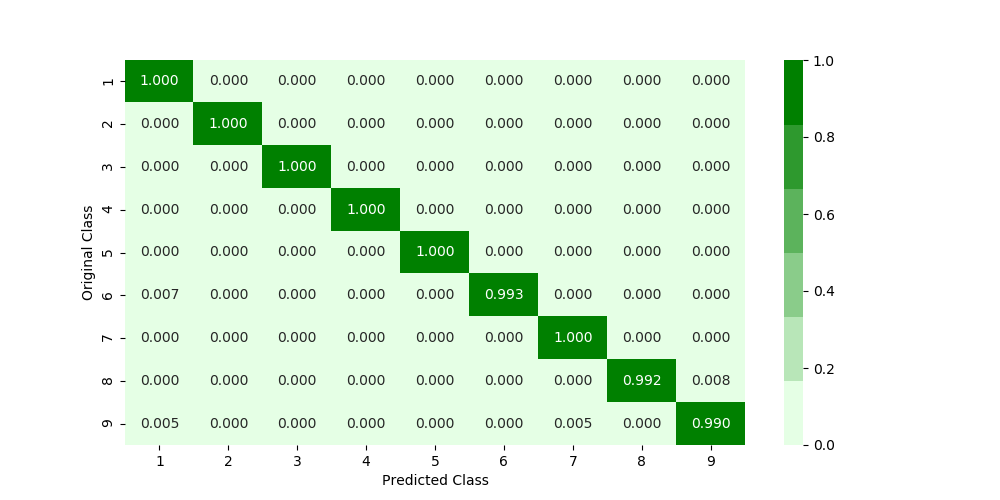

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
plot_confusion_matrix(y_test, x_cfl.predict(X_test))

### Display the results in a table.

In [10]:
from prettytable import PrettyTable

#Table 1
table =PrettyTable()
table.field_names = ["Model", "No.of features", "Log loss"]
table.add_row(["Random Forest with Cross Validation", 66157 , 0.051])
table.add_row(["XGBoost with Cross Validation", 66157 , 0.030])
table.add_row(["XGBoost with Random Search", 1500 , 0.071])
table.add_row(["XGBoost with Cross Validation", 1500 , 0.020])
table.add_row(["XGBoost with Cross Validation", 700 , 0.19])

print(table)

+-------------------------------------+----------------+----------+
|                Model                | No.of features | Log loss |
+-------------------------------------+----------------+----------+
| Random Forest with Cross Validation |     66157      |  0.051   |
|    XGBoost with Cross Validation    |     66157      |   0.03   |
|      XGBoost with Random Search     |      1500      |  0.071   |
|    XGBoost with Cross Validation    |      1500      |   0.02   |
|    XGBoost with Cross Validation    |      700       |   0.19   |
+-------------------------------------+----------------+----------+


### Steps taken to perform this experiment:

#### What is the objective? 

The main purpose of this case study was to classify a given .byte or a .asm file in one of the 9 categories of malware. The 9 categories are Ramnit,  Lollipop, Kelihos_ver3, Vundo, Simda, Tracur, Kelihos_ver1, Obfuscator, ACY and Gatak.

In the past few years, the malware industry has grown very rapidly	that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust software to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to identify whether a given piece of file/software is malware.

Since it's a multiclass classification problem, we have to choose our KPI (Key Performance Indicator) in such a way so that it minimizes the overall error on all the 9 classes. We want to know not only which file belongs to which class but also what is the probability of that belonging to a particular class. Without probability scores that model would just say that a file belongs to class 9(say). So the ideal KPI for this problem would be multi-class log loss.


#### Why did we chose our KPI to be 'log loss'?

As we have discussed above, we will use our Key Performance Indicator to be 'log' loss. Minimizing the Log Loss is basically equivalent to maximizing the accuracy of the classifier. In order to calculate Log loss, the classifier must actually assign a probability value for each of the class labels. Ideally, as the predicted class probabilities improve, the Log loss keeps on reducing. Log loss penalizes the classifier very heavily if it classifies a Class 1 to be Class 4 and vice versa. For example, if for a particular observation, the classifier assigns a very small probability to the correct class then the corresponding contribution to the Log Loss will be very large. Naturally, this is going to have a significant impact on the overall Log Loss for the classifier, which will then become higher. But, in another scenario, if the classifier assigns a high probability value to the correct class, then the Log loss will reduce significantly. Now, imagine a scenario where the model doesn't predict probability scores. It only predicts class labels. In this case, class labels have values from 1 to 9. Without probability, scores won't get a deep understanding or any interpretability about why a particular file has been classified as a particular class. Choosing the KPI as Log loss gives us this freedom. 

Anyway, coming back to malware classification now - the latency at test time should not be too high. It's ok as long as the answer is delivered within a few seconds. You don't want to wait for minutes or hours for this model to classify a file as a malware. 

For each class of malware we have their corresponding ASM and Byte file representations. And there are 10868 * 2 such files belonging o each of the file types. The byte files basically contain long sequences of hexadecimal encoded strings. The ASM file has a combination of all sorts of things. It has operation codes written in assembly level languages. It has hexadecimal codes. There are code written for registers, malicious executable codes, etc. An example of this type of file can be found above. 

When we look at the distribution of malware classes in the whole dataset, we can see that class 3 has the highest number of samples closely followed by class 2 and 1. Class 5, on the other hand, has very very few samples, Roughly 0.4%. That's a pretty low number of samples. This means our model might not behave as well as we want for some of the classes. We have to keep this distribution in mind as we move along. 

#### Feature extraction

For feature extraction from byte files, we have used a number of different approaches. This includes extracting 1gram and 2gram features from the byte files, converting byte files to an image and taking the first 2000 pixels from each of the images. We have also used file size as a feature because from the box plot drawn at the beginning of the experiment, we have seen that file size feature has been very good at classifying some classes of malware. In order to extract 1gram features have manually handcrafted 258 features. Out of these 258 features, 256 are hexadecimal combinations. Hexadecimal number ranges from 0 to 15. There are 16 such numbers. And in byte files, the hexadecimal numbers occur in pairs. So there are a total of 16*16 number of combinations that we have to handcraft. The bigram features have a 256*256 combination of hexadecimal sequences. We have also extracted the trigram features from the ASM files. 

The ASM file mainly contains byte addresses, code segments, operation codes written in assembly level languages, register codes, function calls, API calls, etc. What we have done is manually note down what these features and extracted them using unigrams, bigrams, and trigrams using sklearns count vectorizer class. On performing some basic EDA we have seen that there are features which don't classify any of the class labels more promptly. We will remove such features from the dataset when we build our final model. In order to make the operation of extracting features from the files we have used multi-processing to simultaneously run 5 threads and perform the task of extracting the unigram features from the entire ASM file. Unigrams feature extraction, in this case, is nothing but counting the number of times each of the single features appeared in each of the files. This is straightforward. However, it's a bit tricky if we want to extract the bigram or trigram features. If we look at the ASM file closely, we will see that all the opcodes, register, and other keywords are not present one after the other. But we still need to somehow capture the sequence of one keyword occurring after another. For this, I have first extracted all the opcodes, registers (in the order in which they are present in the original file) and saved them into a separate text file. We now have the sequences in which the keywords occurred in the asm files. We can now build our bigram and trigram vectorizer using this text file. 

For extracting the image features I have taken each text file, converted them to images of size 256*256 each, flattened them and took the first 2000 pixels from each of the images. The idea and code both belong to the Kaggle winners! This is an exceptionally good idea. I was just blown away when I heard this for the first time. 

I have also tried to extract the CNN codes using a pre-trained VGG16 on the ImageNet data. The main reason for this doing this feature extraction is to get the information present on the whole picture instead of just taking just the first 2000 pixels. However, I did not build any model on top of these features since the output dimensions have 10848 rows instead of 10868. I could not debug this issue for now but will complete this part in future, that is building a model on top of the bottleneck features and see well it does when it comes to classifying the bottleneck features as malware. 

For selecting the best features I have used the SelectKBest library. SelectKBest test uses the chi-square test to get the feature scores for a given feature set Top features are then selected for each of the ngram vectorizers. 

Once we get the top features for each of the feature extractor, we will remove the unnecessary features and merge all the important feature matrix into one single matrix. We will use this data to train our final model.

We will use 64% data for training, 16% for cross-validation and 20% for testing. Since the class distribution is completely uneven, we have to split our data in such a way that the class distribution is retained in the train, test, and cross-validation dataset.


#### Strategies for training:

1. Train only the byte unigram features: Here we have built a classifier using only the byte unigram features.

2. The second method is we have built a classifier using only the ASM unigram features. 

3. The third strategy for training is to train a classifier on the combined unigram features that we have obtained using both byte files and ASM files. 

4. In the assignment stage, we have combined all the feature matrix into one single matrix, and built a classifier using all the unigram, bigram, trigram and pixel data obtained from both the file types - byte and asm. 

5. In the final part of training, I have selected the best 700 features using Random Forest and trained an XGBClassifier on top of the best 700 features selected using Random Forest. 

We have used a number of different models to train our model. For example, logistic regression, knn, random forest classifier, xgboost classifier, simple linear regression, etc.

Throughout this experiment, it has been observed that random forest classifier and XP boost classifier tends to perform far better than all other algorithms. This is understandable since both random forest and XGboost takes input from many estimators before arriving at the final conclusion. The other models, however, use only one single estimator and hence are less powerful. 



<b>The best log loss achieved with feature engineering is 0.19.</b>

##### NOTE: Please note, that I have tried creating a bigram vectorizer with sparse matrix. However the resulting NPZ and Pickle files were more than 1GB in size. So I reverted back to create the byte bigram dataframe using Dask Dataframes. The code section for creating a sparse matrix using byte bigram df was commented out.